<hr>

<center>
    Class: Machine Learning in Computational Biology <br>
    Program: Data Science and Information Technologies <br>
    Name: Aris <br>
    Las name: Podotas <br>
    ID: 7115152400040 <br>
    Assignment: 1 <br>
</center>

<hr>

<hr>

# Disclaimer

I use the validation set for many plots and metrics but I will not be using it when it comes to the development of the models, it was out of curiosity and that the pipline with which I intend on solving this assignment with will search these values of any new unseen set anyway.

<hr>

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA


In [1]:
# This is a utils cell for function only meant as utility
from collections.abc import Callable
from time import time

# I use this function in everywhere
def timeit(func: Callable) -> Callable:
	"""Prints the time a function took to execute"""
	def wrapper(*args, **kwargs):
		start= time()
		result = func(*args, **kwargs)
		end = time()
		elapsed = end - start
		print(f"Function '{func.__name__}' executed in {elapsed:.4f} seconds")
		return result
	return wrapper


In [4]:
# Getting files
root = '../data/'
dev = root + 'assignment1_dev_set.csv'
val = root + 'assignment1_val_set.csv'

# Reading data
devDf = pd.read_csv(dev)
valDf = pd.read_csv(val)


In [4]:
# Looking at the data
devDf.head()


Unnamed: 0   Project ID Experiment type     Sex  Host age    BMI  \
0           0   PRJEB11419    Metagenomics    Male      53.0  19.01   
1           1  PRJNA388263    Metagenomics  Female      21.0  23.50   
2           2  PRJNA388263    Metagenomics    Male      52.0  25.80   
3           3   PRJEB11419    Metagenomics  Female      40.0  23.49   
4           4   PRJEB11419    Metagenomics  Female      30.0  22.60   

  Disease MESH ID  Acholeplasma axanthum  Acidaminococcus fermentans  \
0         D006262               0.000000                    0.000000   
1         D006262               0.001028                    0.000000   
2         D006262               0.001406                    0.000000   
3         D006262               0.000000                    0.008825   
4         D006262               0.002878                    0.037419   

   Acidaminococcus intestini  ...  Clostridium sphenoides  \
0                   0.000000  ...                0.005891   
1                   0.000000  ...                0.000000   
2                   0.000000  ...                0.000000   
3                   0.273562  ...                0.017649   
4                   7.359970  ...                0.305106   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                0.029457                  0.000000               0.000000   
1                0.002569                  0.412652               0.003083   
2                0.005624                  0.002812               0.007031   
3                0.198553                  0.000000               0.158842   
4                0.135283                  0.000000               0.051811   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.002946                   0.000000   
1                        0.000000                   0.000000   
2                        0.000000                   0.000000   
3                        0.030886                   0.101483   
4                        0.054689                   0.083473   

   Eubacterium brachy  Eubacterium dolichum  Eubacterium sulci  \
0            0.000000              0.000000           0.002946   
1            0.008736              0.014903           0.077597   
2            0.000000              0.000000           0.005624   
3            0.000000              0.000000           0.000000   
4            0.020148              0.000000           0.054689   

   Ruminococcus gnavus  
0             0.100153  
1             0.004625  
2             0.016873  
3             0.000000  
4             0.011513  

[5 rows x 141 columns]

In [5]:
# Looking at the data
valDf.head()


Unnamed: 0   Project ID Experiment type     Sex  Host age    BMI  \
0           0   PRJEB11419    Metagenomics    Male      60.0  25.71   
1           1  PRJNA379979    Metagenomics    Male      57.0  27.20   
2           2   PRJEB11419    Metagenomics    Male      65.0  22.35   
3           3   PRJEB11419    Metagenomics    Male      55.0  25.52   
4           4  PRJNA379979    Metagenomics  Female      54.0  21.60   

  Disease MESH ID  Acholeplasma axanthum  Acidaminococcus fermentans  \
0         D006262                    0.0                    0.000000   
1         D006262                    0.0                    0.000000   
2         D006262                    0.0                    0.002095   
3         D006262                    0.0                    0.000000   
4         D006262                    0.0                    0.000000   

   Acidaminococcus intestini  ...  Clostridium sphenoides  \
0                   1.621960  ...                0.000000   
1                   0.000000  ...                0.000000   
2                   0.000000  ...                0.000000   
3                   0.044998  ...                0.003461   
4                   0.000000  ...                0.000000   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                2.871240                       0.0               0.068238   
1                0.000000                       0.0               0.000000   
2                0.064936                       0.0               0.016758   
3                0.089996                       0.0               0.003461   
4                0.000000                       0.0               0.000000   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.115479                   0.015747   
1                        0.000000                   0.000000   
2                        0.000000                   0.041895   
3                        0.006923                   0.000000   
4                        0.000000                   0.000000   

   Eubacterium brachy  Eubacterium dolichum  Eubacterium sulci  \
0            0.010498              0.000000           0.010498   
1            0.000000              0.000000           0.000000   
2            0.010474              0.006284           0.014663   
3            0.000000              0.020768           0.034614   
4            0.000000              0.000000           0.000000   

   Ruminococcus gnavus  
0             0.551152  
1             0.000000  
2             0.000000  
3             0.013846  
4             0.000000  

[5 rows x 141 columns]

In [6]:
# Getting important data values
devDf.describe()


Unnamed: 0    Host age        BMI  Acholeplasma axanthum  \
count  489.000000  489.000000  489.00000             489.000000   
mean   244.000000   46.703497   24.93955               0.016818   
std    141.306405   15.728231    4.20771               0.145035   
min      0.000000   19.000000   16.97000               0.000000   
25%    122.000000   31.000000   22.38000               0.000000   
50%    244.000000   52.000000   25.10000               0.000000   
75%    366.000000   58.000000   25.80000               0.000000   
max    488.000000   81.000000   67.26000               2.861300   

       Acidaminococcus fermentans  Acidaminococcus intestini  \
count                  489.000000                 489.000000   
mean                     0.029968                   0.294917   
std                      0.197816                   0.804704   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.001109   
75%                      0.000000                   0.129398   
max                      2.622820                   7.660350   

       Actinomyces lingnae  Akkermansia muciniphila  Alistipes finegoldii  \
count           489.000000               489.000000            489.000000   
mean              0.001608                 1.555914              0.249606   
std               0.010431                 4.306539              0.630670   
min               0.000000                 0.000000              0.000000   
25%               0.000000                 0.003438              0.003380   
50%               0.000000                 0.034284              0.044961   
75%               0.000000                 0.820242              0.188550   
max               0.206426                38.834900              6.068670   

       Alistipes indistinctus  ...  Clostridium sphenoides  \
count              489.000000  ...              489.000000   
mean                 0.061796  ...                0.029822   
std                  0.239054  ...                0.090605   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000260   
75%                  0.045111  ...                0.027723   
max                  4.478660  ...                1.465160   

       Clostridium spiroforme  Clostridium stercorarium  \
count              489.000000                489.000000   
mean                 0.247603                  0.032148   
std                  0.490321                  0.180606   
min                  0.000000                  0.000000   
25%                  0.002570                  0.000000   
50%                  0.047224                  0.000000   
75%                  0.303173                  0.005768   
max                  3.714530                  3.118150   

       Clostridium symbiosum  Clostridium thermosuccinogenes  \
count             489.000000                      489.000000   
mean                0.097871                        0.052936   
std                 0.197044                        0.310313   
min                 0.000000                        0.000000   
25%                 0.004881                        0.000000   
50%                 0.029362                        0.000000   
75%                 0.100294                        0.015439   
max                 1.801190                        4.726220   

       Clostridium xylanolyticum  Eubacterium brachy  Eubacterium dolichum  \
count                 489.000000          489.000000            489.000000   
mean                    0.038531            0.006565              0.012565   
std                     0.122225            0.018357              0.097056   
min                     0.000000            0.000000              0.000000   
25%                     0.000000            0.000000              0.000000

In [7]:
# Getting important data values
valDf.describe()


Unnamed: 0    Host age         BMI  Acholeplasma axanthum  \
count   211.00000  211.000000  211.000000             211.000000   
mean    105.00000   46.303318   24.800853               0.028603   
std      61.05462   16.056832    3.987255               0.209176   
min       0.00000   19.000000   16.970000               0.000000   
25%      52.50000   31.000000   22.220000               0.000000   
50%     105.00000   52.000000   25.100000               0.000000   
75%     157.50000   57.000000   25.800000               0.000000   
max     210.00000   79.000000   45.200000               2.740080   

       Acidaminococcus fermentans  Acidaminococcus intestini  \
count                  211.000000                 211.000000   
mean                     0.007540                   0.333079   
std                      0.049924                   0.857101   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.001429   
75%                      0.000000                   0.112273   
max                      0.565065                   4.708840   

       Actinomyces lingnae  Akkermansia muciniphila  Alistipes finegoldii  \
count           211.000000               211.000000            211.000000   
mean              0.006520                 1.275855              0.256110   
std               0.052926                 3.757554              0.800050   
min               0.000000                 0.000000              0.000000   
25%               0.000000                 0.002942              0.002488   
50%               0.000000                 0.044957              0.057409   
75%               0.000833                 0.560304              0.198418   
max               0.645116                32.133600              9.857790   

       Alistipes indistinctus  ...  Clostridium sphenoides  \
count              211.000000  ...              211.000000   
mean                 0.056868  ...                0.023161   
std                  0.239581  ...                0.061168   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.025187  ...                0.017703   
max                  3.187810  ...                0.549399   

       Clostridium spiroforme  Clostridium stercorarium  \
count              211.000000                211.000000   
mean                 0.231486                  0.036935   
std                  0.539919                  0.204636   
min                  0.000000                  0.000000   
25%                  0.002643                  0.000000   
50%                  0.046365                  0.000000   
75%                  0.267308                  0.006942   
max                  5.549120                  2.708990   

       Clostridium symbiosum  Clostridium thermosuccinogenes  \
count             211.000000                      211.000000   
mean                0.102440                        0.031075   
std                 0.210114                        0.133408   
min                 0.000000                        0.000000   
25%                 0.001640                        0.000000   
50%                 0.024696                        0.000000   
75%                 0.108798                        0.010384   
max                 1.726760                        1.683160   

       Clostridium xylanolyticum  Eubacterium brachy  Eubacterium dolichum  \
count                 211.000000          211.000000            211.000000   
mean                    0.049638            0.006270              0.012285   
std                     0.210740            0.013510              0.117794   
min                     0.000000            0.000000              0.000000   
25%                     0.000000            0.000000             

<hr>

Something important to note here is that the data does nto contain negative calues for our features and that they are a combination of discreet and continous valued vectors. (```Sex``` can be interprit as a discreet valued field)

<hr>

In [8]:
# Chacking for nil values
@timeit
def findMissing(dataframe: pd.DataFrame) -> int:
    """This function prints output if a dataframe has at least one missing value"""
    # This variable holds the final output
    output: int = 0
    mask = dataframe.isna().sum()
    for entry in mask:
        if entry == True:
            output = 1
    if output == 1:
        print(f"Identified missing data")
    return output


In [9]:
devMissing = findMissing(devDf)


Function 'findMissing' executed in 0.0015 seconds


In [10]:
valMissing = findMissing(valDf)


Function 'findMissing' executed in 0.0010 seconds


<hr>

We can clearly see that there is no missing field in the data for either csv file.

We will proceed with attempts to visualize the data.

<hr>

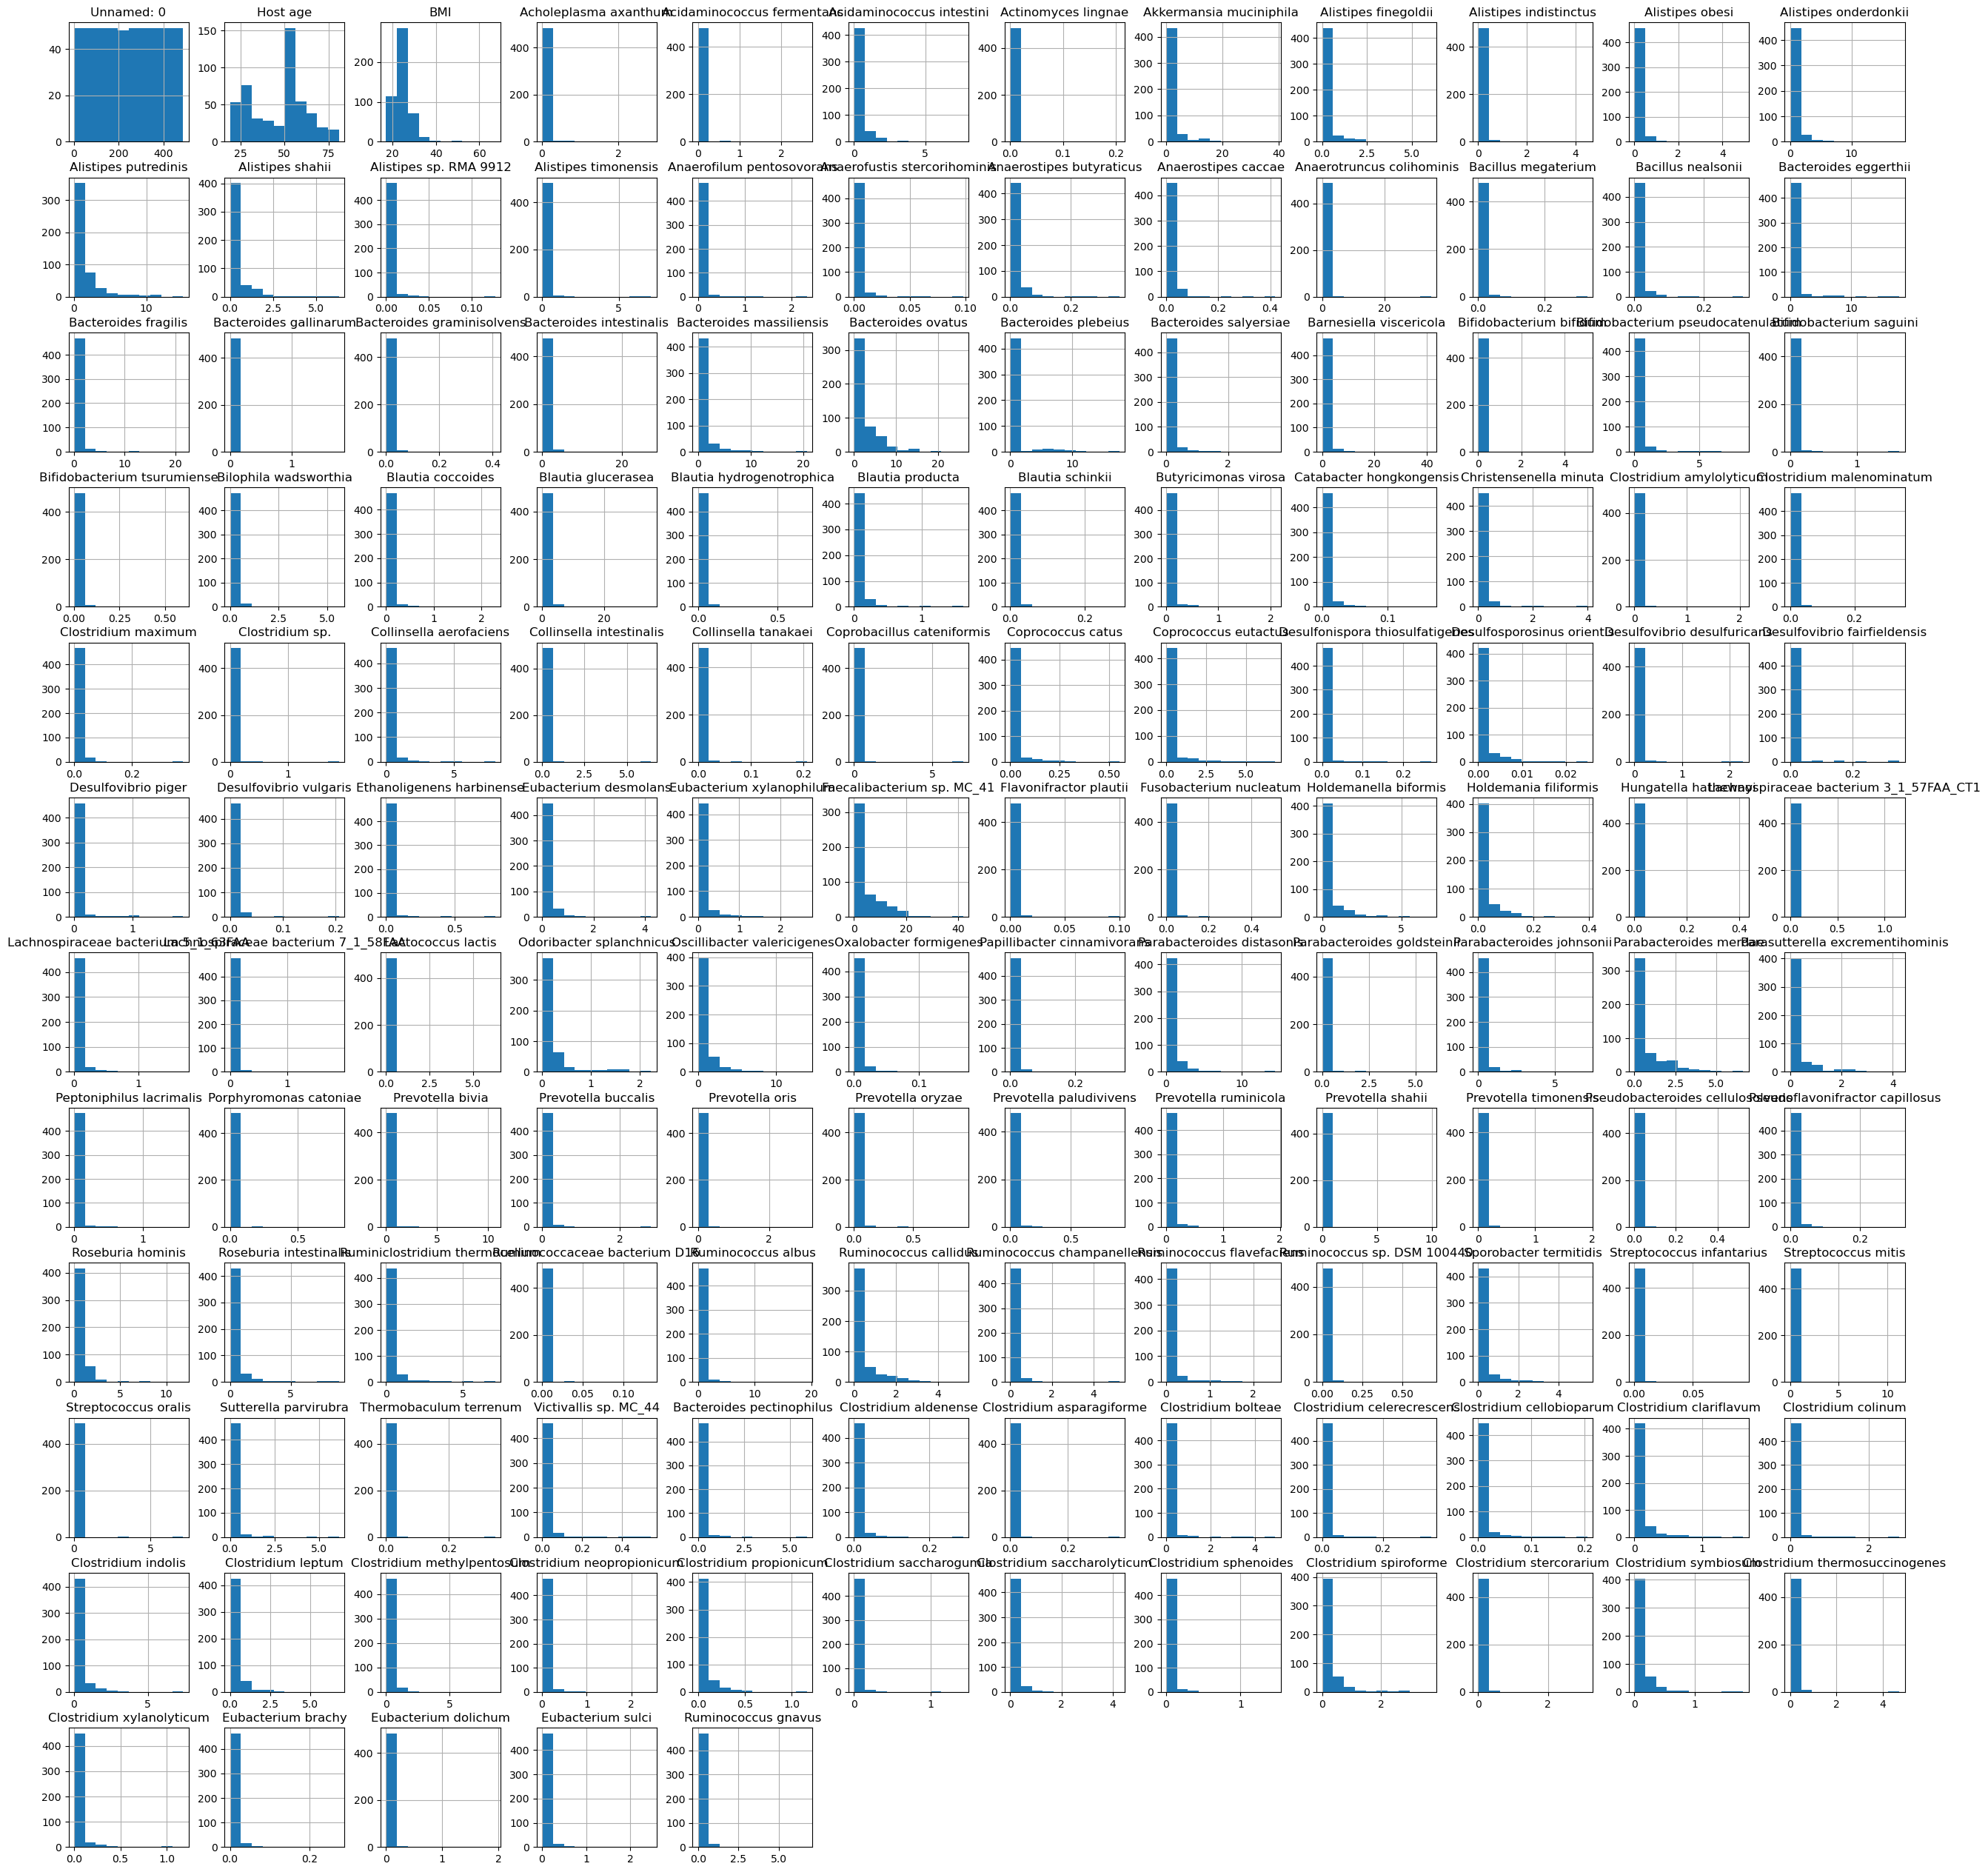

In [11]:
devDf.hist(figsize = (32, 32))
plt.show()


In [12]:
valDf.hist(figsize = (32, 32))
plt.show()


<hr>

Having done this we notice

- Almost none of the fields follow a normal distribution.

- The development and the validation set have similar results.

- The *BMI* seems to be a normal distribution.

- The age might pose a problem.

- We cannot see the male-female distribution yet.

We will see the male-female distribution later.

# Overview

We will need to split the set into a few categories to continue, for instance the male and female fields should be split.

This is considered a-priori knowledge since we know we are dealing with BMI and BMI is sex-related.

Since the data is of many similarly distributed features we should use some method of feature reduction to simplify the data. We will use a *Principaled Component Analysis*. Note that some of the data in the validation set seems to follow a different distribution but this is be cause the range of values of that feature have made is os that the plot takes a different range, appearing different but in essence the same.

> Note:
> The PCA is only out of curiosity and not to alter the data at this stage especially not the validation set that we will save.

<hr>

In [13]:
def transform(dataframe: pd.DataFrame, components: int) -> pd.DataFrame:
    """Applies a PCA to the dataframe"""
    # We need to isolate just the numerical features
    # and actually only the gut microbiome species will do
    # since we will keep the rest of the data (most of it) regardless of
    # the results of the pca, we will use iloc[row, col]
    # to pick the colmns of the dataframe past the 7th one (index 6) so from 8 (index 7) and on
    data = dataframe.iloc[1:,7:].values
    # The documentation of sklearn says that it is best to use zero mean unit variance data
    # Thankfully z-scaling ensures this
    obj = PCA(n_components = components)
    fit = obj.fit_transform(data)
    # We are rearrangeing the data of the pca into a nother dataframe
    pcaDf = pd.DataFrame(fit, columns = [f'P.C. {i+1}' for i in range(components)])
    return pcaDf, obj.explained_variance_ratio_

@timeit
def componentSearch(dataframe: pd.DataFrame, cutoff: float | int) -> int:
    """
    This function will do search on the results of the pca for different components until it find the minimum number of omponents with a cutoff explain
    Will return the components to keep
    """
    for n in range(len(dataframe.columns) - 6): # The -6 is because we skip the first 6 columns
        dfPca, explain = transform(dataframe, n)
        if sum(explain) >= cutoff:
            output: int = n
            break # I had written this without the break
            # and decided to check the explain
            # upon seeing it was (float ) 1.000 I realised that we need the "break"
    if output:
        return output
    else:
        return -1

@timeit
def implementPca(dataframe: pd.DataFrame, cutoff: float | int, verbose: bool = False) -> int:
    """
    This function will return the pca resutls for the first Pca run that passes cutoff
    """
    components = componentSearch(dataframe, cutoff)
    pca = transform(dataframe, components)
    if verbose:
        print(f'Total explain: {sum(pca[1])}\nComponents {components}')
        pca[0].head() # Can't understand why this won't work
    return pca
    

In [14]:
cutoff: float = 0.5
devPca = implementPca(devDf, cutoff, True)


Function 'componentSearch' executed in 0.0745 seconds
0.5631170867217563
Function 'implementPca' executed in 0.0815 seconds


In [15]:
valPca = implementPca(valDf, cutoff, True)


Function 'componentSearch' executed in 0.0200 seconds
0.6043925697407686
Function 'implementPca' executed in 0.0260 seconds


<hr>

It would seem that the different species of micro-organisms do not differentiate the data enough for us to be able to reduce the dimensionality substancially.

I did not ```print``` the final outputs of the above function calls for ```devComponents```, ```valComponents``` but they are $\geq 100$.

This means that for a explain value of $50\%$ we need more than $100$ of the columns of the ```dataframe```.

<hr>

In [16]:
@timeit
def interpolate(dataframe: pd.DataFrame, col: int, categories: list) -> pd.DataFrame:
    """This function takes a dataframe and converts a field to a binary valued 0, 1, 2 ... field"""
    output: pd.DataFrame = dataframe.copy()
    # Isolating our column
    target = output.iloc[:, col].astype("category")
    # Casting to categorical as in the documentation https://pandas.pydata.org/docs/user_guide/10min.html
    target = target.cat.rename_categories(categories) 
    # Re-assigning to dataframe
    output.iloc[:, col] = target
    return output

@timeit
def prune(dataframe: pd.DataFrame) -> pd.DataFrame:
    """This function removed the fields that we do not want to keep mentioned in the previous cell"""
    output = dataframe.drop(columns = ["Unnamed: 0", 'Experiment type', 'Disease MESH ID'])
    return output
    

In [17]:
devFinal = interpolate(devDf, col = 3, categories = [1, 0])# I dont know why but 1 needs to be first
# for us to get the previously agreed upon format, I think it has to do withe the alphabetical order
# but it's not in the page I used (https://pandas.pydata.org/docs/user_guide/10min.html)
devFinal = prune(devFinal)
devFinal.head(10)


Function 'interpolate' executed in 0.0053 seconds
Function 'prune' executed in 0.0010 seconds


Project ID Sex  Host age    BMI  Acholeplasma axanthum  \
0   PRJEB11419   0      53.0  19.01               0.000000   
1  PRJNA388263   1      21.0  23.50               0.001028   
2  PRJNA388263   0      52.0  25.80               0.001406   
3   PRJEB11419   1      40.0  23.49               0.000000   
4   PRJEB11419   1      30.0  22.60               0.002878   
5   PRJEB11419   0      21.0  26.25               0.000000   
6  PRJNA388263   0      52.0  25.80               0.000000   
7  PRJNA388263   0      52.0  25.80               0.000000   
8   PRJEB11419   0      42.0  24.75               0.011201   
9   PRJEB11419   0      67.0  28.70               0.000000   

   Acidaminococcus fermentans  Acidaminococcus intestini  Actinomyces lingnae  \
0                    0.000000                   0.000000             0.000000   
1                    0.000000                   0.000000             0.000000   
2                    0.000000                   0.000000             0.001406   
3                    0.008825                   0.273562             0.000000   
4                    0.037419                   7.359970             0.000000   
5                    0.000000                   0.215860             0.000000   
6                    0.000000                   0.000000             0.000000   
7                    0.000000                   0.000000             0.000000   
8                    0.000000                   0.162410             0.000000   
9                    0.000000                   1.256810             0.000000   

   Akkermansia muciniphila  Alistipes finegoldii  ...  Clostridium sphenoides  \
0                 0.017674              0.000000  ...                0.005891   
1                13.015800              0.001542  ...                0.000000   
2                 0.002812              0.201074  ...                0.000000   
3                 0.044123              0.004412  ...                0.017649   
4                 0.872143              0.000000  ...                0.305106   
5                 0.000000              0.045444  ...                0.028403   
6                 0.000000              0.006830  ...                0.000000   
7                 0.021226              0.165262  ...                0.000000   
8                 0.067204              0.212814  ...                0.000000   
9                 0.118669              0.000000  ...                0.010788   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                0.029457                  0.000000               0.000000   
1                0.002569                  0.412652               0.003083   
2                0.005624                  0.002812               0.007031   
3                0.198553                  0.000000               0.158842   
4                0.135283                  0.000000               0.051811   
5                0.664622                  0.000000               0.045444   
6                0.000000                  0.000000               0.000000   
7                0.012129                  0.009097               0.016678   
8                0.498432                  0.095206               0.095206   
9                0.053940                  0.000000               0.032364   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.002946                   0.000000   
1                        0.000000                   0.000000   
2                        0.000000                   0.000000   
3                        0.030886                   0.101483   
4                        0.054689                   0.083473   
5                        0.011361                   0.176096   
6                        0.000000                   0.000000   
7                        0.000000                   0.001516   
8                        0.212814                   0.089606   
9                        0.000000     

In [18]:
valFinal = interpolate(valDf, col = 3, categories = [1, 0])
valFinal = prune(valFinal)
valFinal.head(10)


Function 'interpolate' executed in 0.0023 seconds
Function 'prune' executed in 0.0010 seconds


Project ID Sex  Host age    BMI  Acholeplasma axanthum  \
0   PRJEB11419   0      60.0  25.71               0.000000   
1  PRJNA379979   0      57.0  27.20               0.000000   
2   PRJEB11419   0      65.0  22.35               0.000000   
3   PRJEB11419   0      55.0  25.52               0.000000   
4  PRJNA379979   1      54.0  21.60               0.000000   
5  PRJNA388263   0      52.0  25.80               0.000000   
6  PRJNA388263   1      31.0  21.30               0.001742   
7   PRJEB11419   0      60.0  26.50               0.000000   
8   PRJEB11419   0      65.0  23.75               0.000000   
9   PRJEB11419   0      66.0  25.75               0.000000   

   Acidaminococcus fermentans  Acidaminococcus intestini  Actinomyces lingnae  \
0                    0.000000                   1.621960             0.000000   
1                    0.000000                   0.000000             0.000000   
2                    0.002095                   0.000000             0.000000   
3                    0.000000                   0.044998             0.000000   
4                    0.000000                   0.000000             0.000000   
5                    0.000000                   0.000000             0.000000   
6                    0.000000                   0.000000             0.001742   
7                    0.000000                   1.780740             0.000000   
8                    0.000000                   0.619555             0.000000   
9                    0.003601                   0.122430             0.007202   

   Akkermansia muciniphila  Alistipes finegoldii  ...  Clostridium sphenoides  \
0                 0.000000              0.068238  ...                0.000000   
1                 0.000000              0.000000  ...                0.000000   
2                 0.002095              0.041895  ...                0.000000   
3                 0.013846              0.010384  ...                0.003461   
4                 0.000000              0.000000  ...                0.000000   
5                 0.000000              0.087590  ...                0.000000   
6                 0.003483              0.094052  ...                0.000000   
7                 0.029538              1.156220  ...                0.046417   
8                 0.580833              0.019361  ...                0.012907   
9                 0.014403              0.000000  ...                0.000000   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                2.871240                  0.000000               0.068238   
1                0.000000                  0.000000               0.000000   
2                0.064936                  0.000000               0.016758   
3                0.089996                  0.000000               0.003461   
4                0.000000                  0.000000               0.000000   
5                0.000000                  0.000000               0.000000   
6                0.149787                  0.020900               0.043543   
7                0.409317                  0.000000               0.451515   
8                0.219426                  0.006454               0.006454   
9                1.472760                  0.010803               0.010803   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.115479                   0.015747   
1                        0.000000                   0.000000   
2                        0.000000                   0.041895   
3                        0.006923                   0.000000   
4                        0.000000                   0.000000   
5                        0.000000                   0.000000   
6                        0.000000                   0.000000   
7                        0.430416                   0.080175   
8                        0.064537                   0.012907   
9                        0.021605     

<hr>

We can see that the ```Sex``` category has been cast properly.

A visualization (that follows) that would be worth seeing is the correlations (Pearson) of the features. We will also be able to tell if the feature ```Project ID``` is worth keeping when we look at the analytical scatter plots for pairs of features.

<hr>

In [5]:
# I import these here since I consider them extra
# Meaning that I didn't have these imports in mind before when I started on the notebook for my outline
from sklearn.feature_selection import r_regression
from mpl_toolkits.mplot3d import Axes3D

@timeit
def upperTriangle(matrix: np.ndarray) -> tuple[list, list]:
    """This function is to return the two lists of indecies to use to plot a matrix"""
    # I need two arrays, one for redundant values and one for non redundant ones
    # Since i need something like
    # 1 - 1
    # 2 - 1
    # 2 - 2
    # 3 - 1
    # 3 - 2
    # ...
    width = len(matrix) - 1
    height = width
    volume = int((width) * (height) / 2) # of a triangle (technically an area)
    redundant = [0] * volume
    serial = [0] * volume
    holder = 0
    for i in range(1, len(matrix) - 1): # This one starts at 1 since the 0 index is on the diagonal I guess we could leave it and it would skip it
        for j in range(0, len(matrix) - 1):
            if i > j:
                holder += 1
                redundant[holder] = i
                serial[holder] = j
            else:
                continue
    # Note
    # There is a way to make this faster I know of, I simply dont know if I'll go through the trouble of implementing it that way
    # since this is already fast enough so this note is in case I don't. If i allocated all the memory in the list's before hand and 
    # simply assign i and j instead of appending it would be faster. The syntax would look like redundant = [0]* volume were volume wold need to be
    # the number of elements in the final redundant list.
    #
    # I just got done implementing it, it's says the same time but it might still be faster (just not by alot).
    return redundant, serial

# I forgot why I added **kwargs but I don't want to break something again
@timeit
def correlation(dataframe: pd.DataFrame, **kwargs) -> None:
    """This function will take the correlation matrix of the dataframe and make a scatter plot for it (col 1 index, col 2 index, corr)"""
    table = dataframe.iloc[:, 1:].corr()
    # We only need everything above the diagonal
    rows, cols = upperTriangle(table.values)  # Originally solved inside this function now moved to the one above
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    # I'm going to multiply the corr() output by alot since I want to have the delta z visible on the plot outside of just the color heatmap
    ax.scatter(rows, cols, 1000 * table.values[rows, cols], label = 'Pearson corr', c = table.values[rows, cols], cmap = 'YlOrBr')
    plt.title(f"Correlations of the dataframe")
    ax.set_xlabel(f"Col 1")
    ax.set_ylabel(f"Col 2")
    ax.set_zlabel("Pearson correlation of dataframe")
    plt.grid()
    plt.show()
        

Function 'upperTriangle' executed in 0.0010 seconds


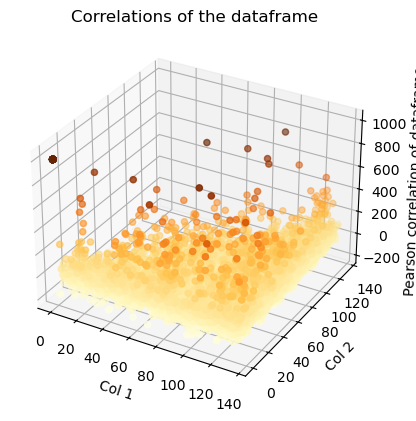

Function 'correlation' executed in 0.4430 seconds


In [20]:
correlation(devFinal)

Function 'upperTriangle' executed in 0.0014 seconds


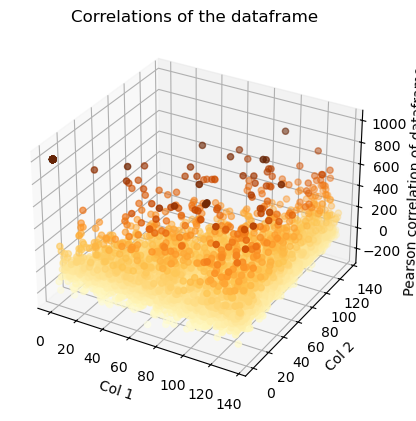

Function 'correlation' executed in 0.3935 seconds


In [21]:
correlation(valFinal)

<hr>

We notice that the validation set and the development set though similar have some differences. We also see the very heavily correlated variables, we will use this knowledge later (only for the development set).

This leaves something to be desired from the visualization since it seems less informatice than we want. For that reason we will look at each paris scatterplot as well.

<hr>

In [22]:
@timeit
def twoCol(dataframe: pd.DataFrame, anchor: int) -> None:
    """this function does the 2d scatter plots of the anchor column with all the rest"""
    for index in range(len(dataframe.columns)):
        plt.scatter(dataframe.iloc[:, anchor], dataframe.iloc[:, index], label = f'col {anchor}, {index}')
        plt.xlabel('anchor')
        plt.ylabel(f'col {index}')
        plt.grid()
        plt.title(f'Scatter plot of columns {anchor}, {index}')
        plt.show()


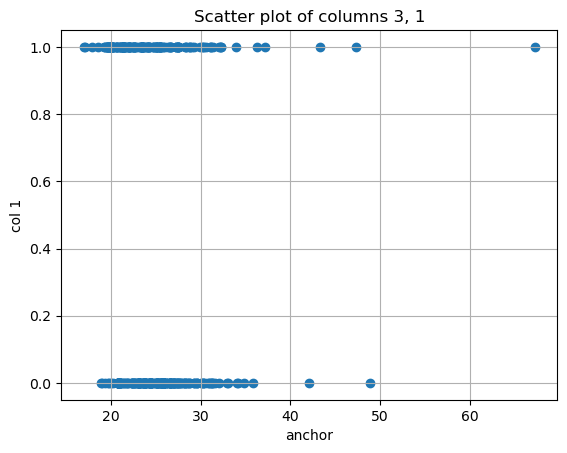

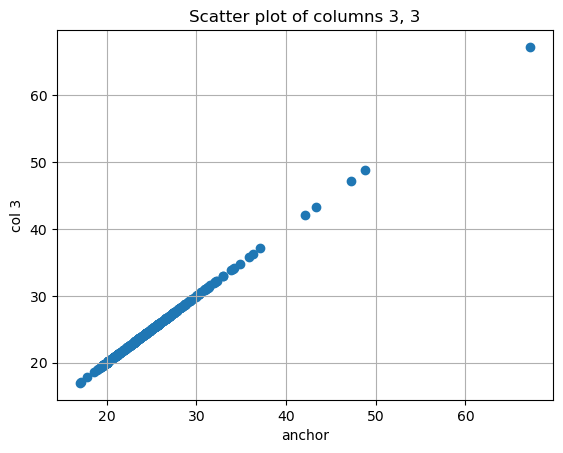

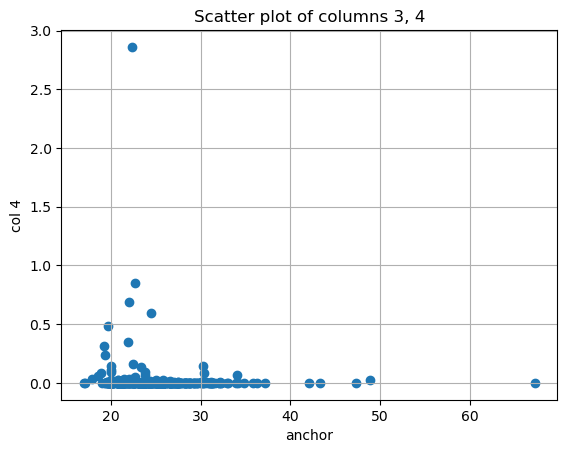

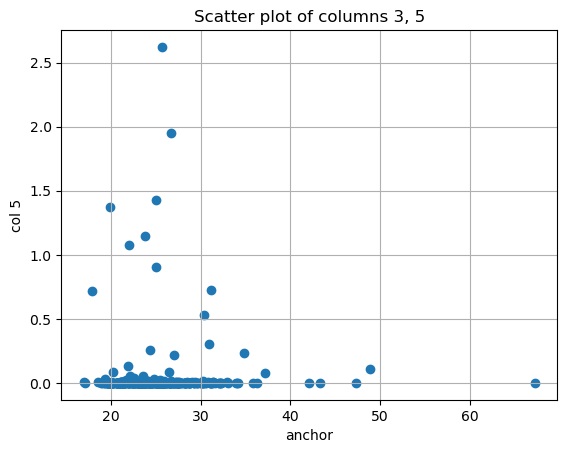

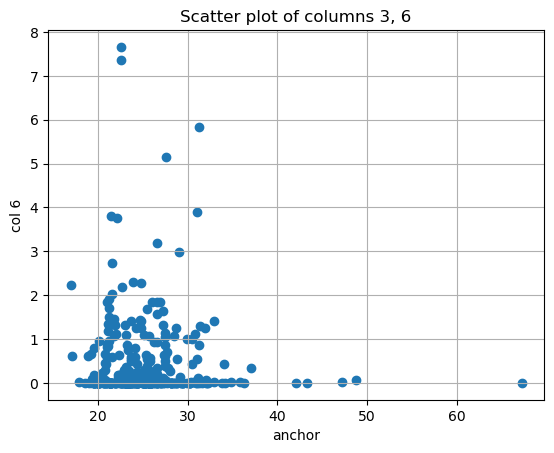

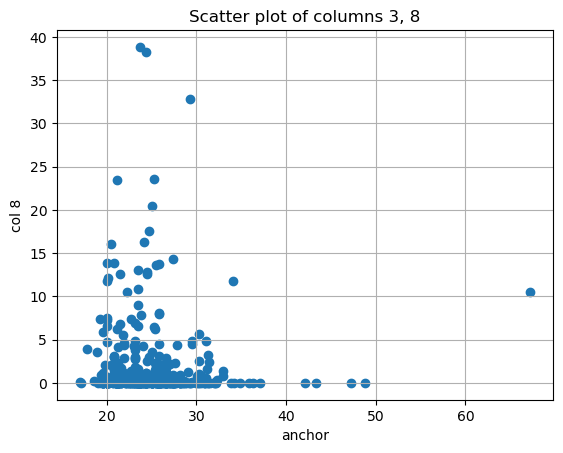

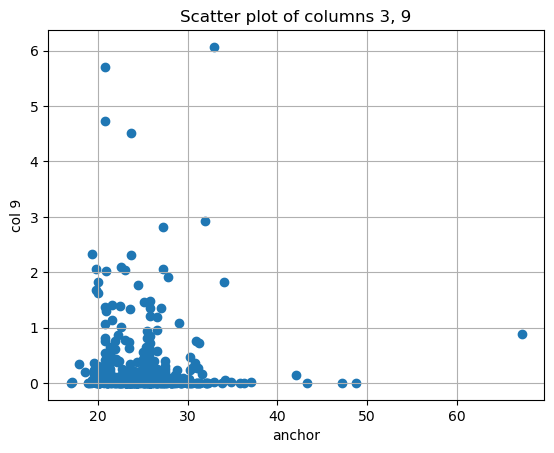

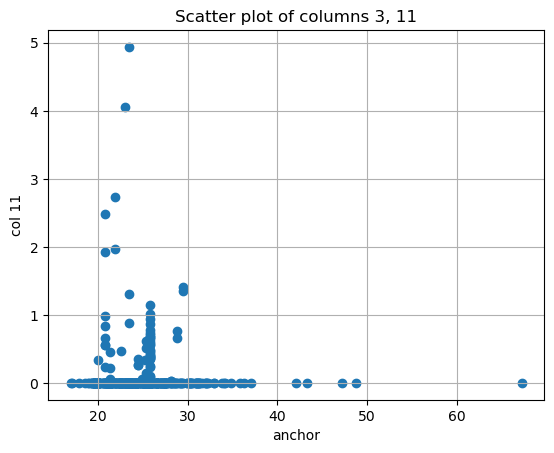

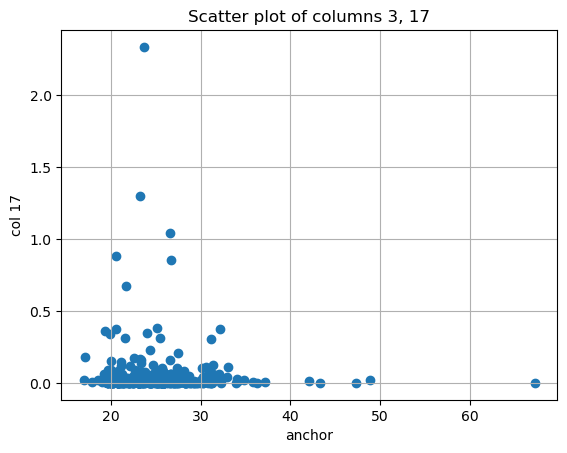

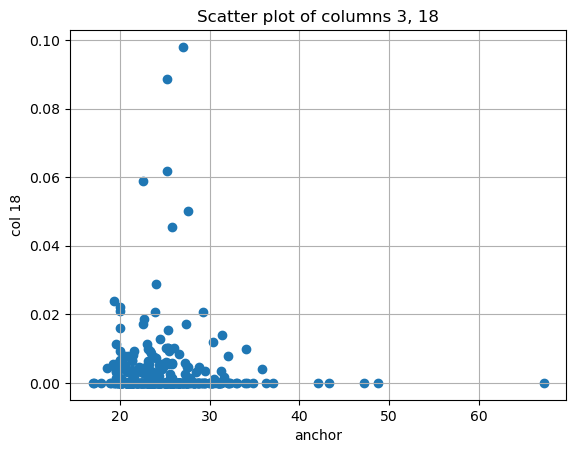

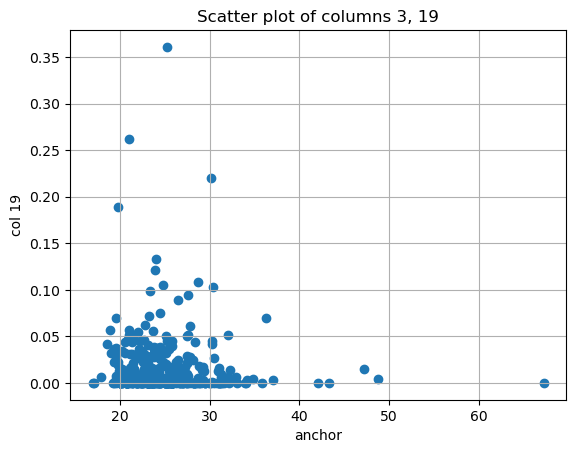

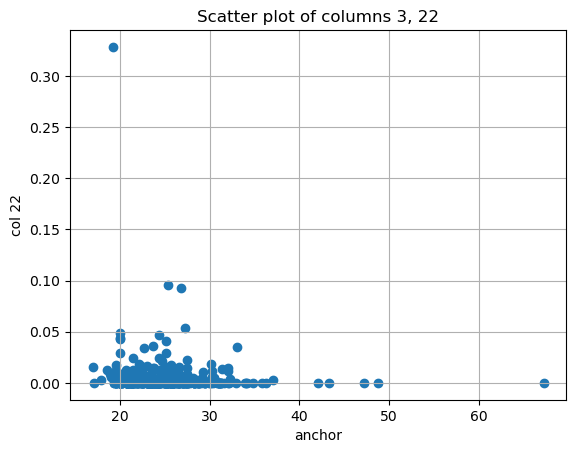

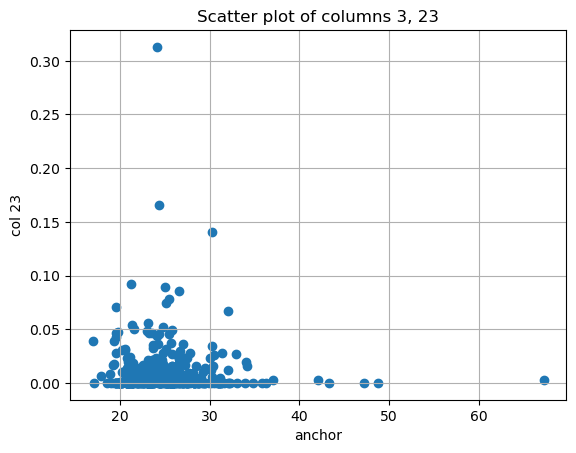

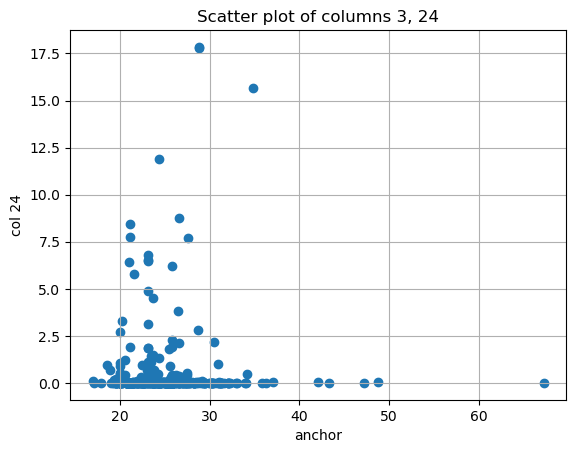

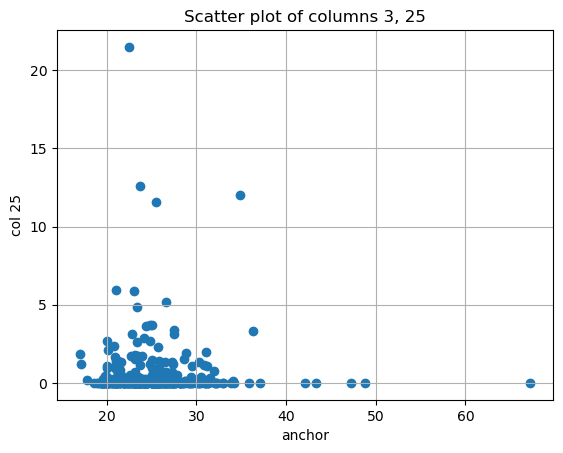

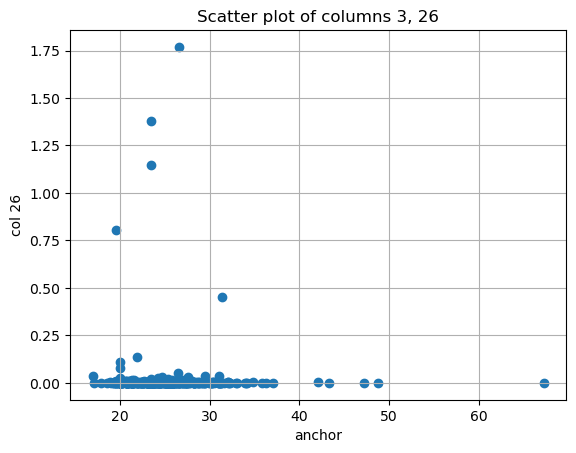

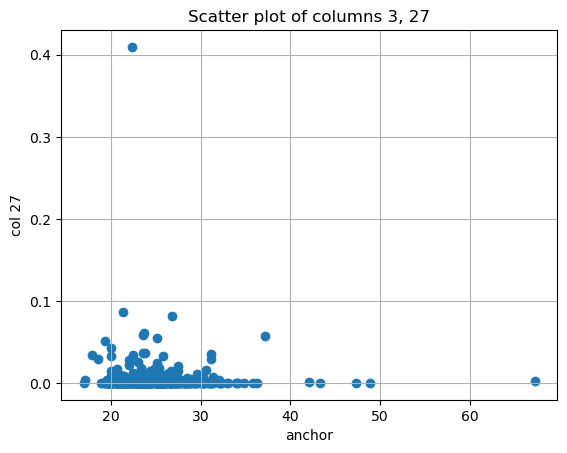

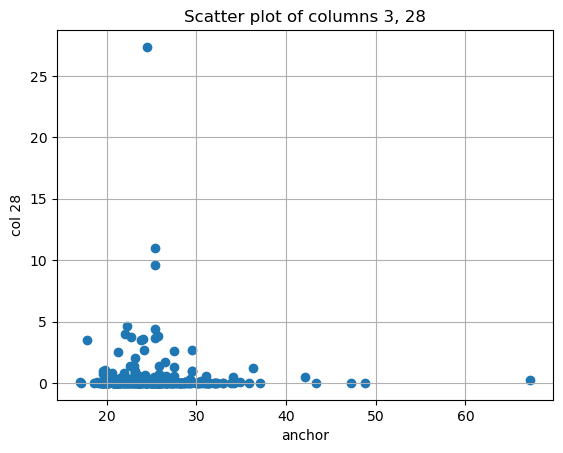

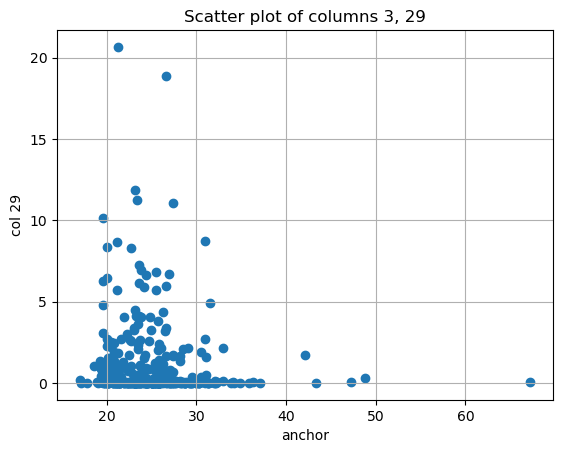

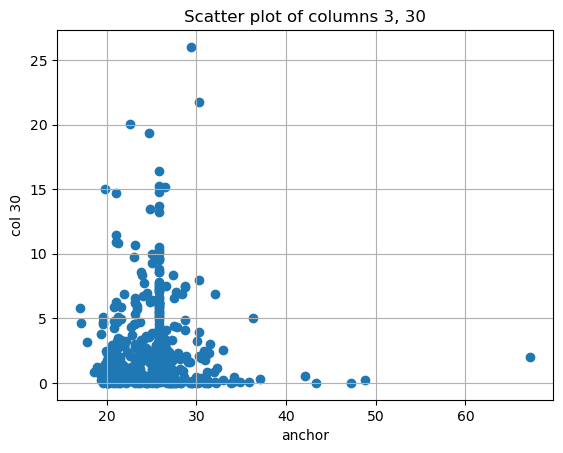

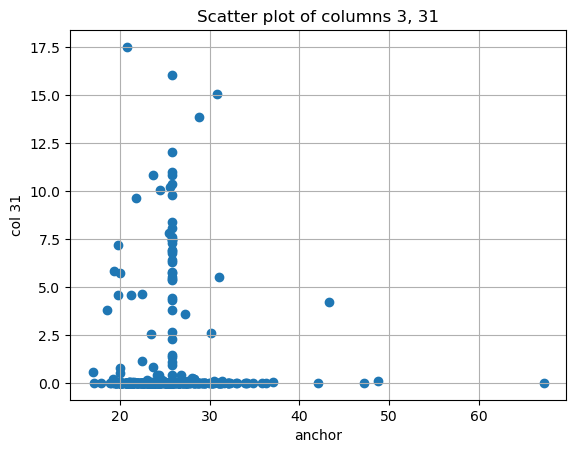

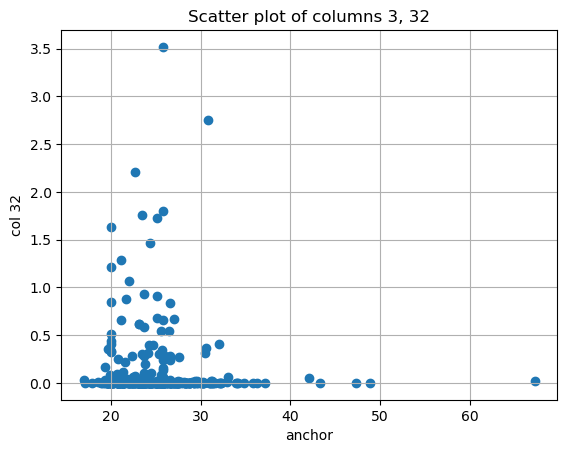

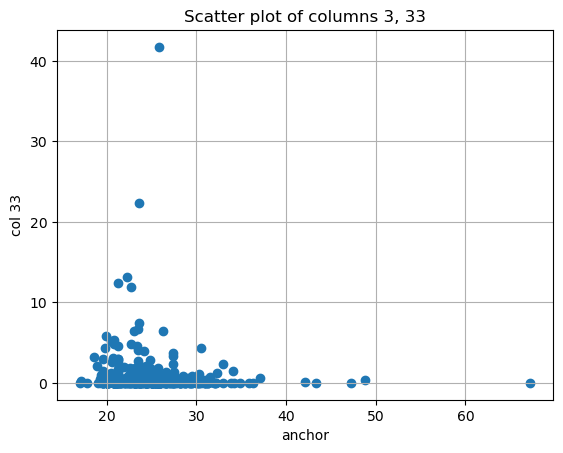

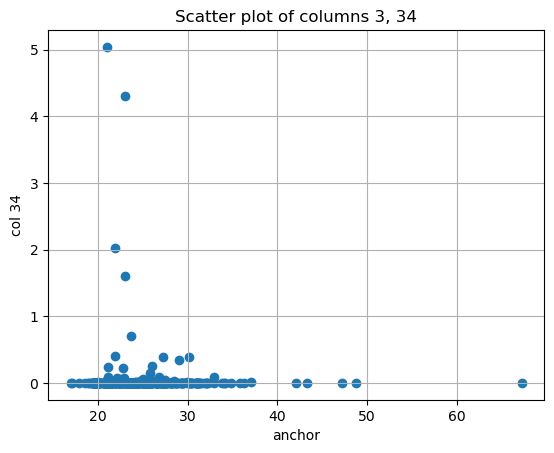

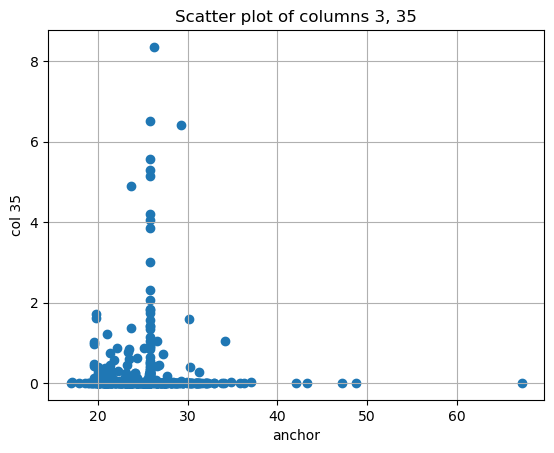

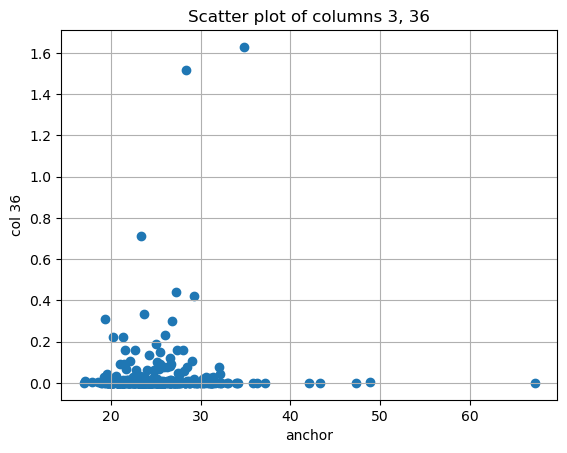

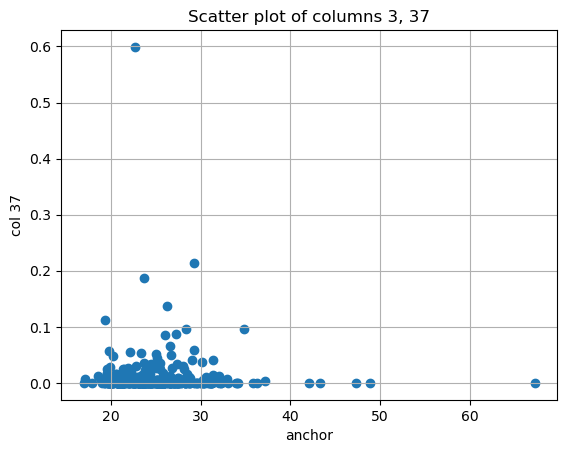

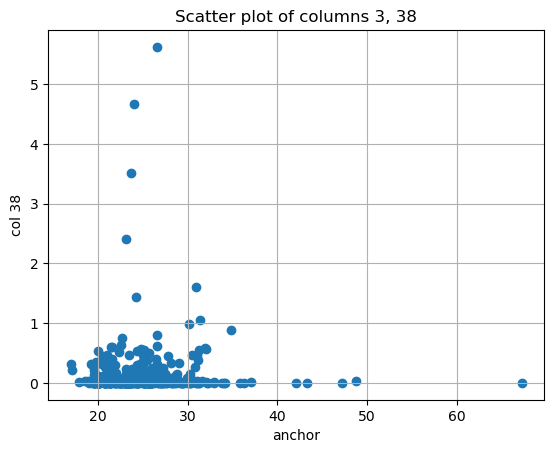

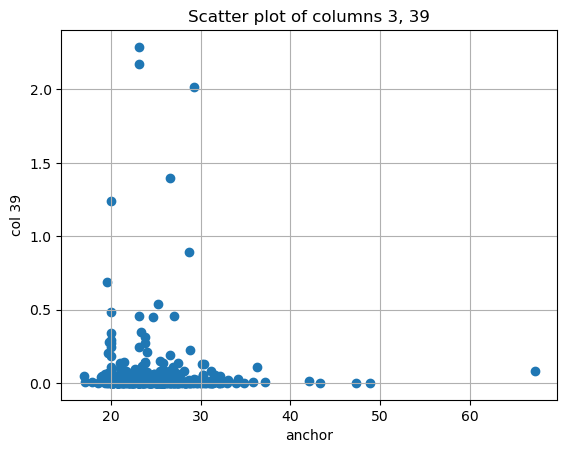

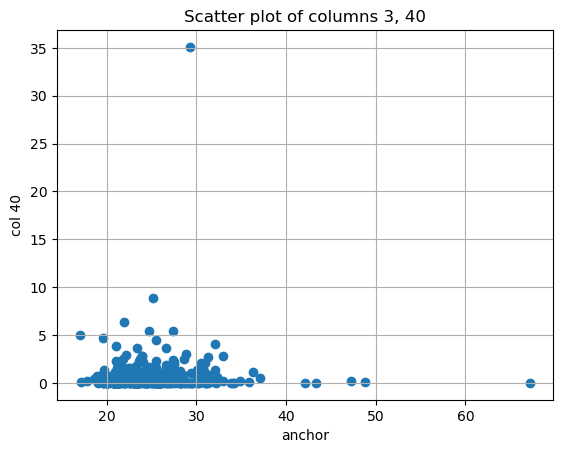

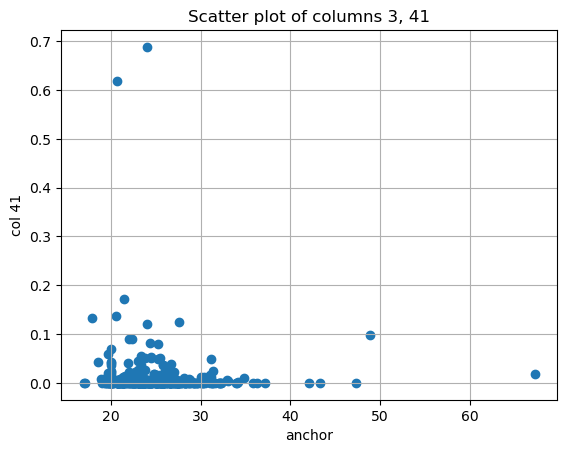

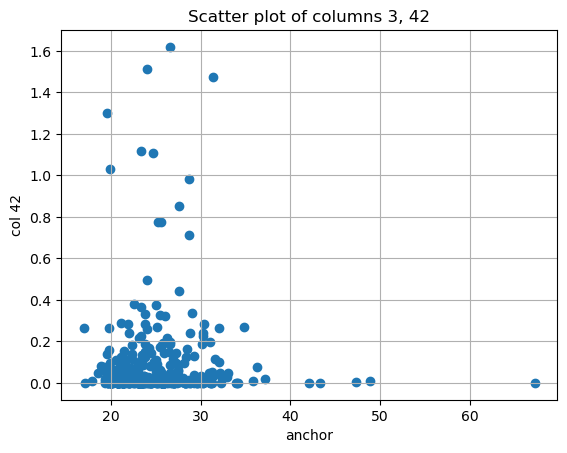

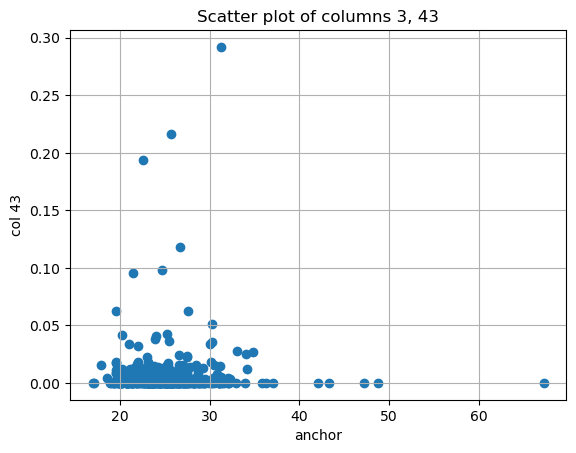

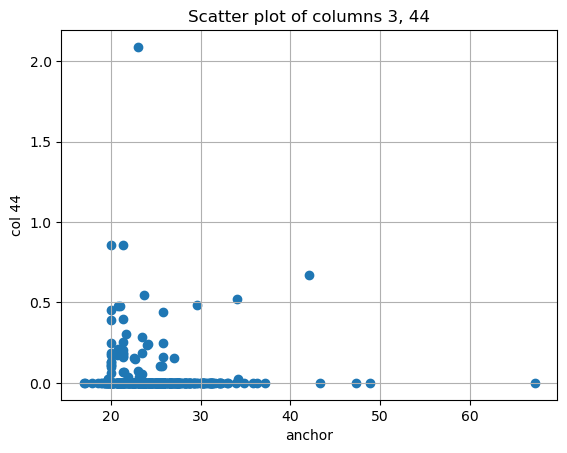

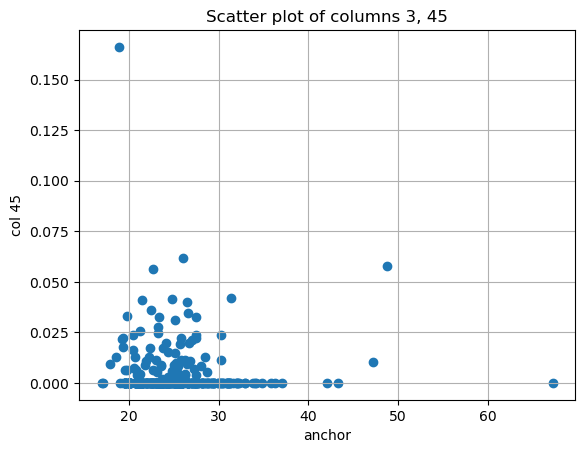

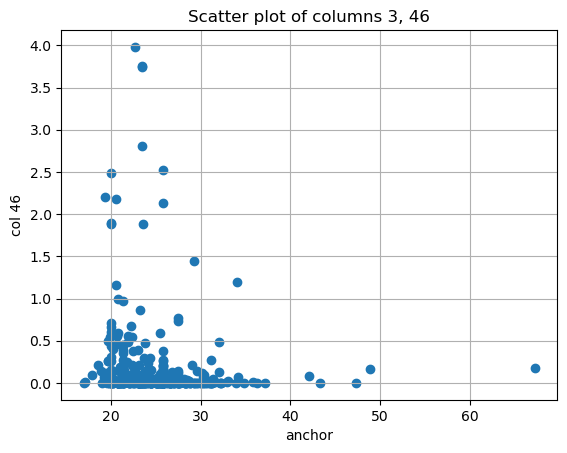

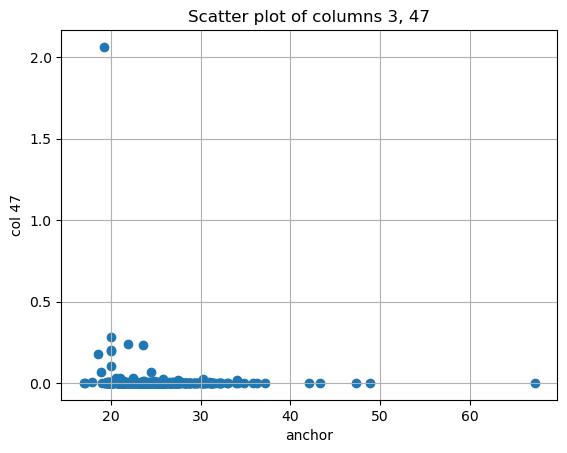

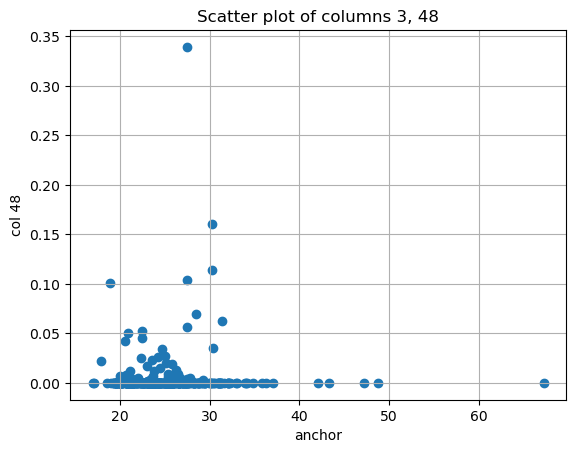

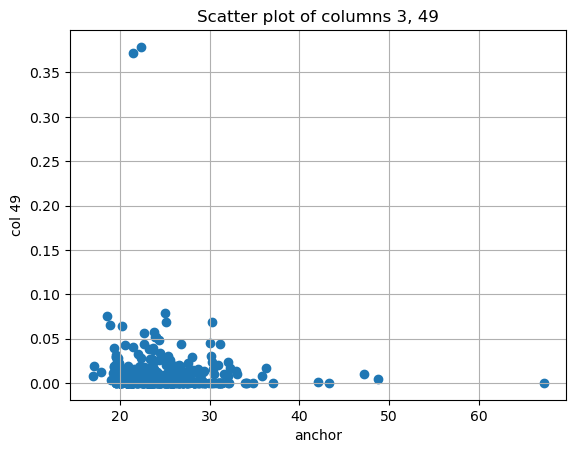

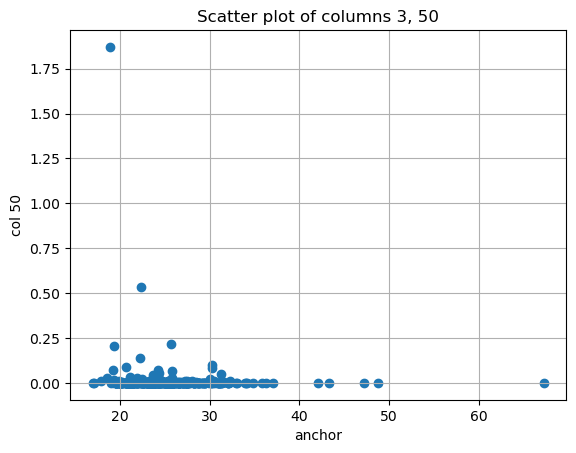

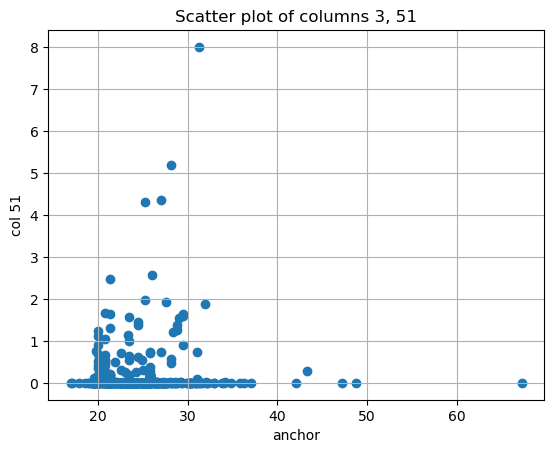

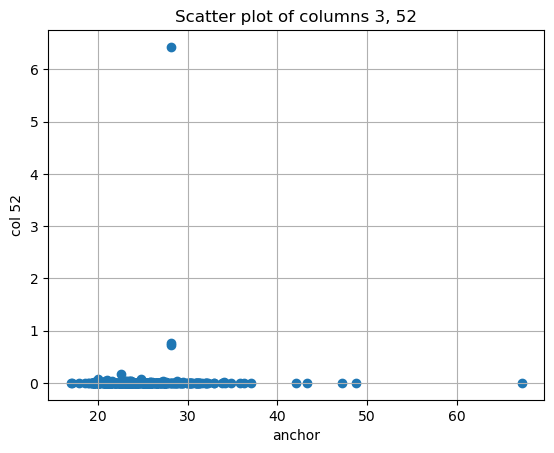

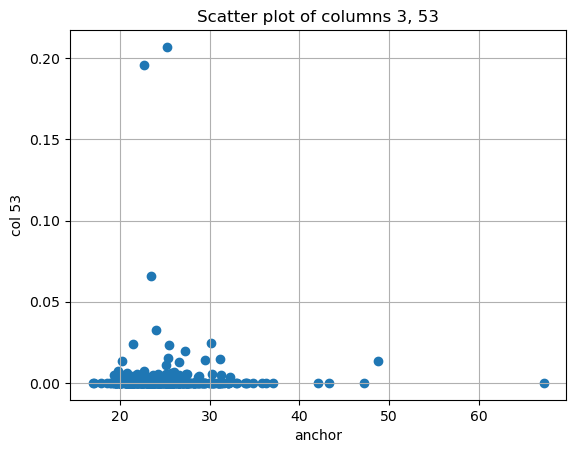

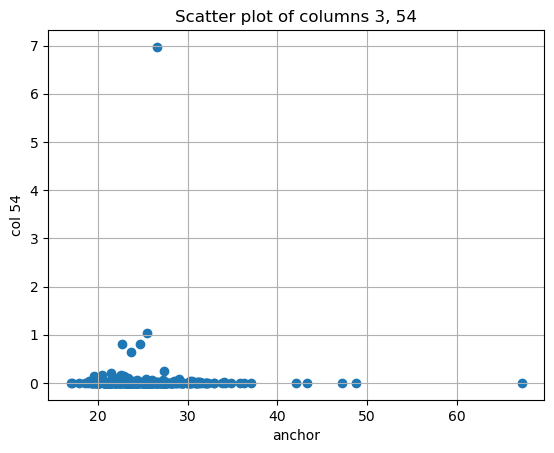

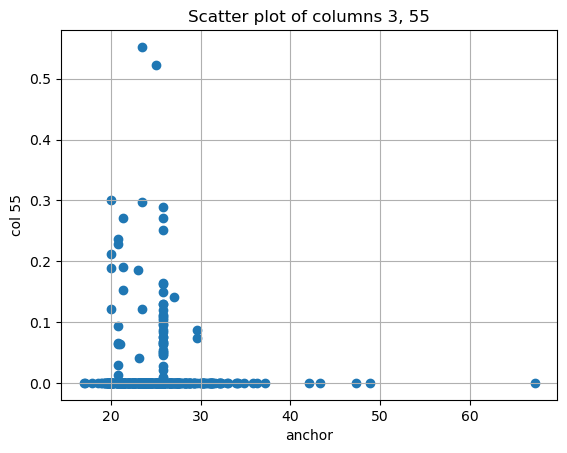

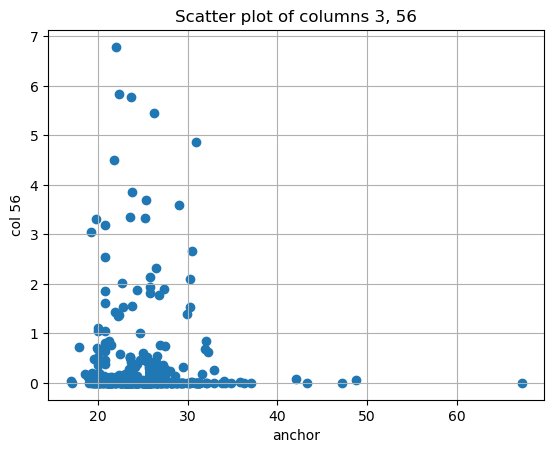

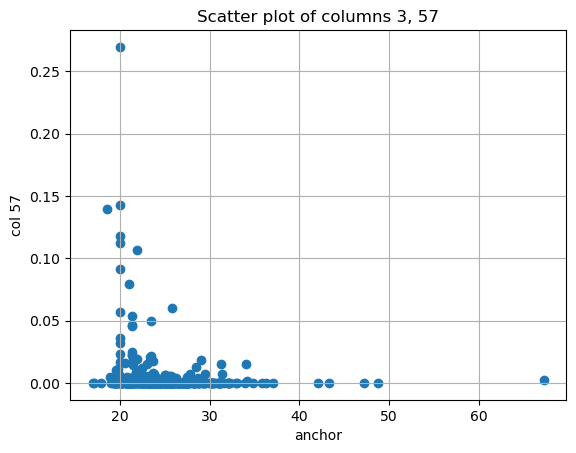

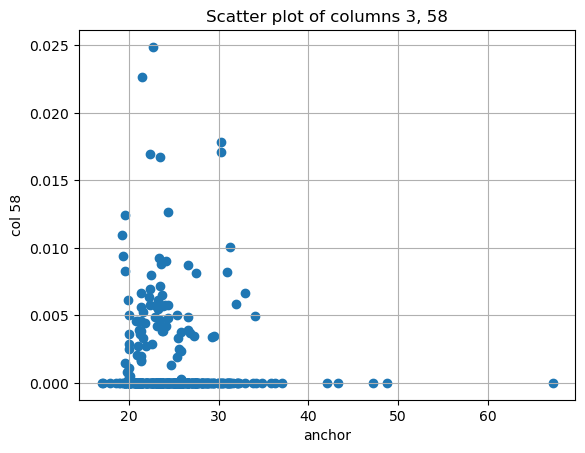

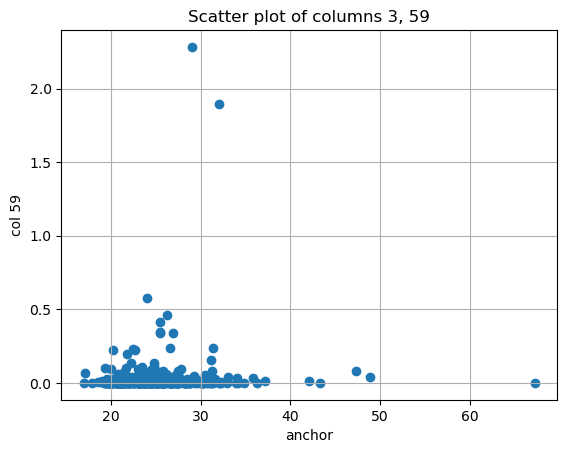

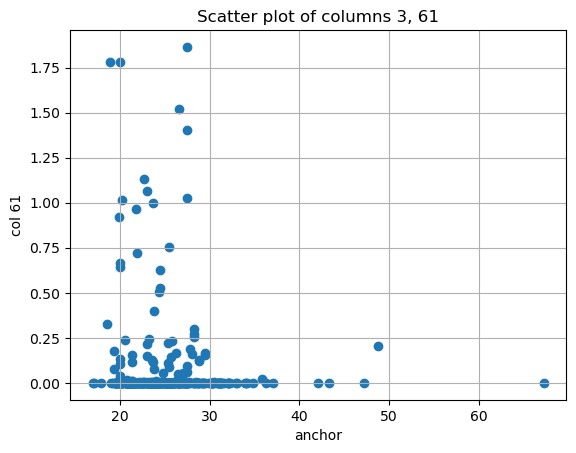

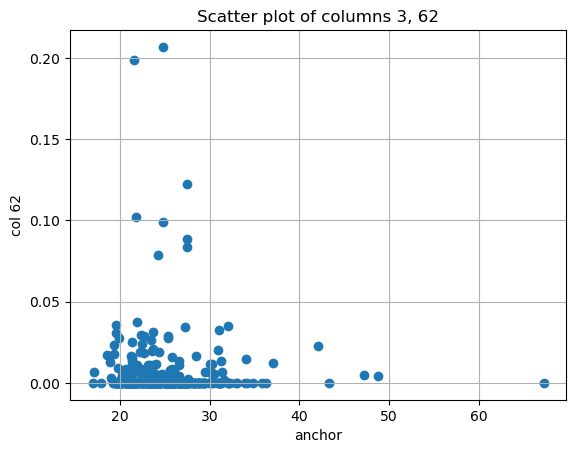

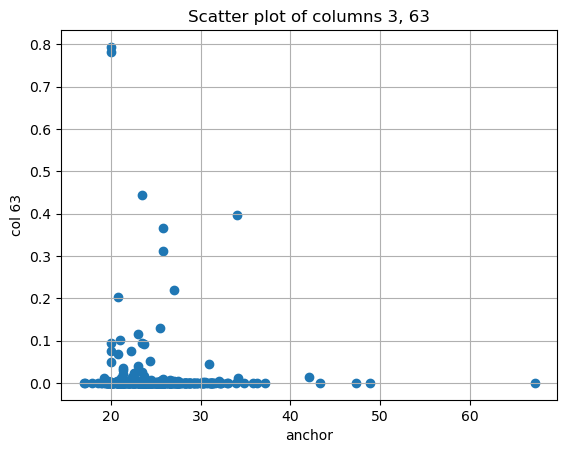

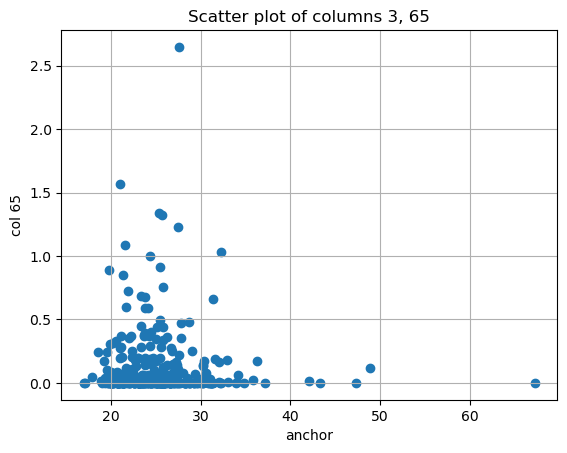

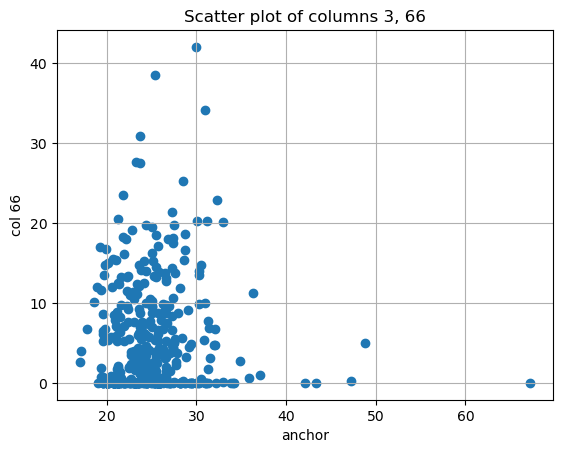

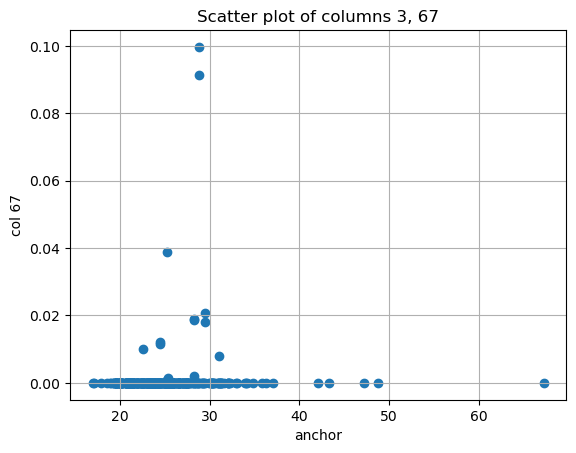

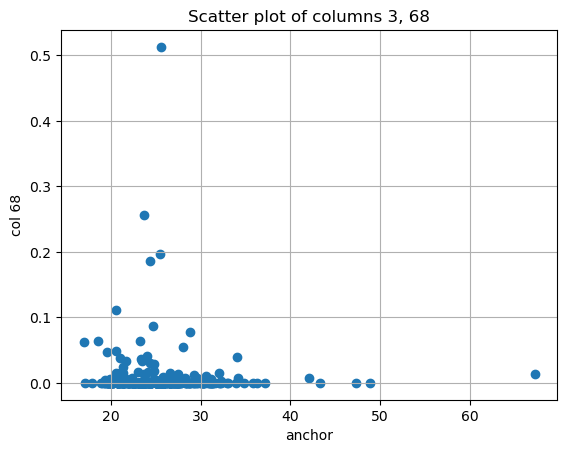

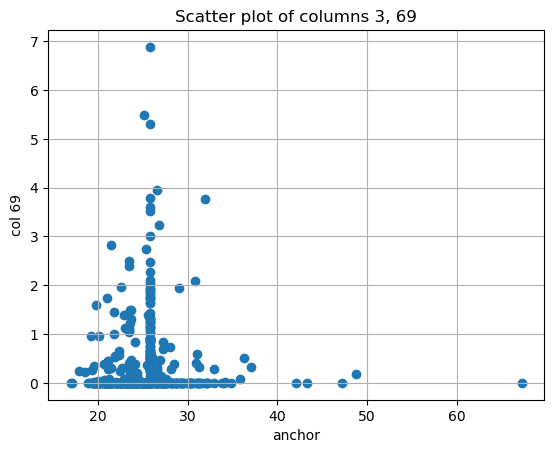

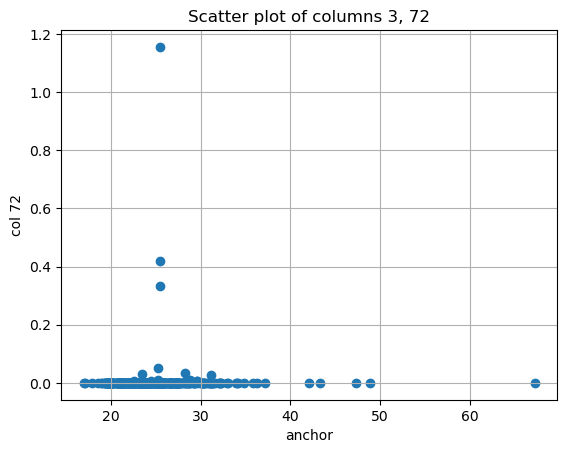

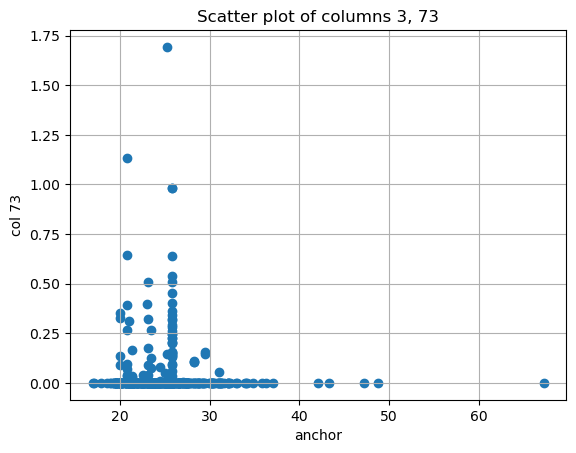

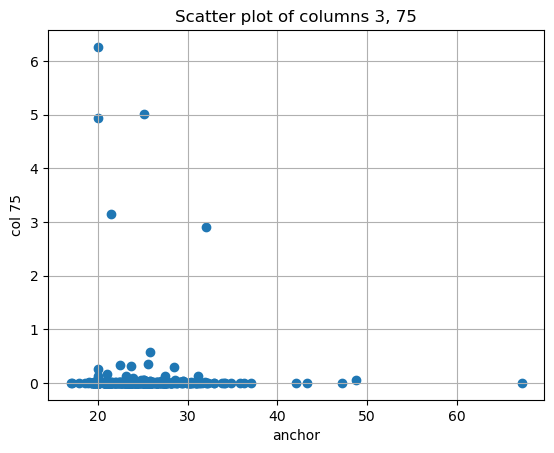

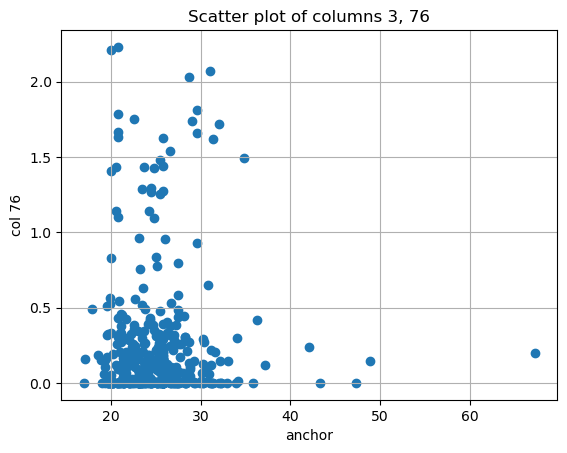

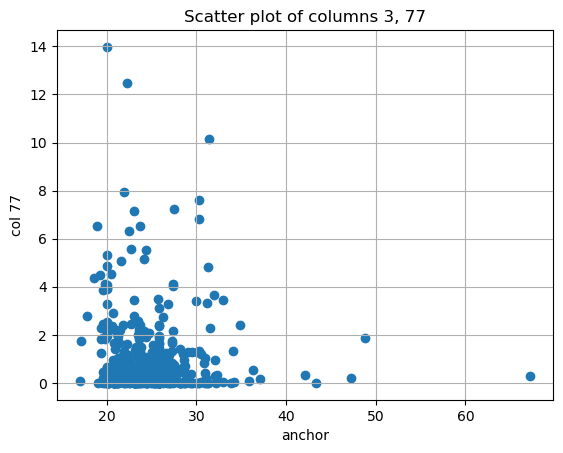

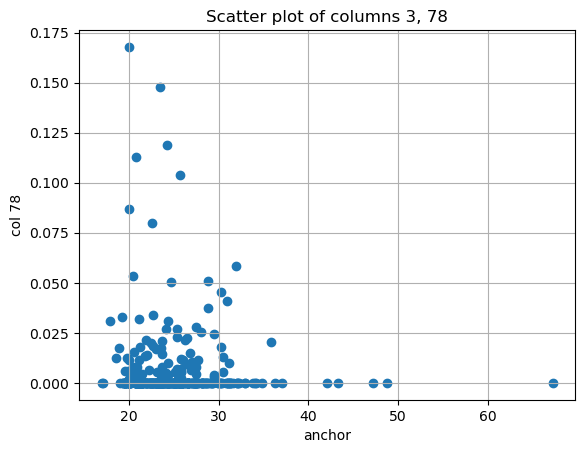

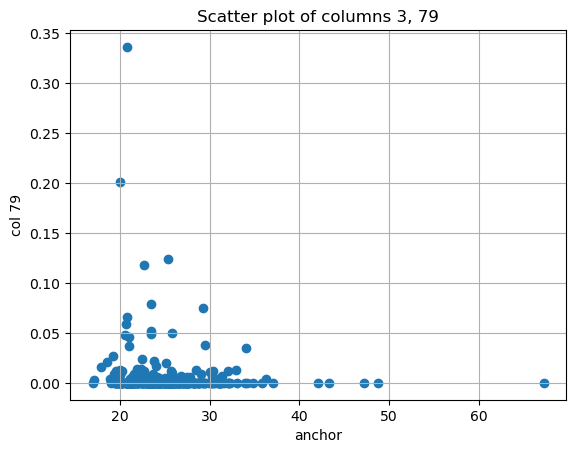

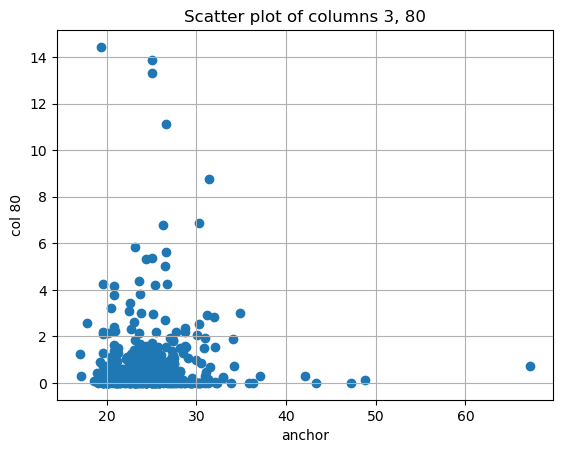

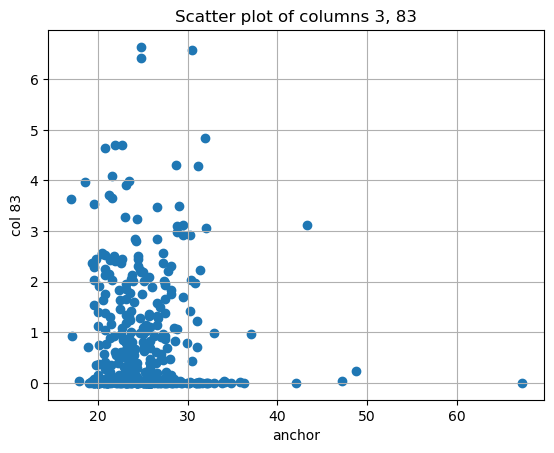

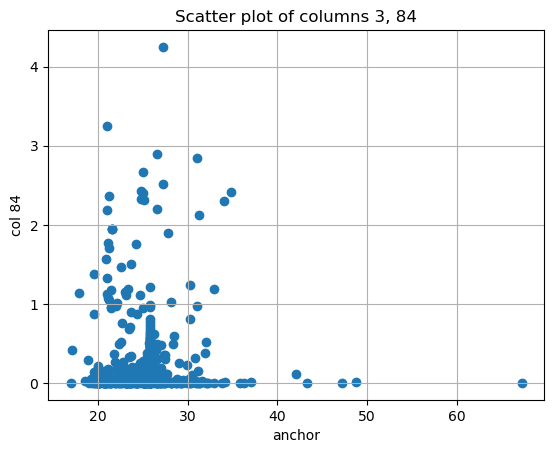

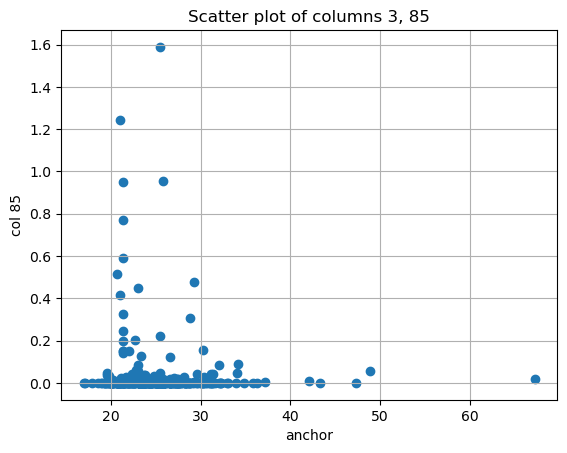

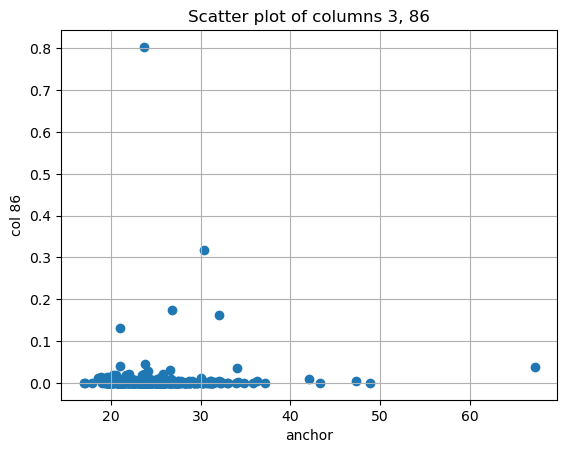

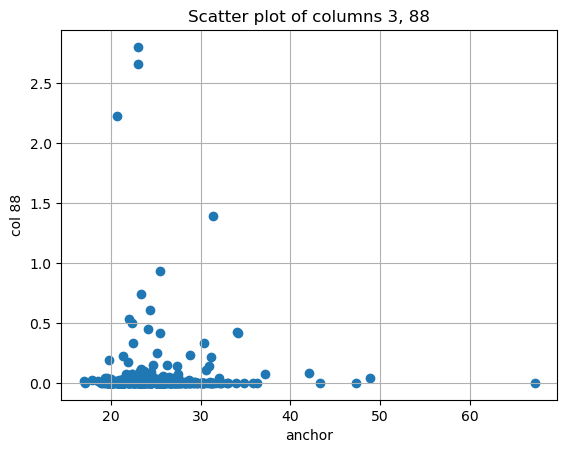

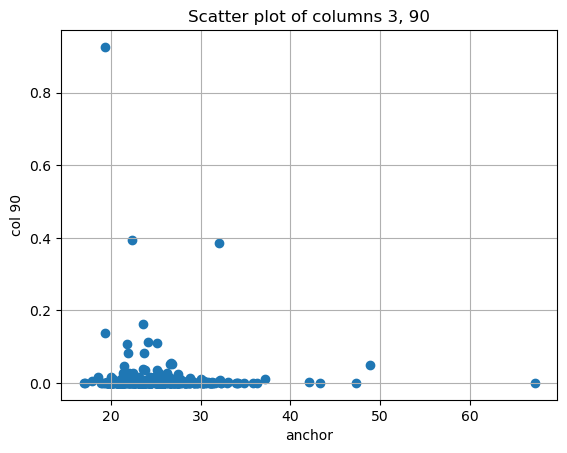

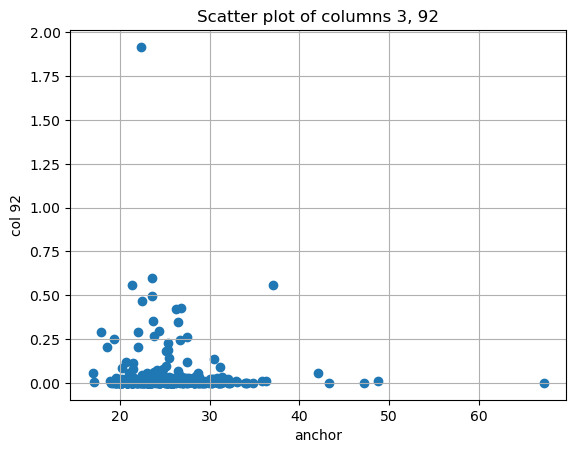

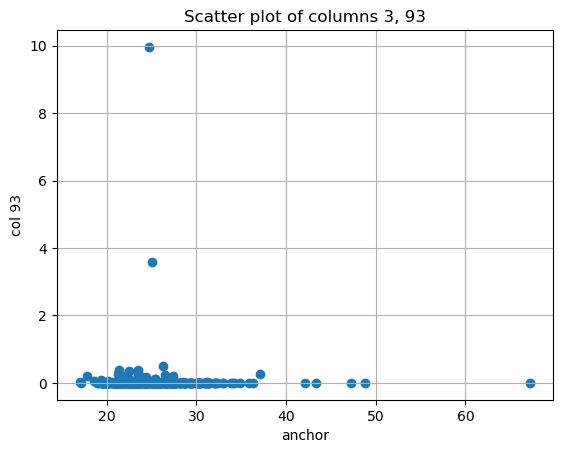

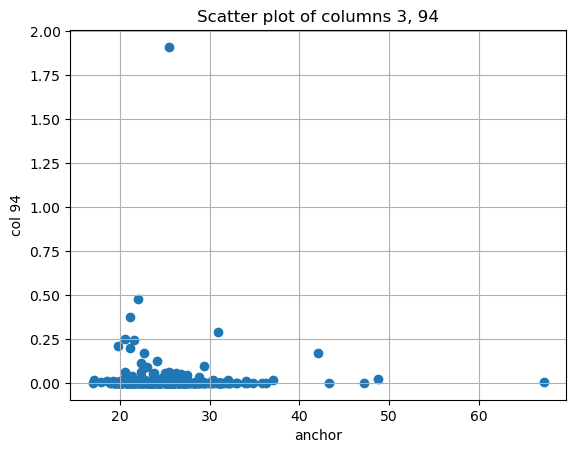

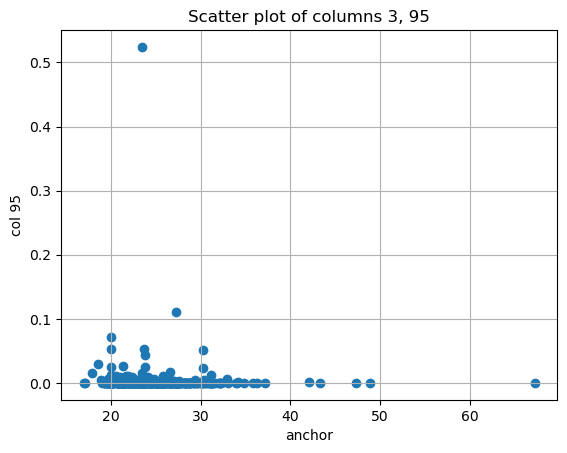

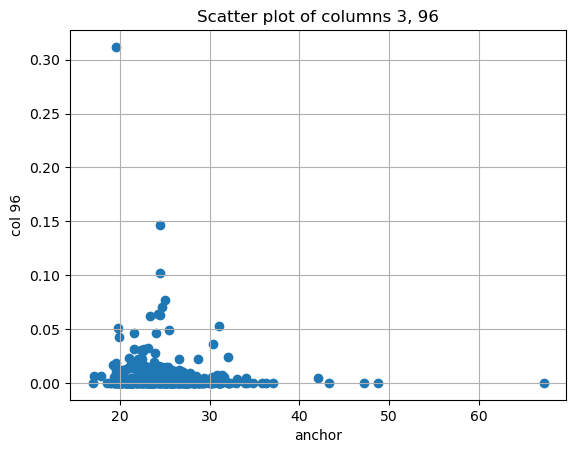

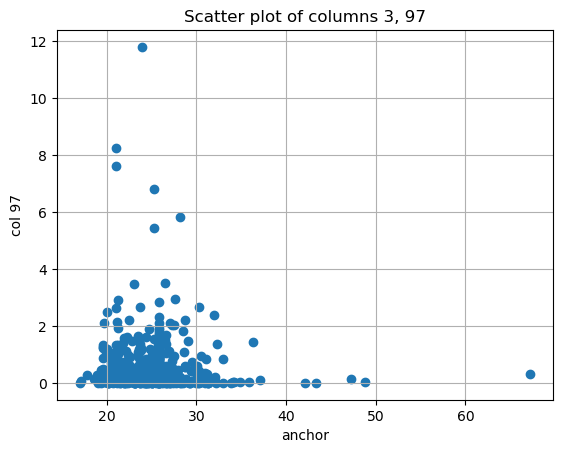

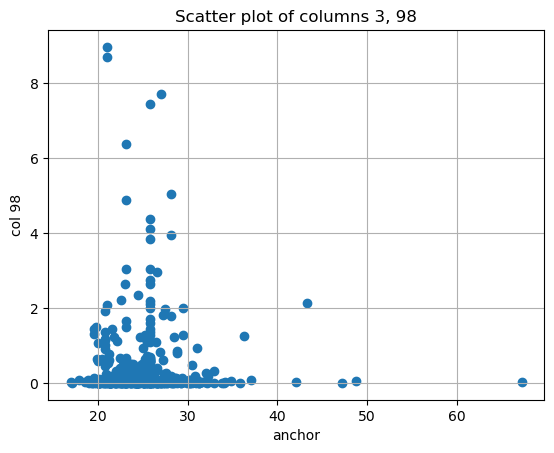

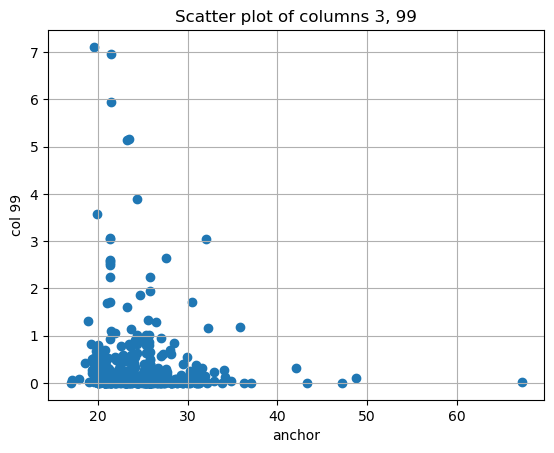

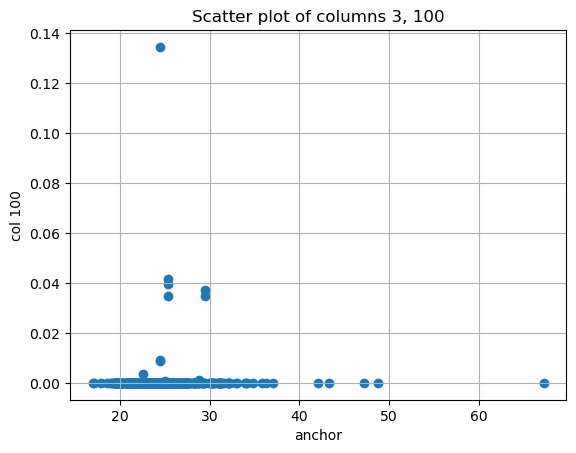

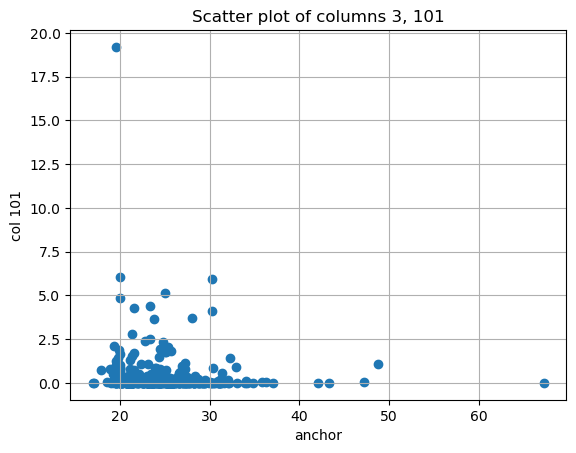

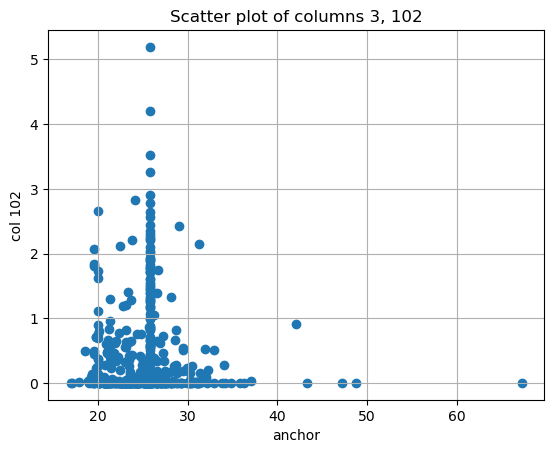

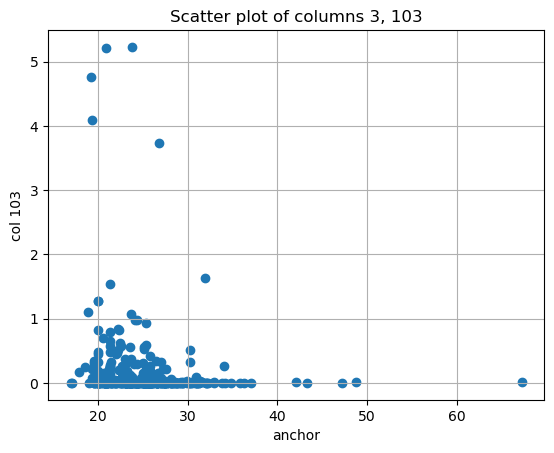

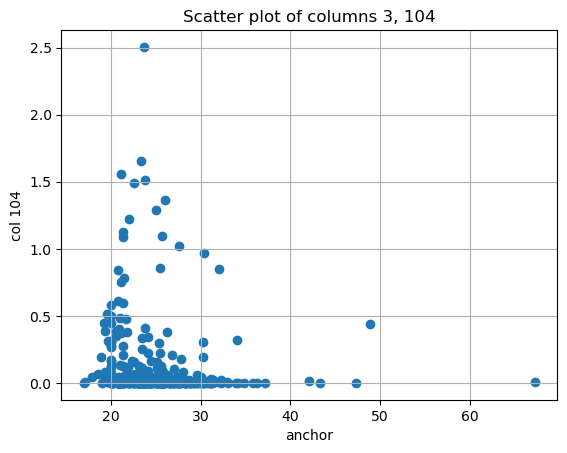

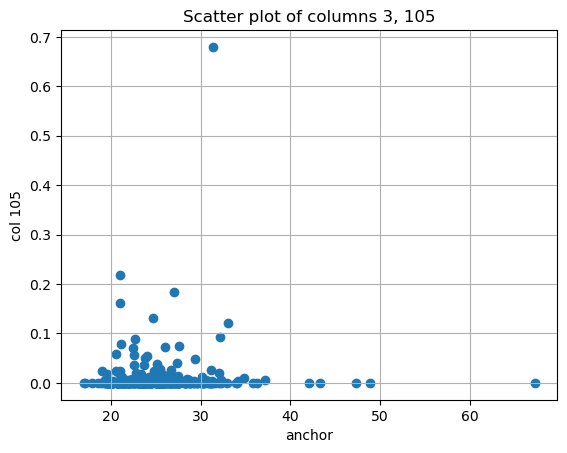

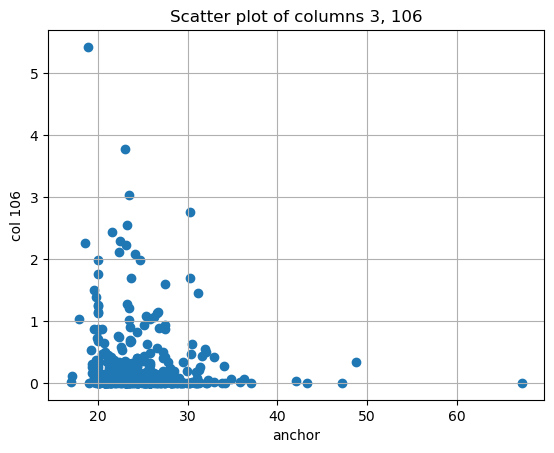

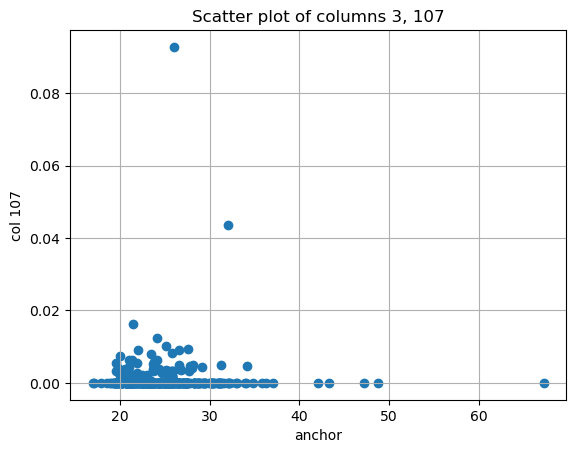

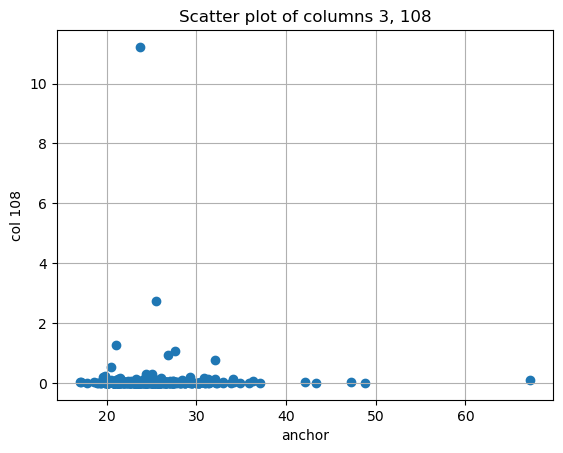

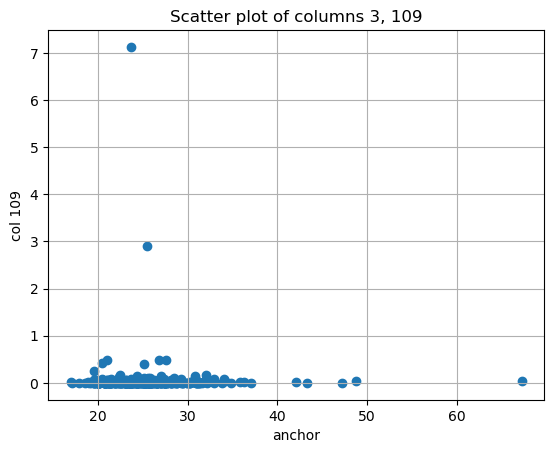

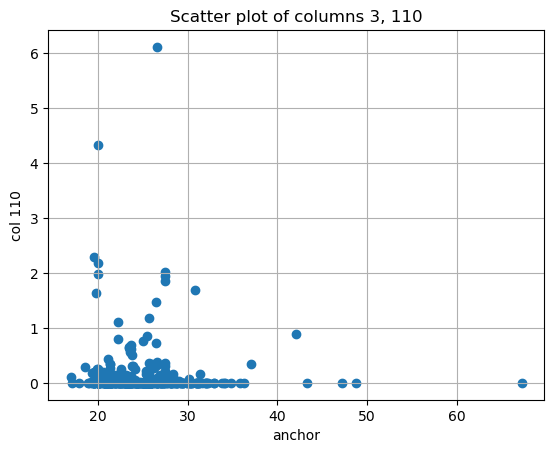

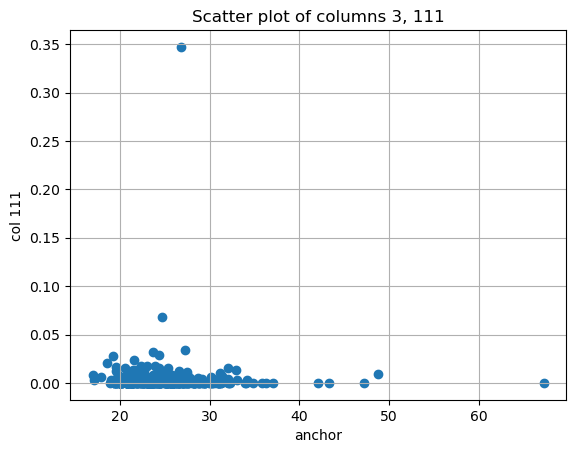

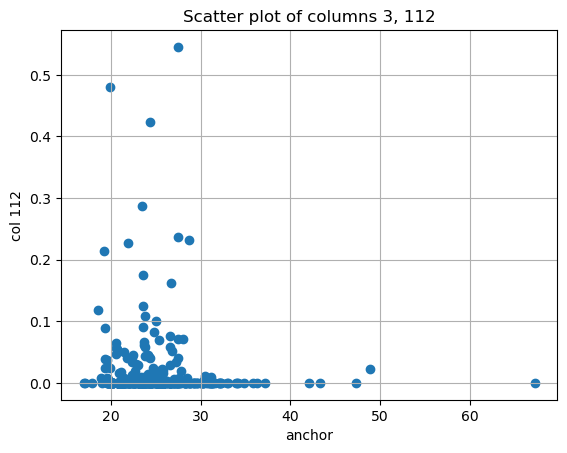

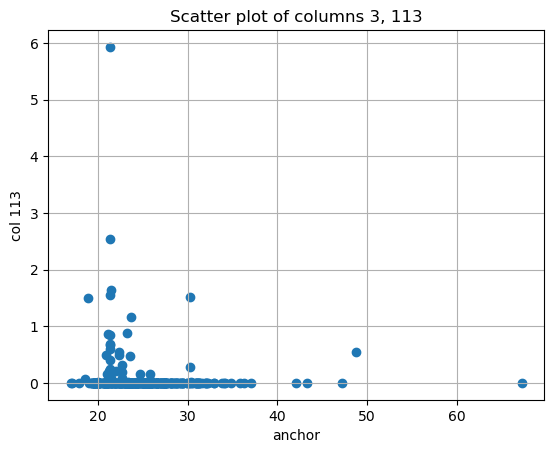

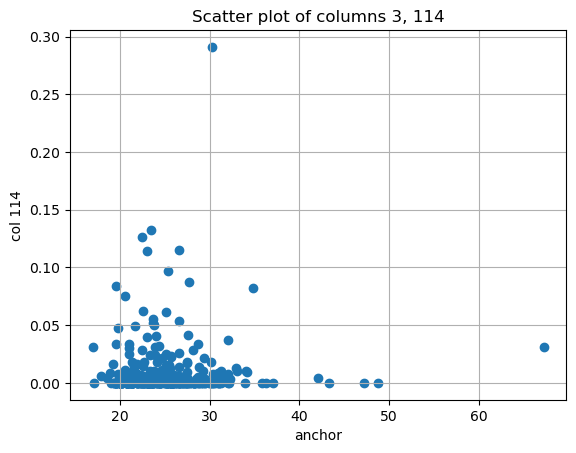

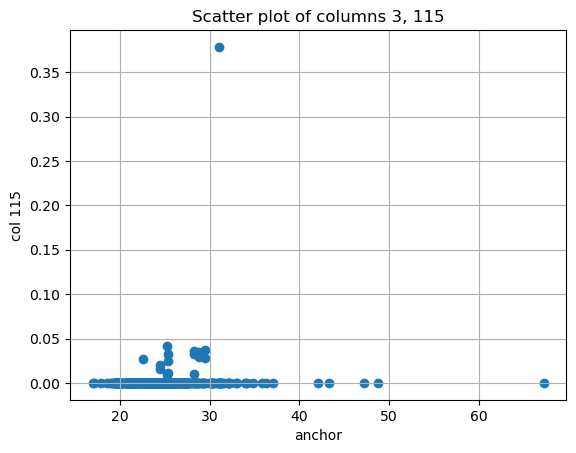

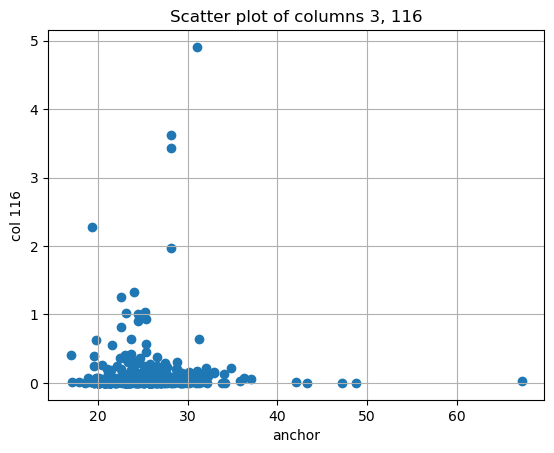

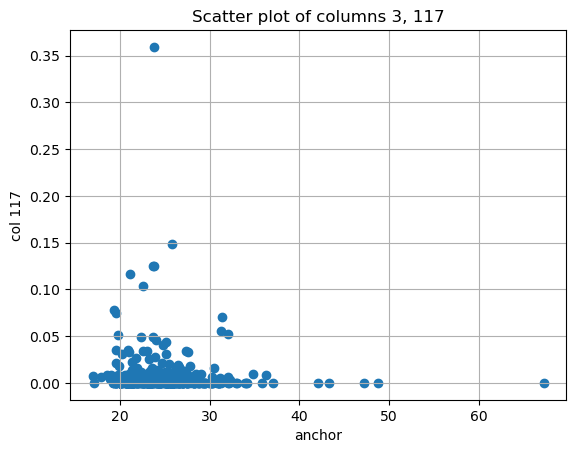

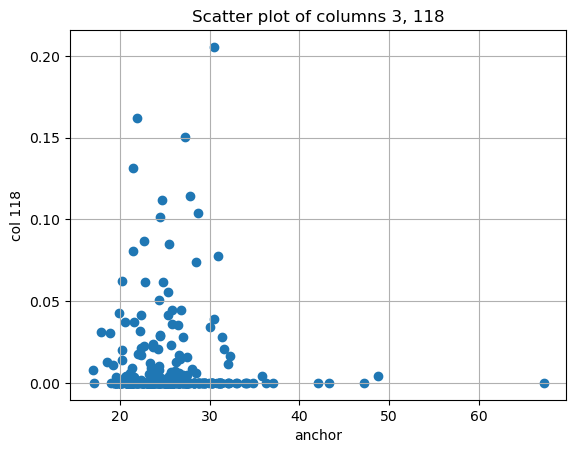

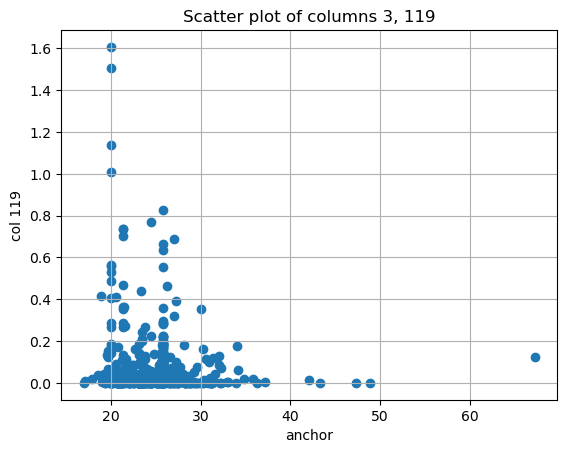

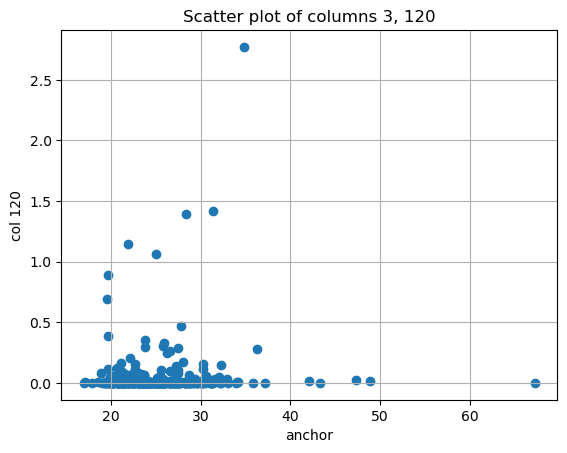

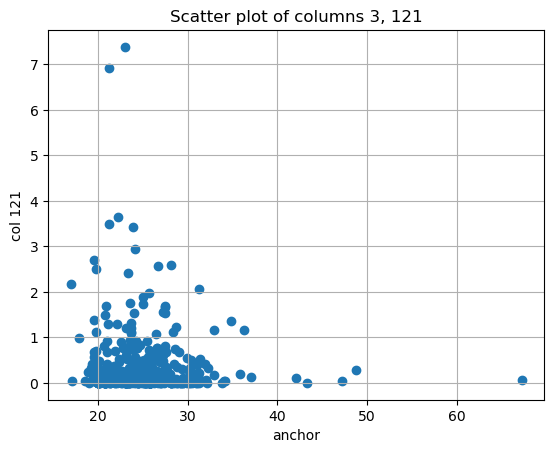

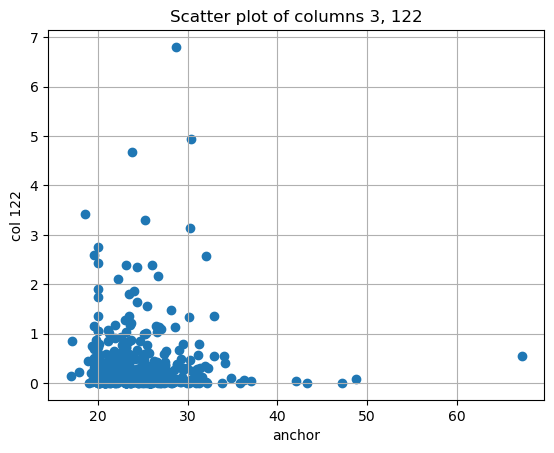

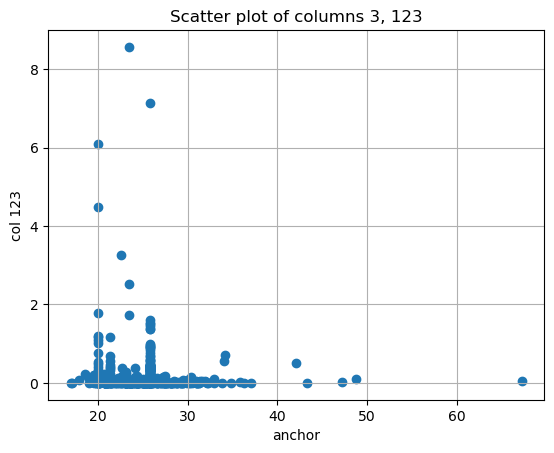

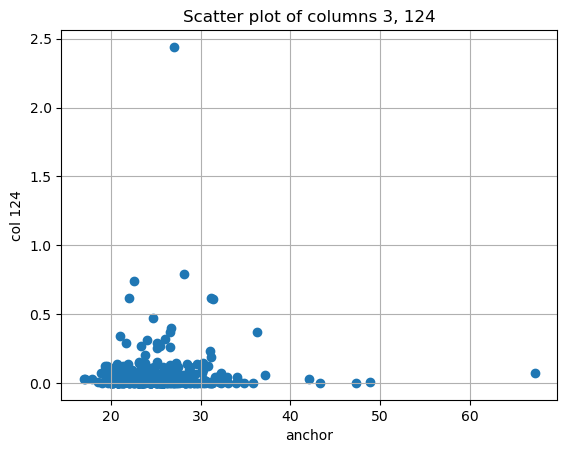

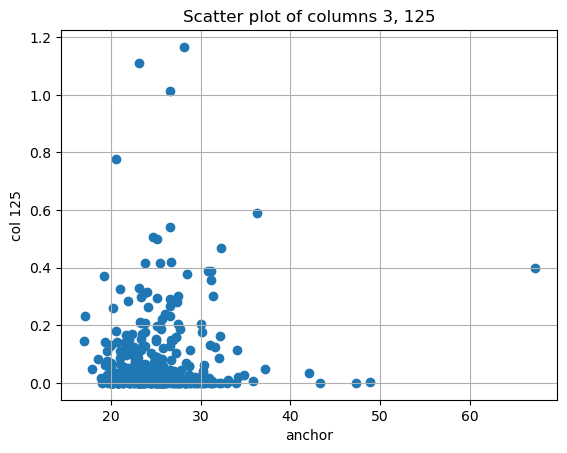

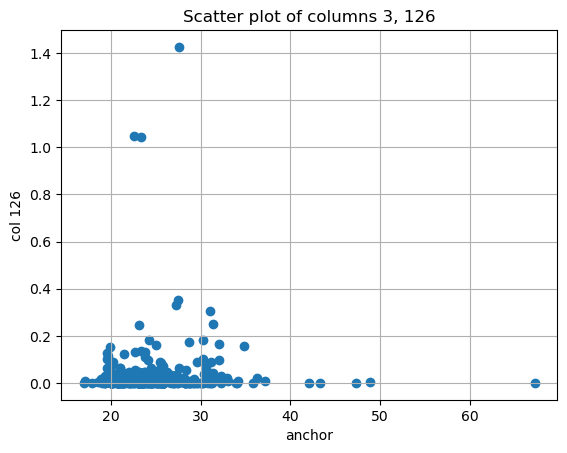

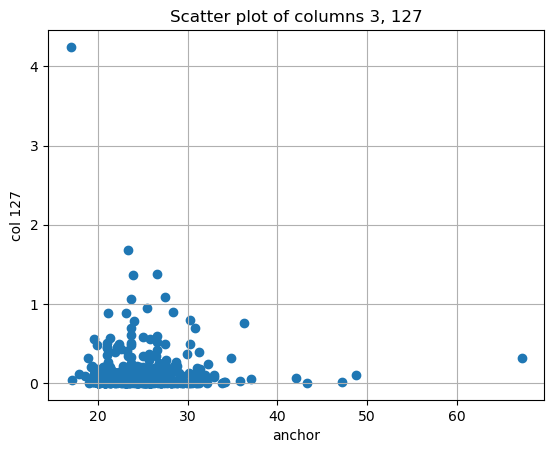

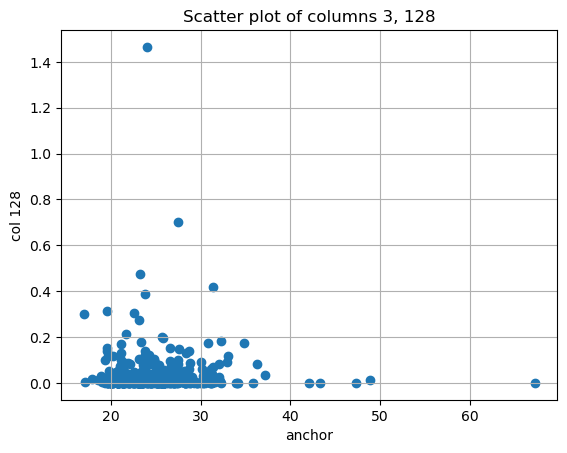

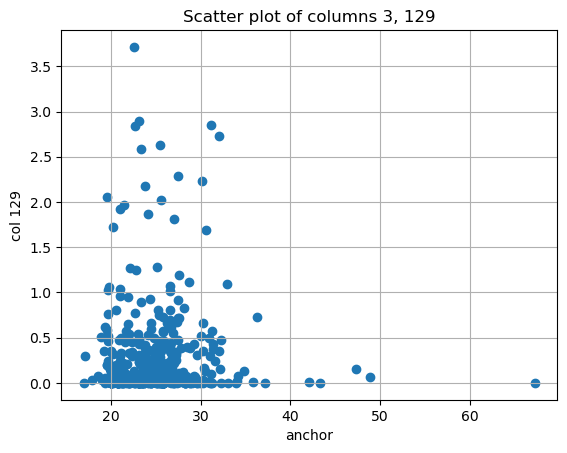

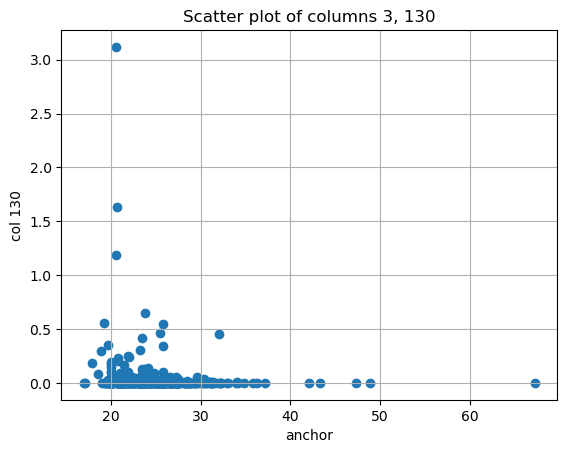

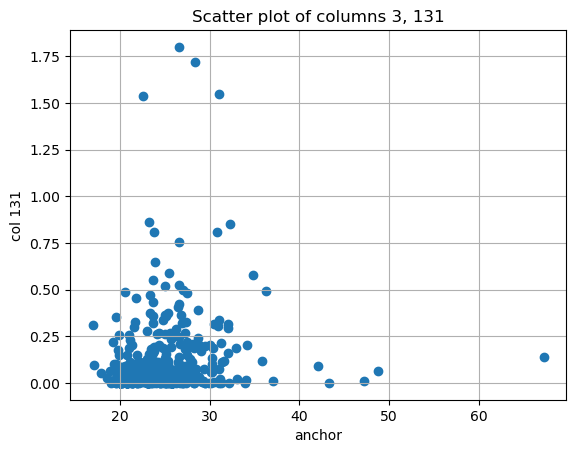

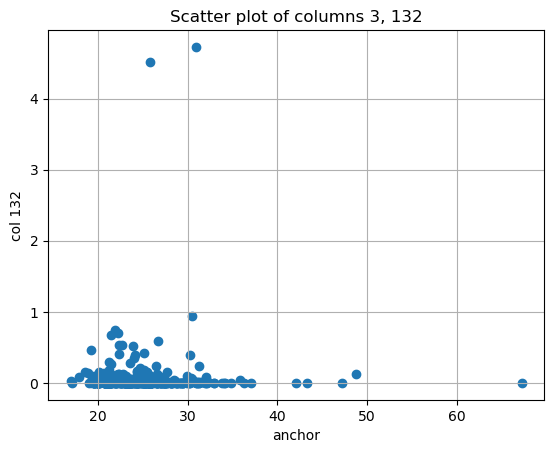

Function 'twoCol' executed in 15.4746 seconds


In [23]:
twoCol(devFinal, 3)


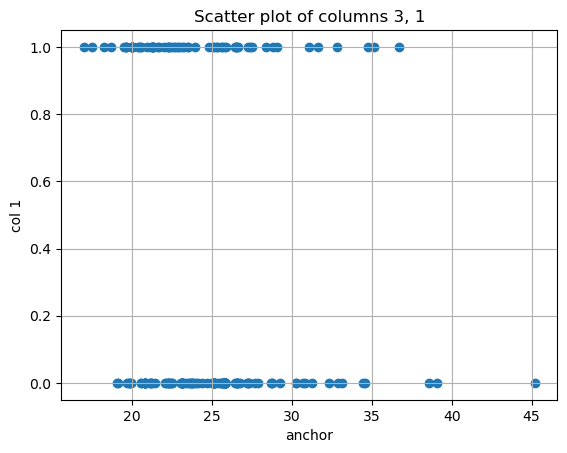

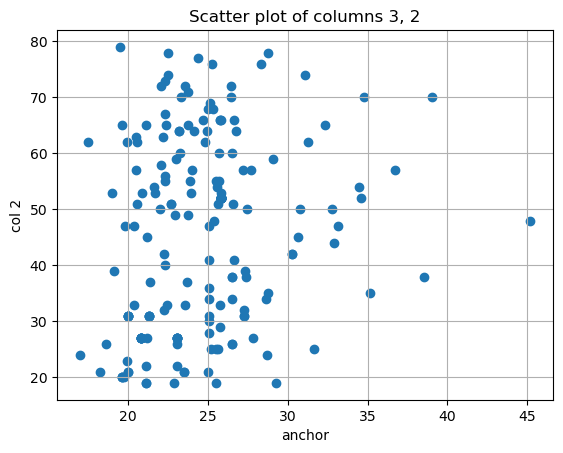

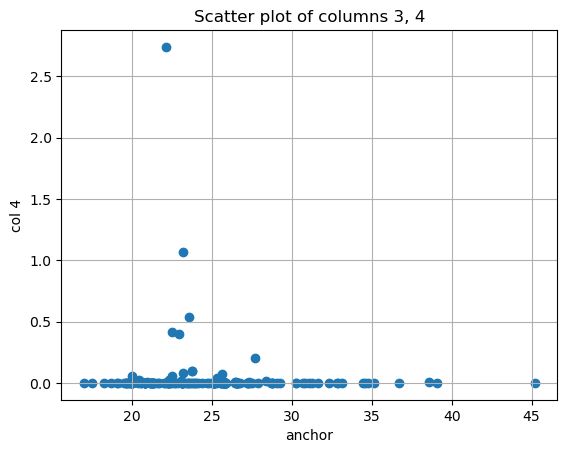

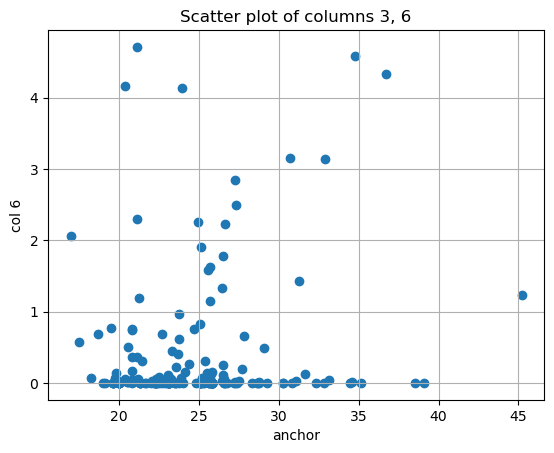

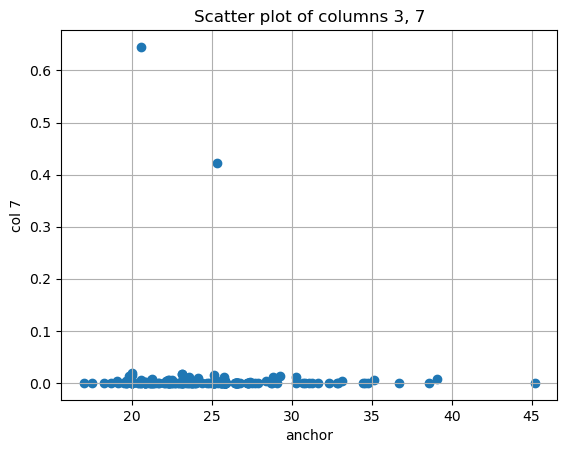

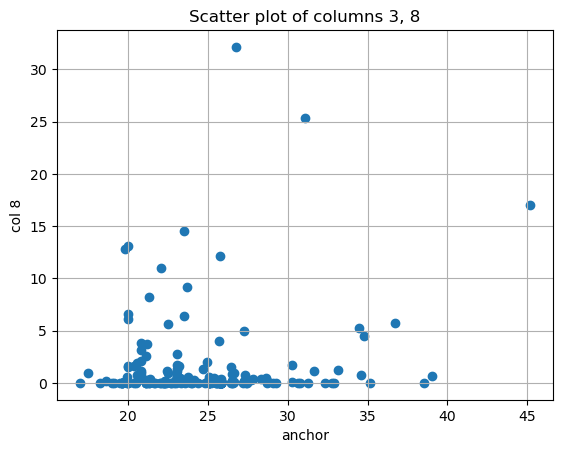

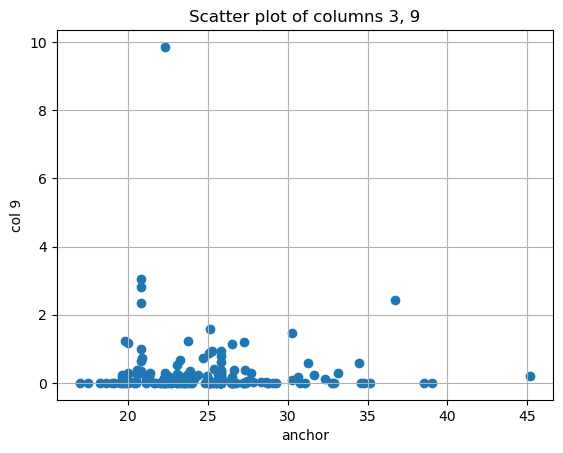

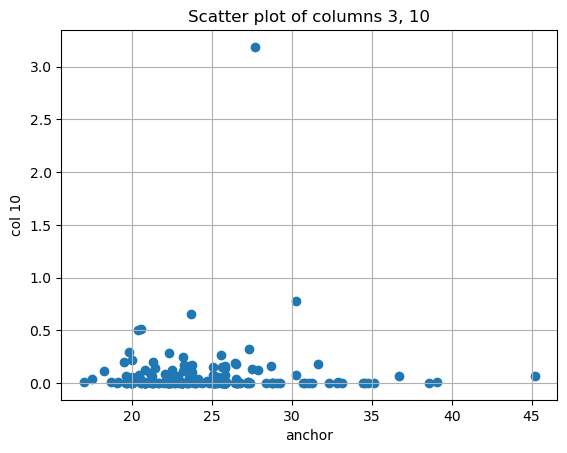

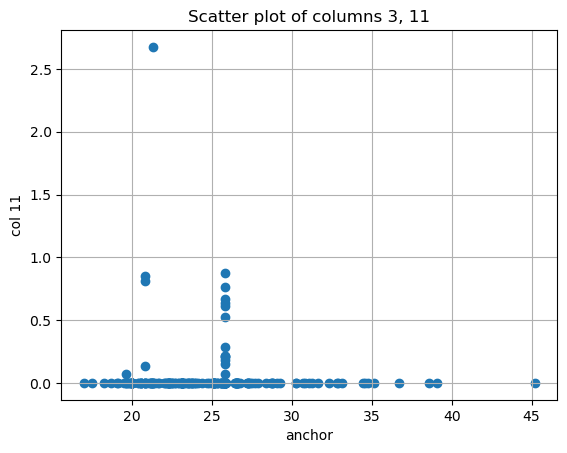

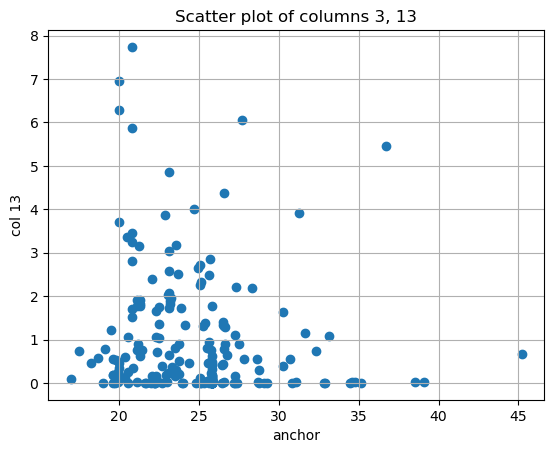

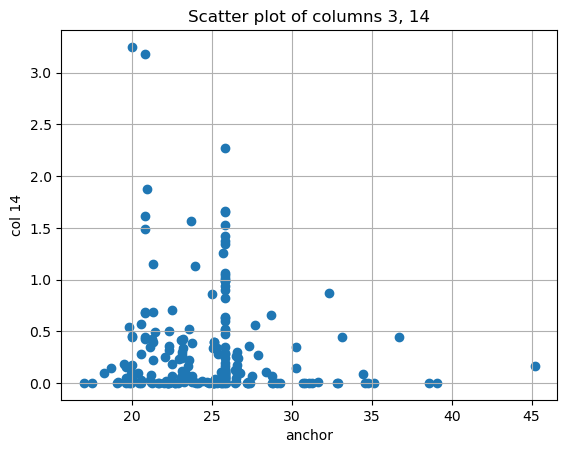

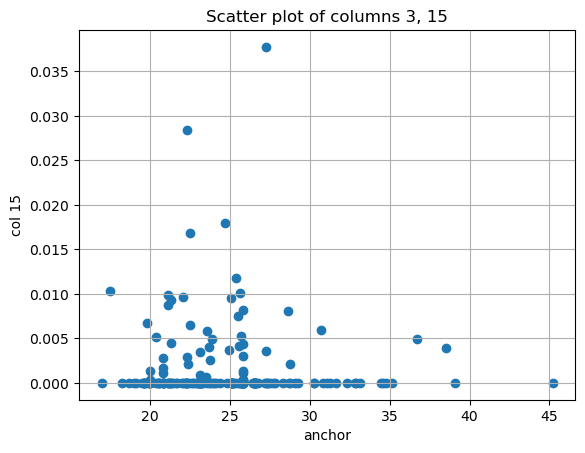

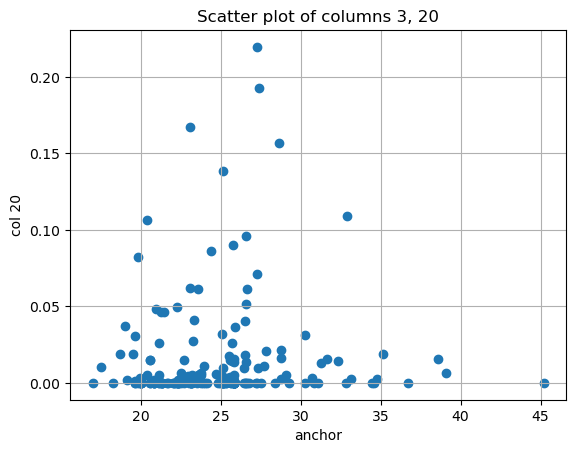

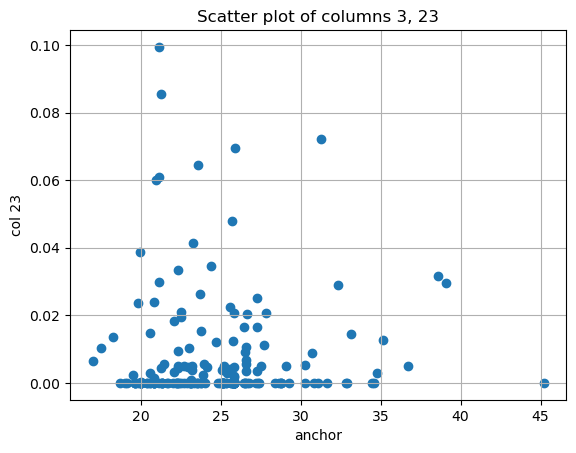

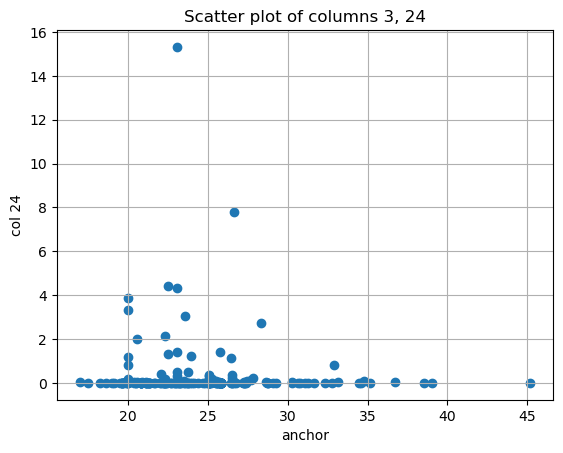

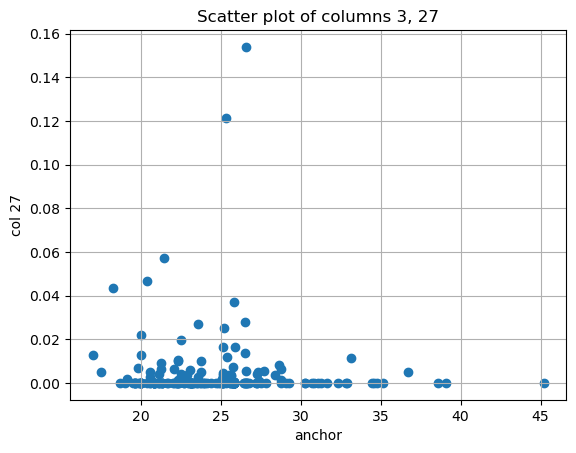

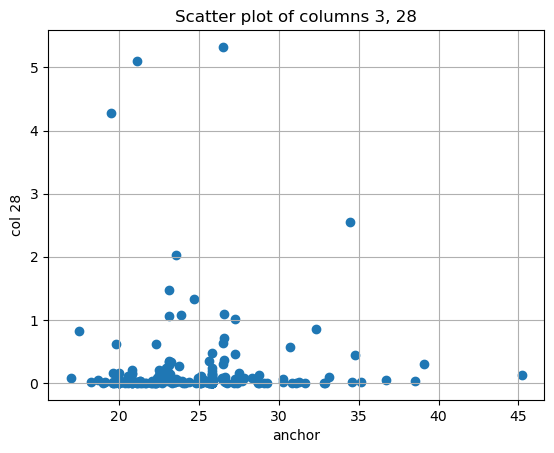

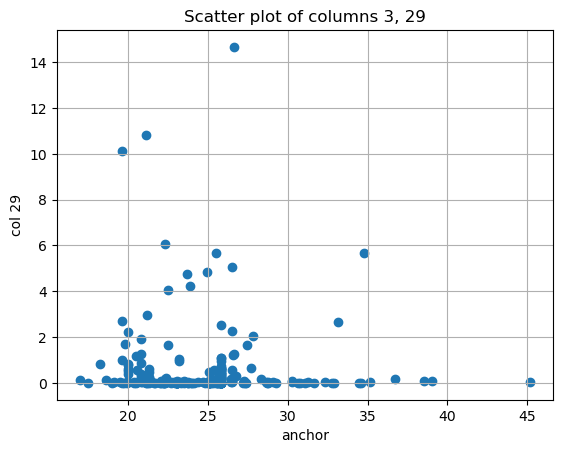

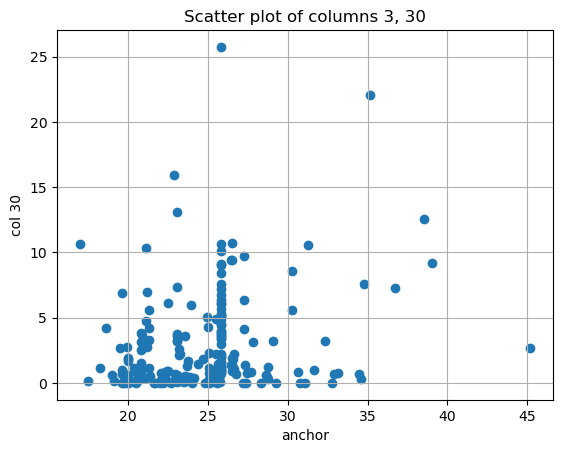

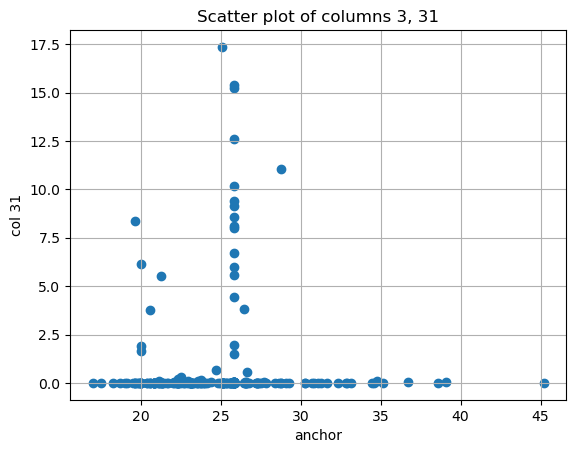

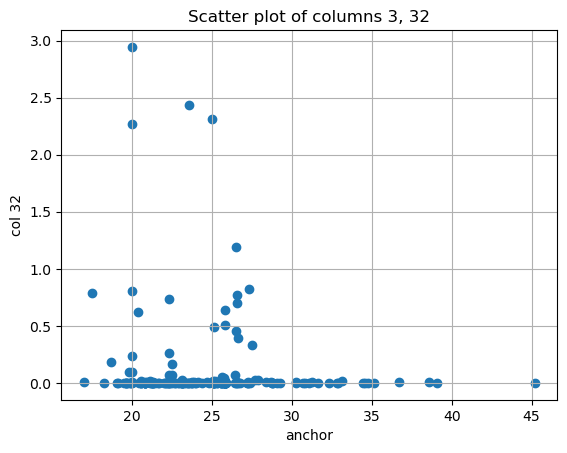

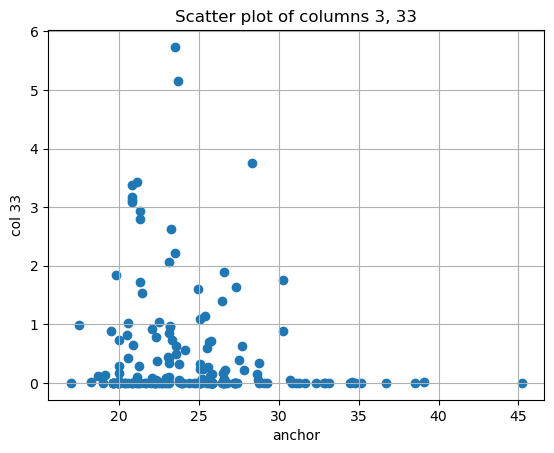

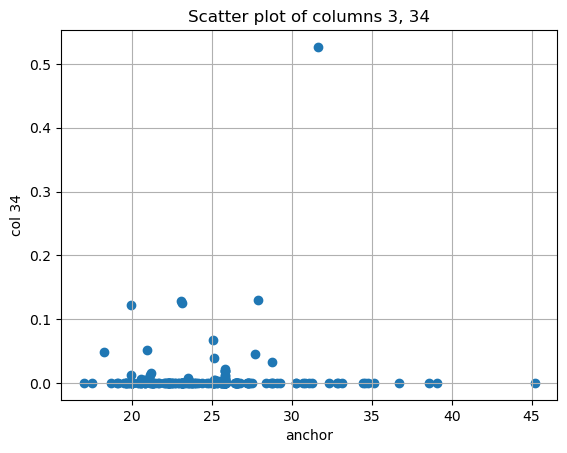

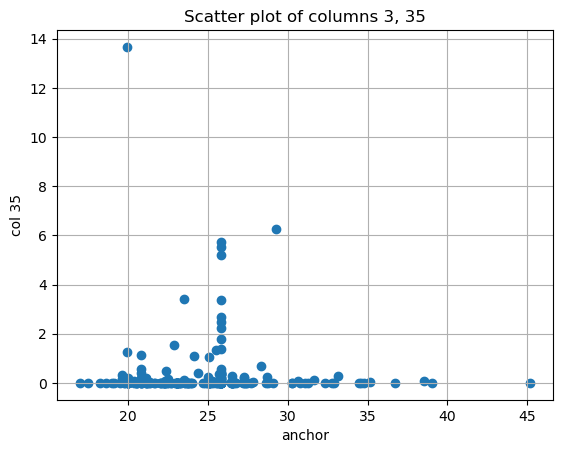

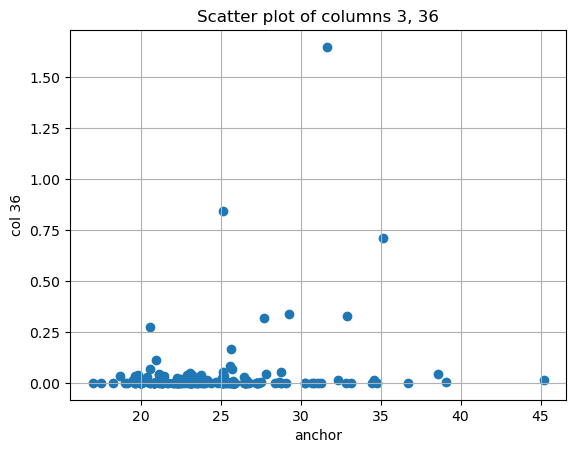

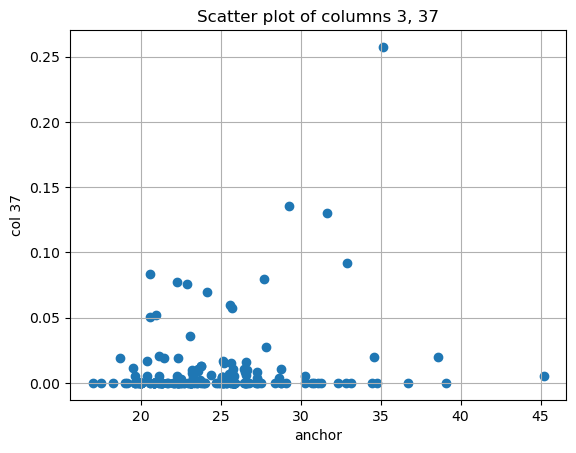

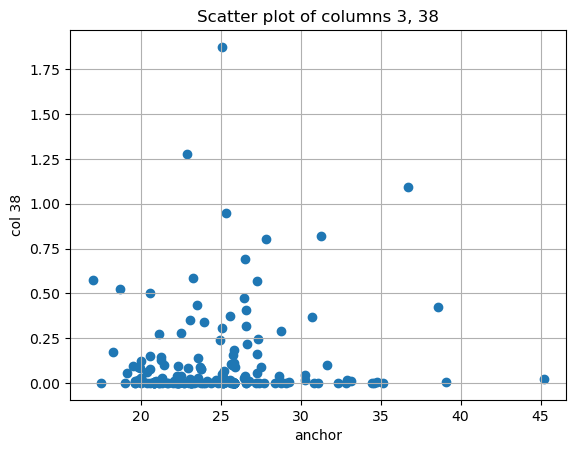

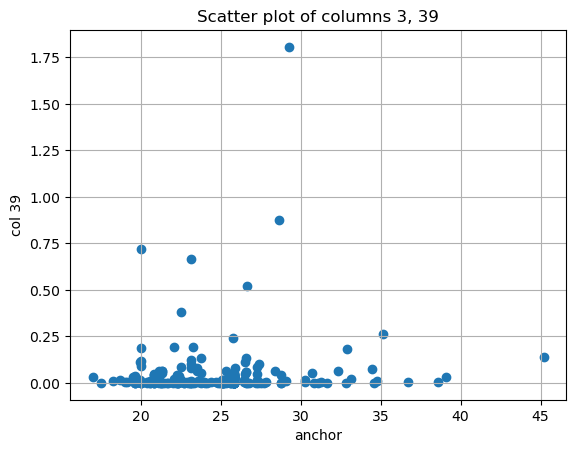

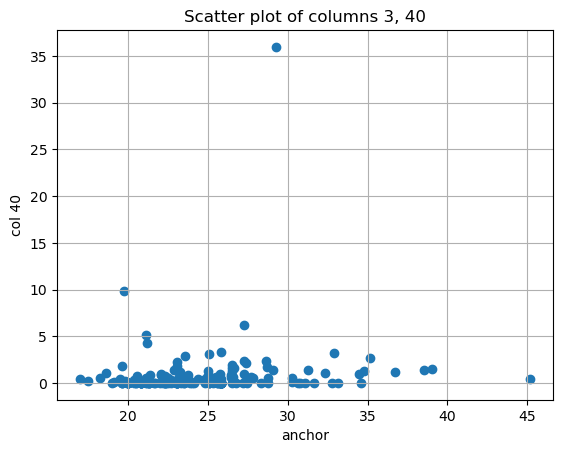

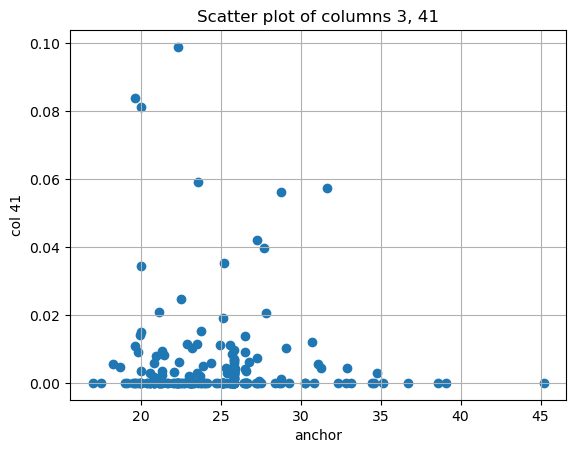

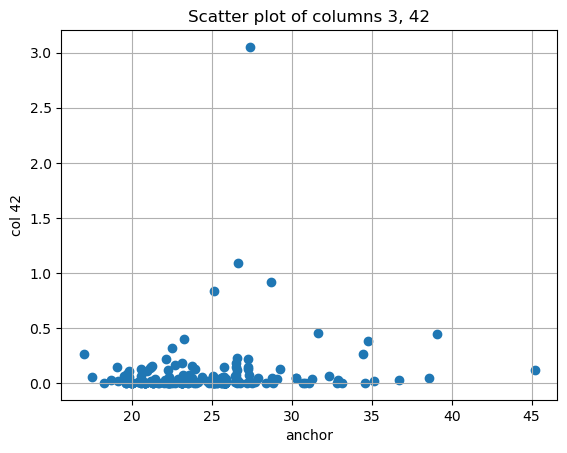

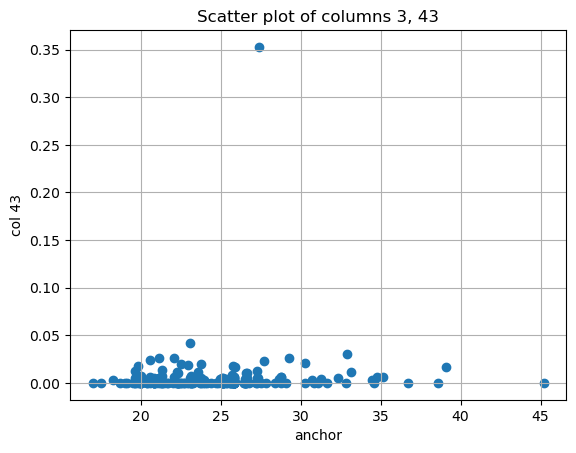

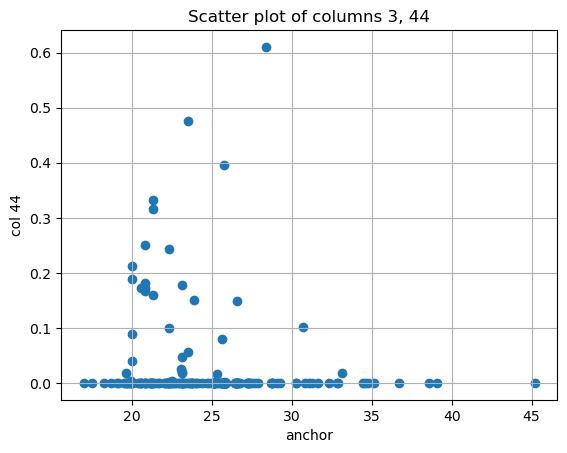

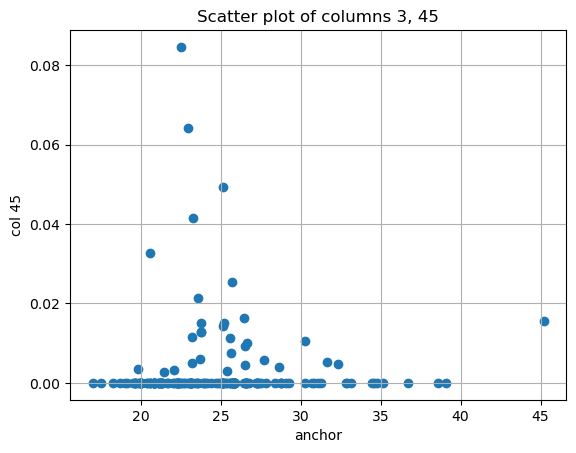

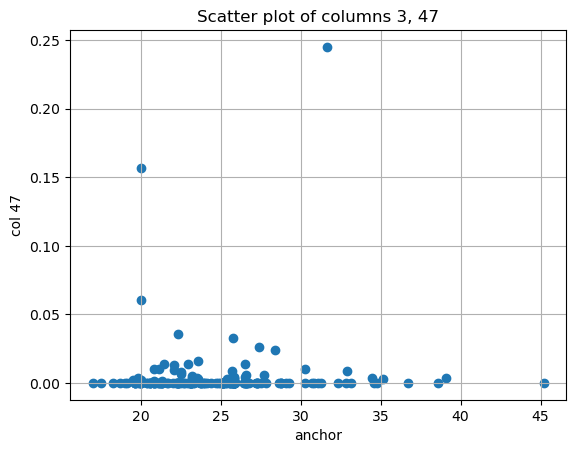

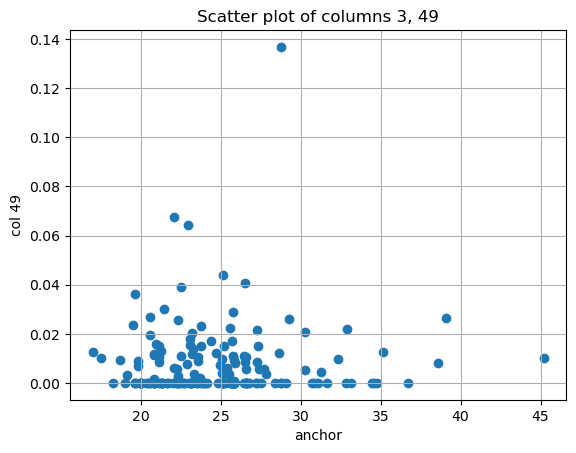

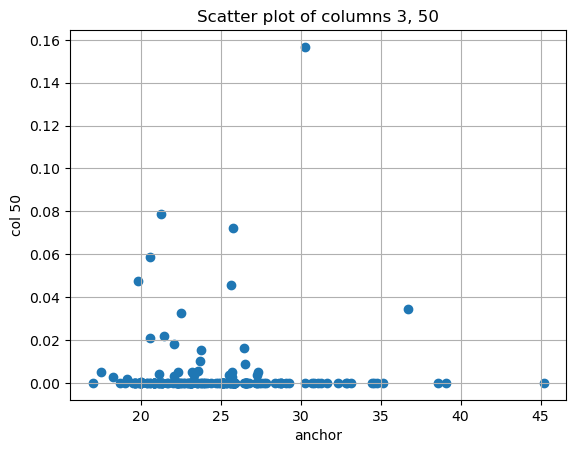

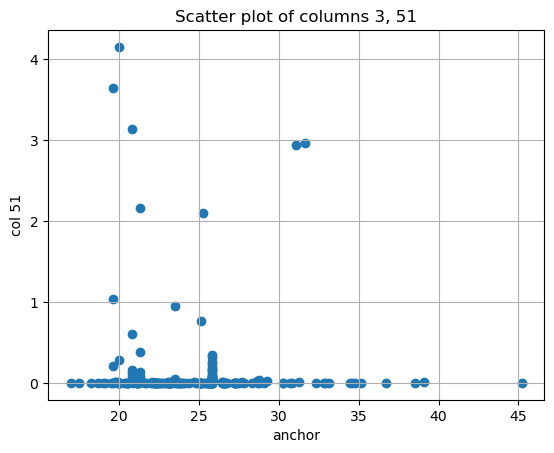

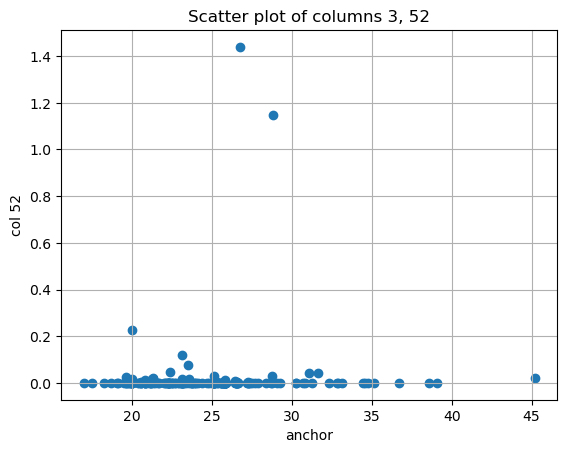

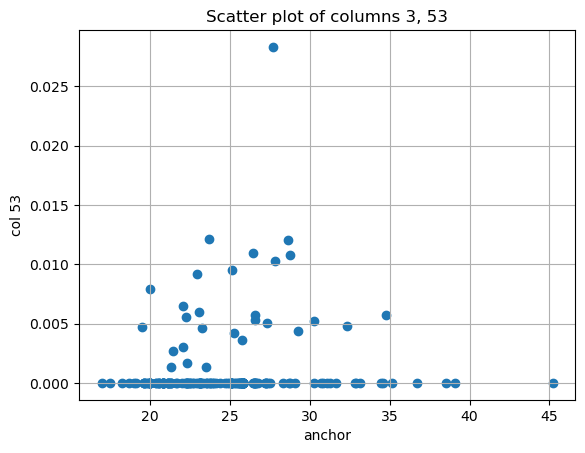

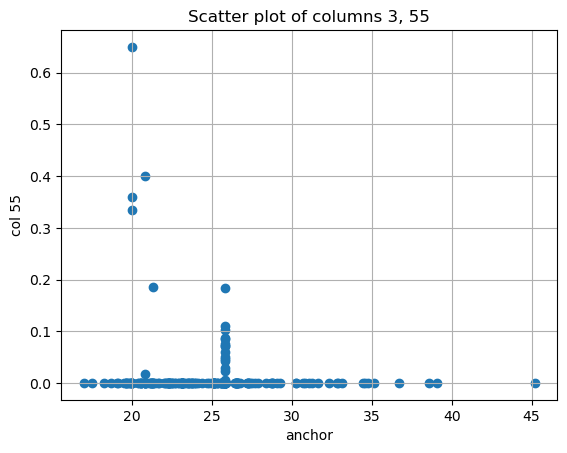

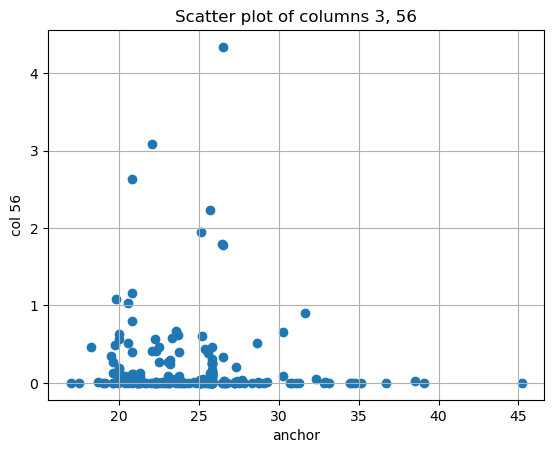

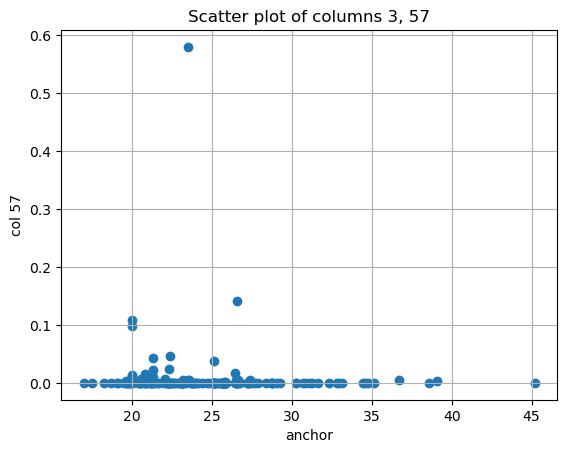

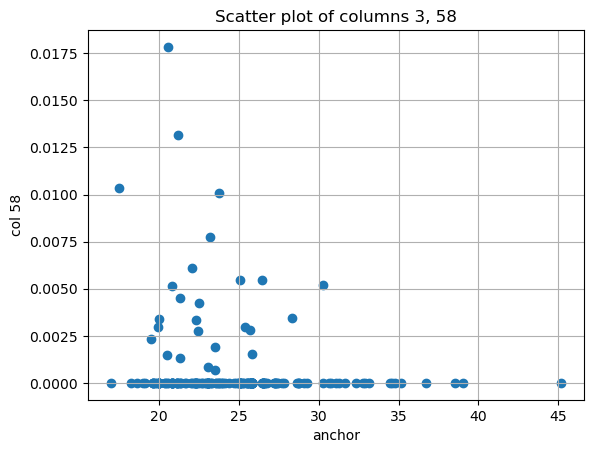

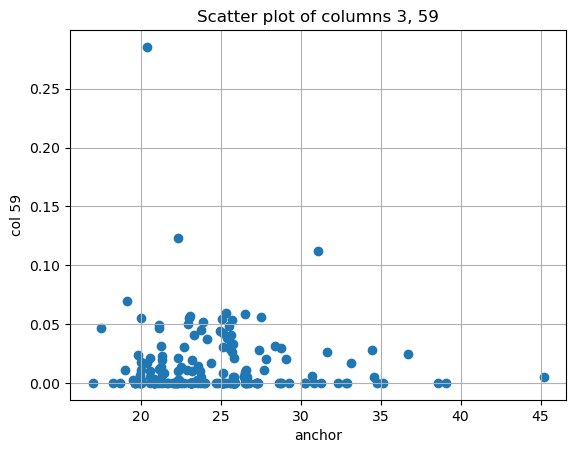

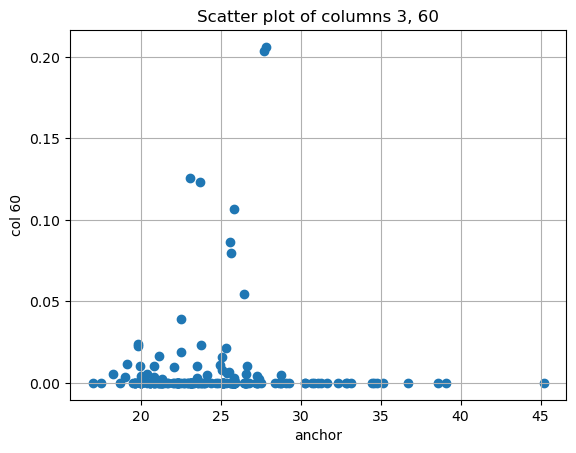

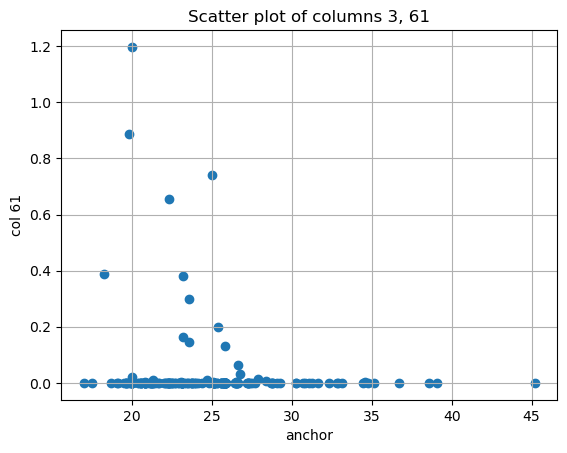

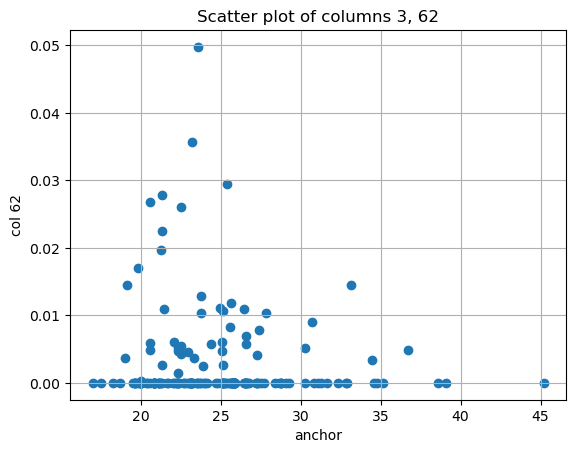

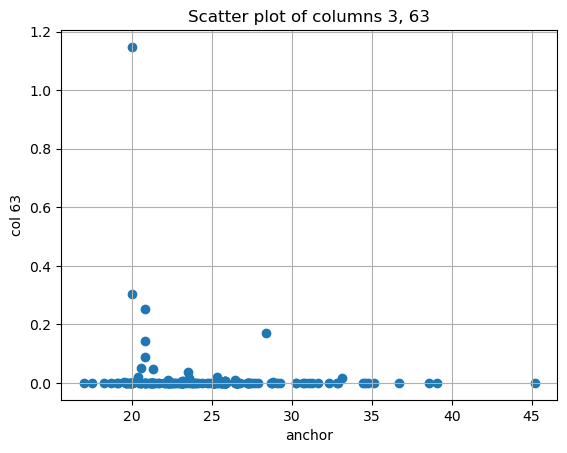

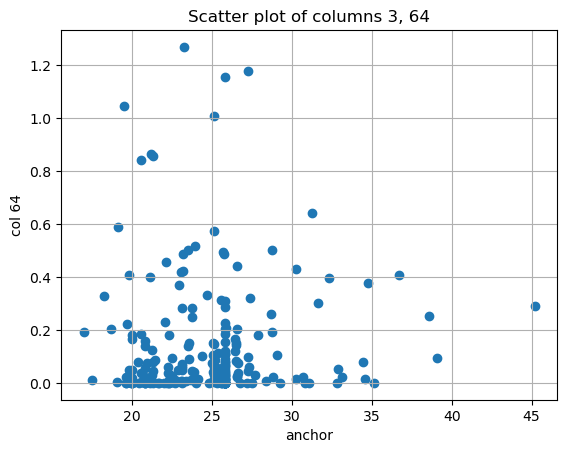

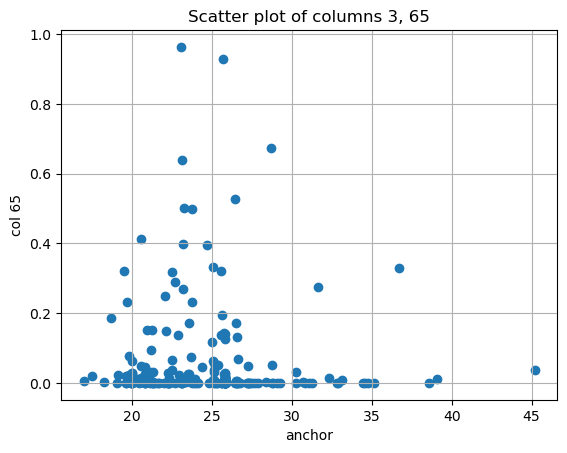

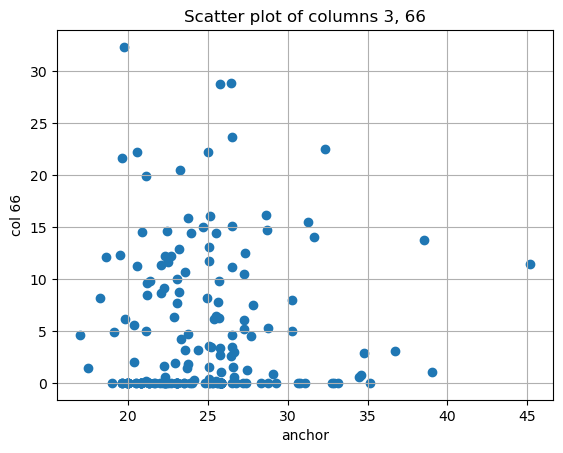

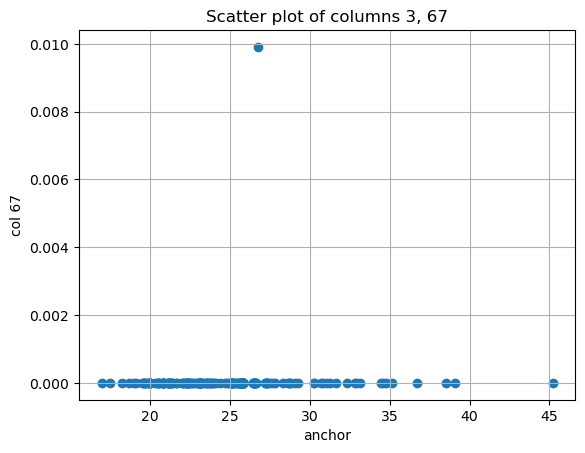

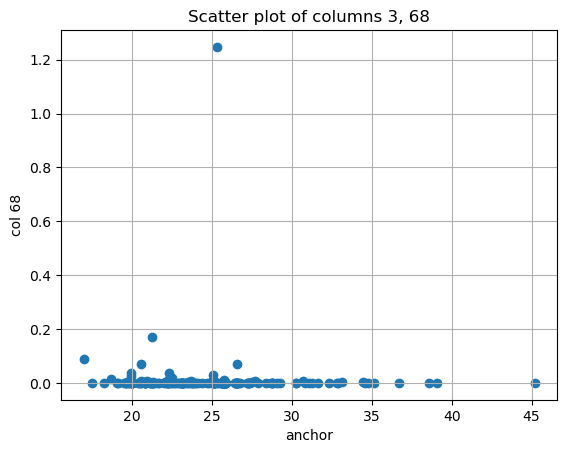

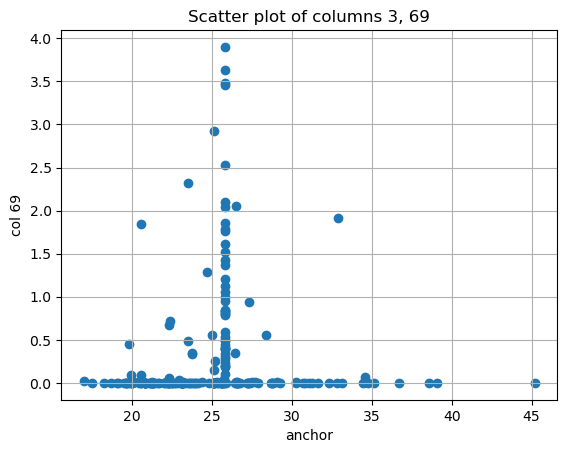

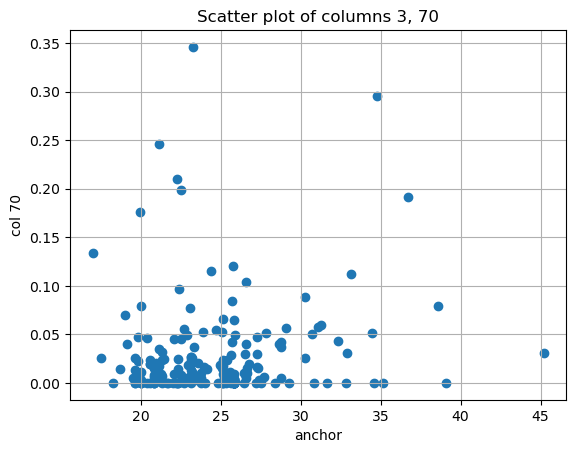

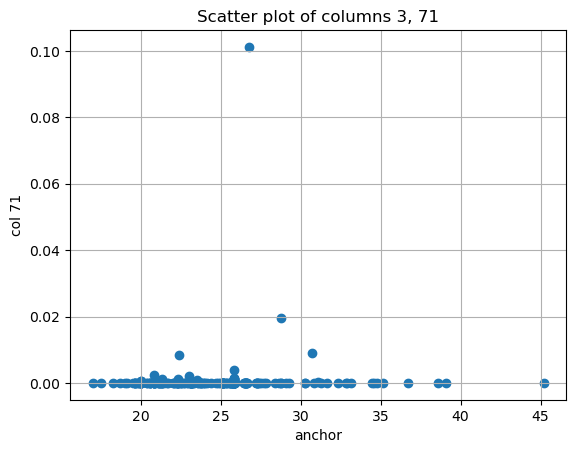

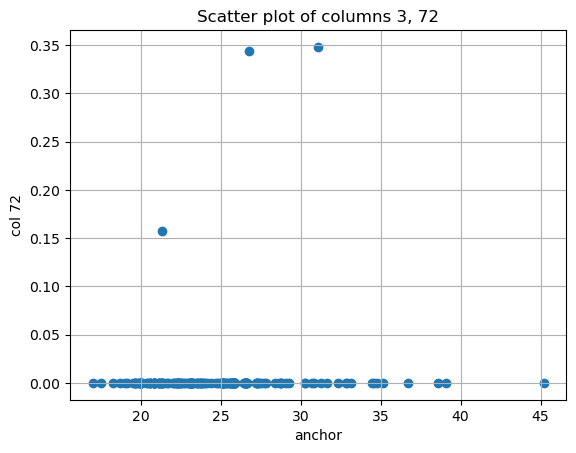

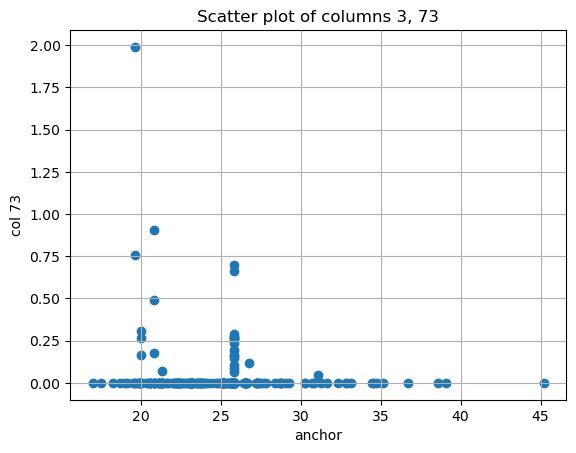

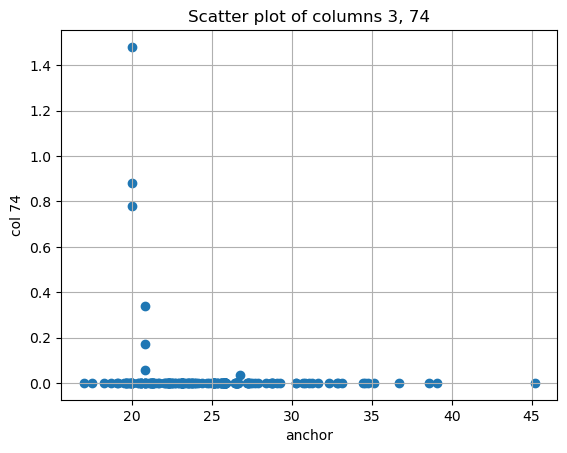

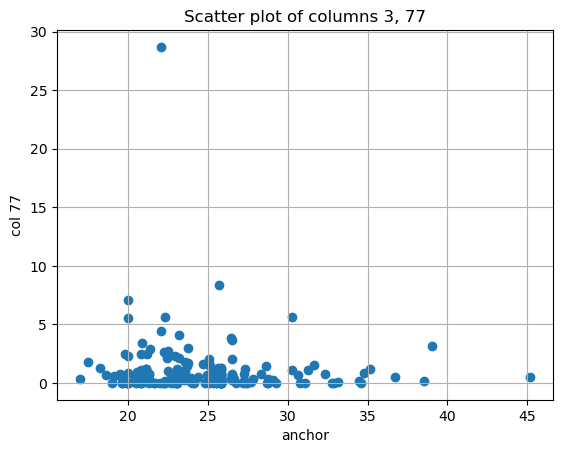

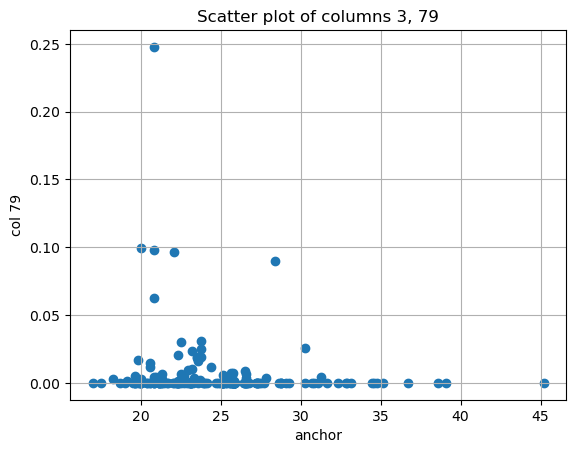

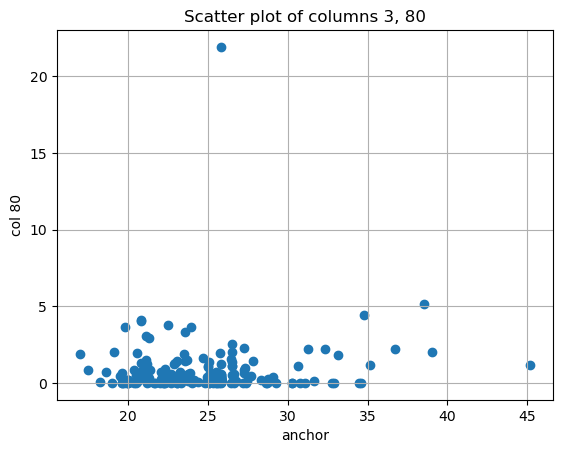

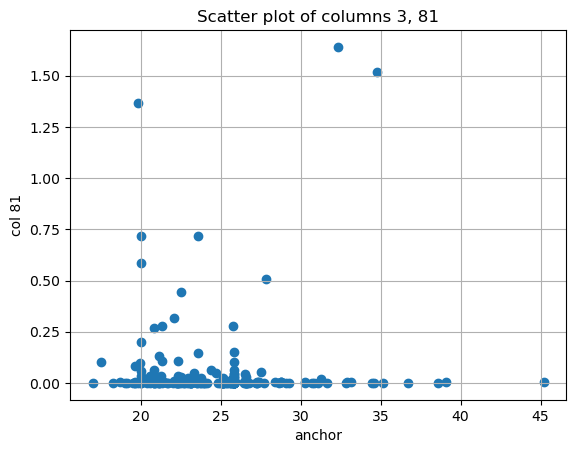

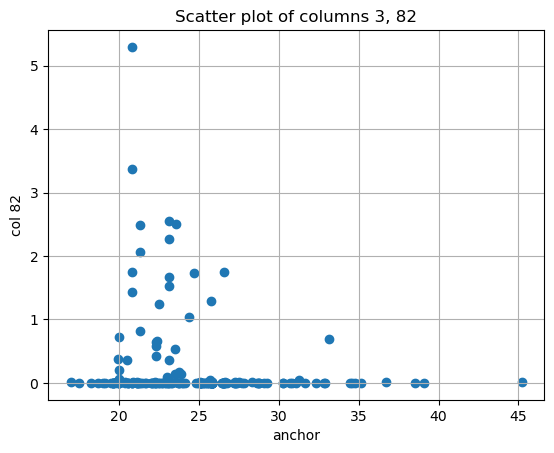

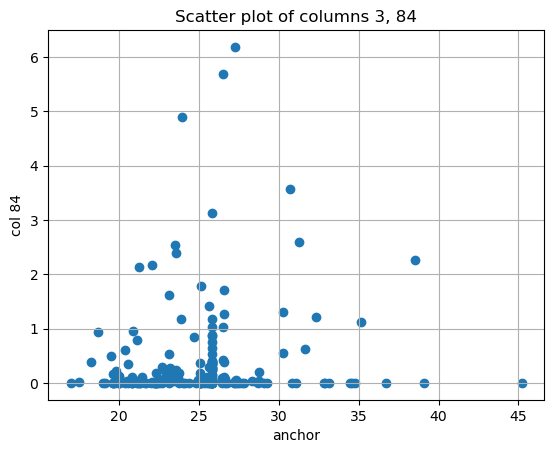

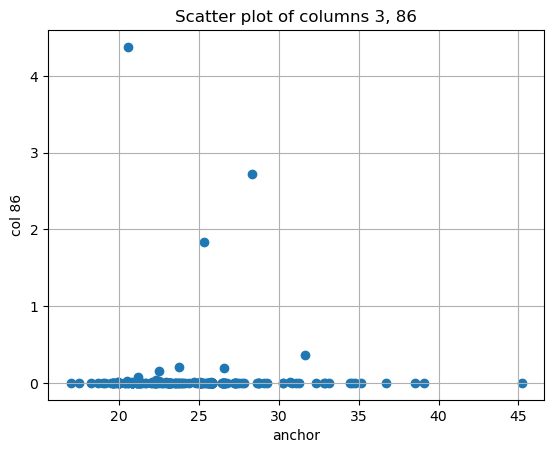

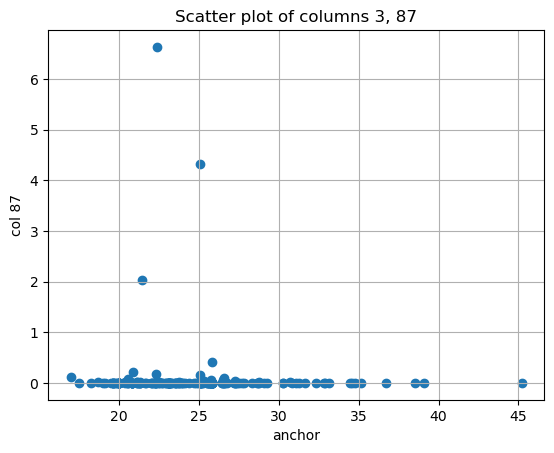

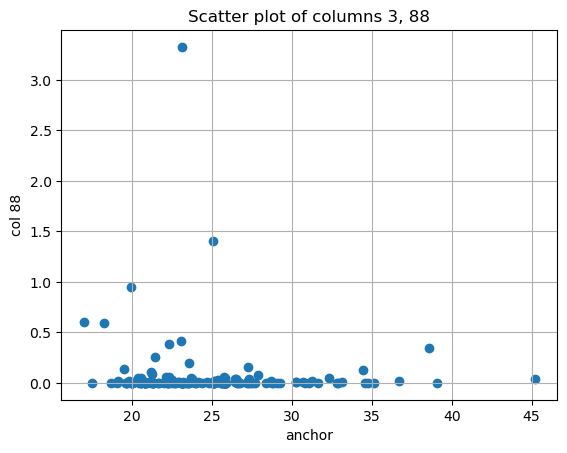

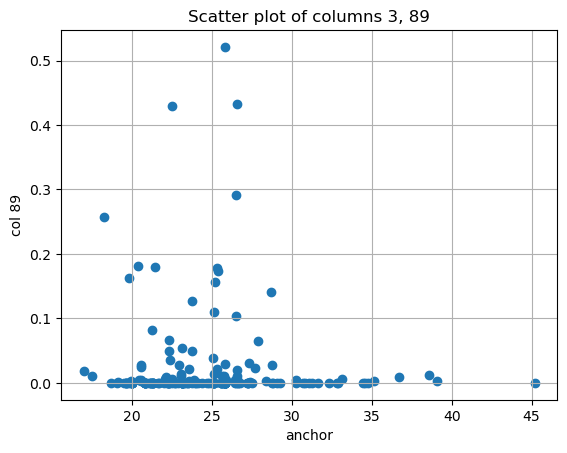

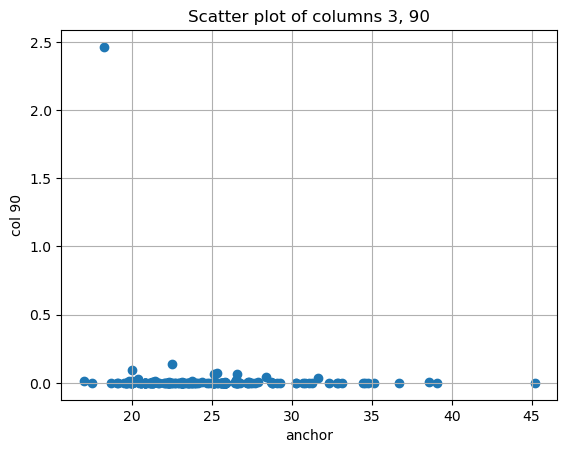

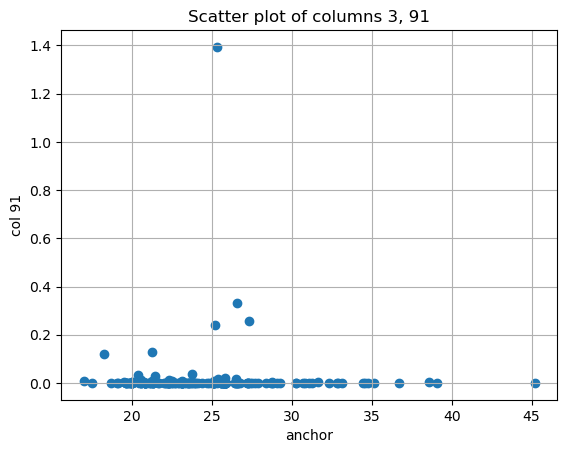

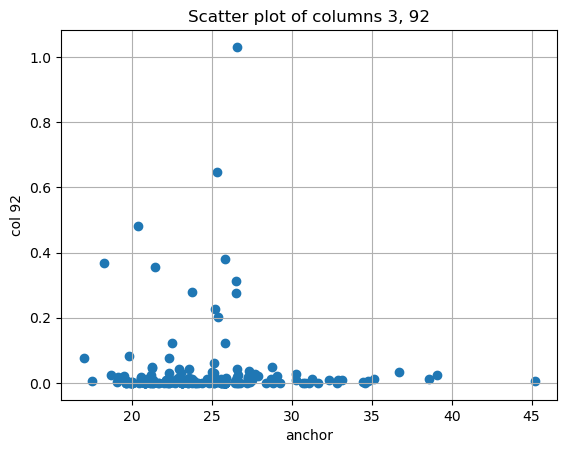

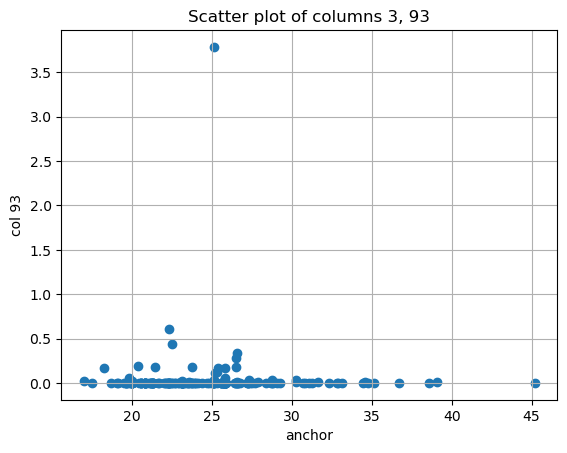

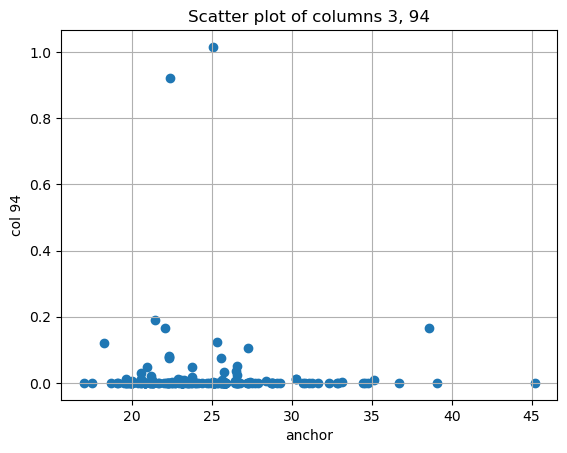

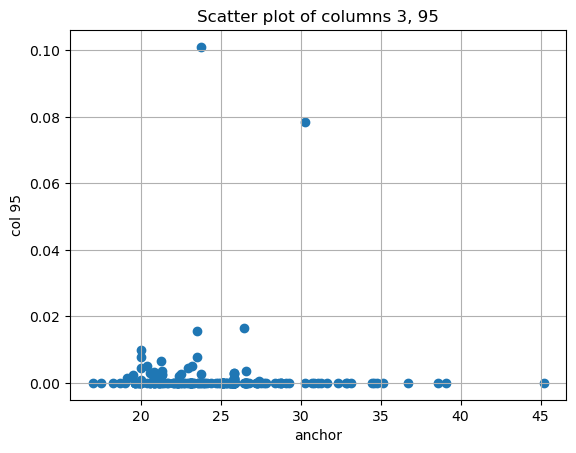

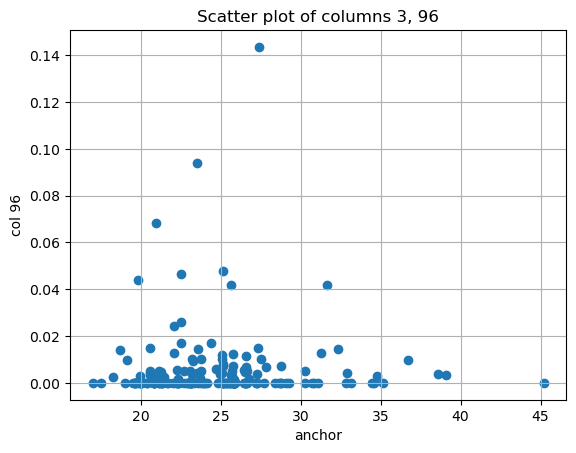

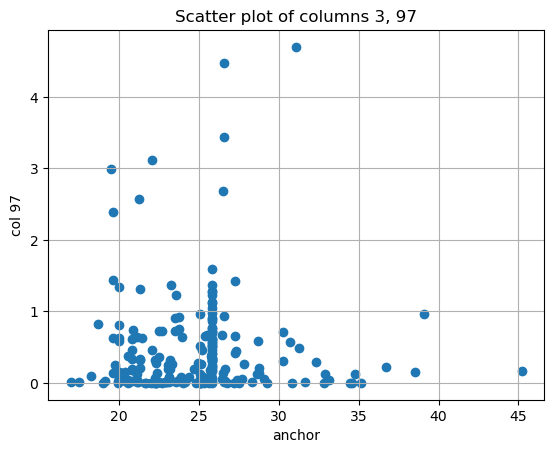

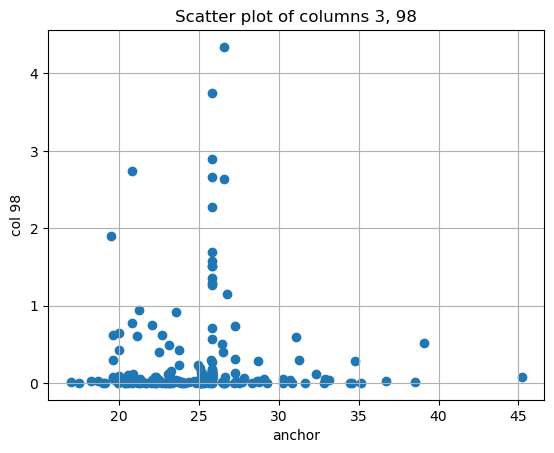

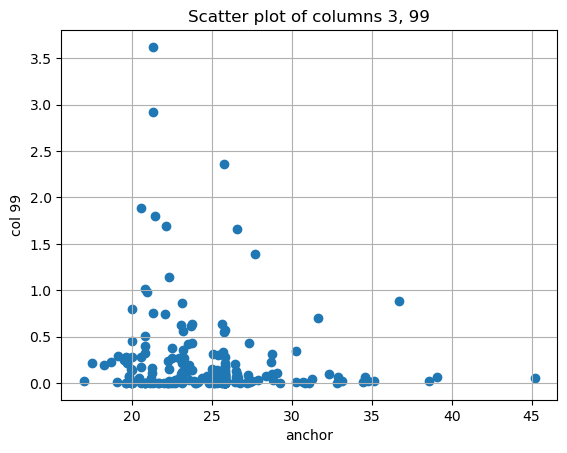

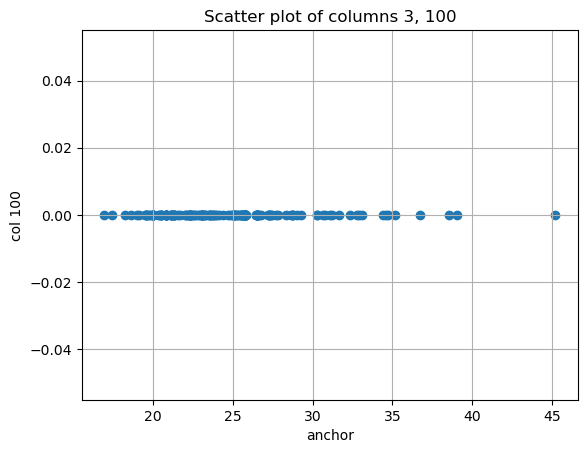

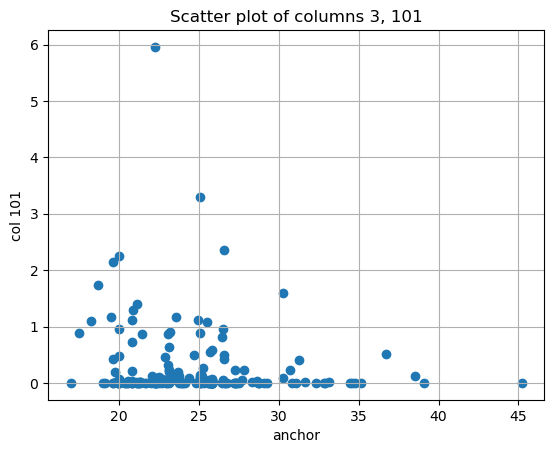

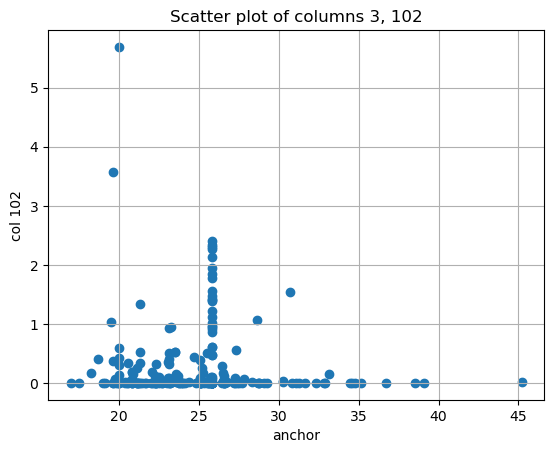

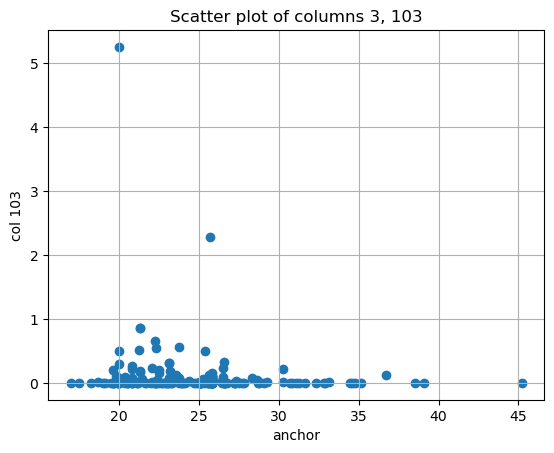

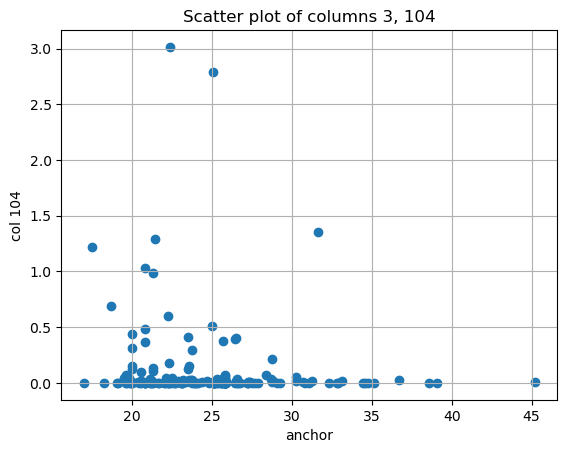

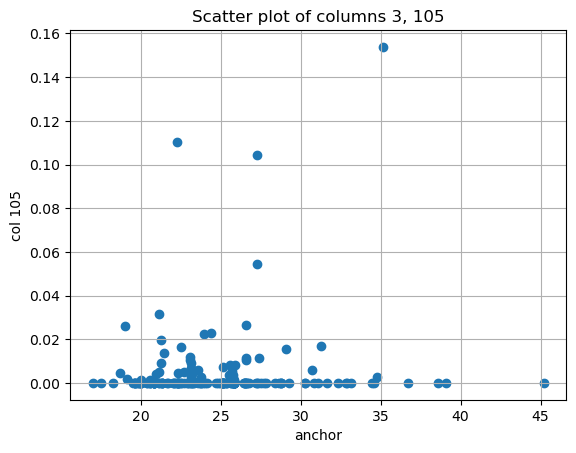

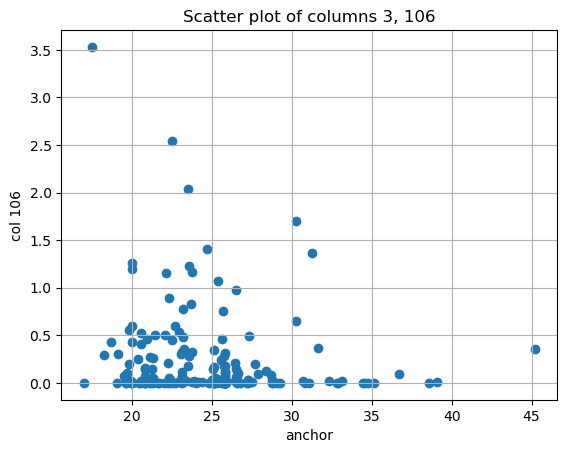

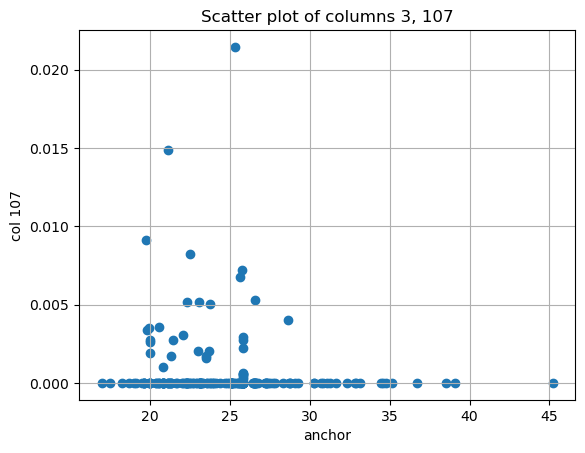

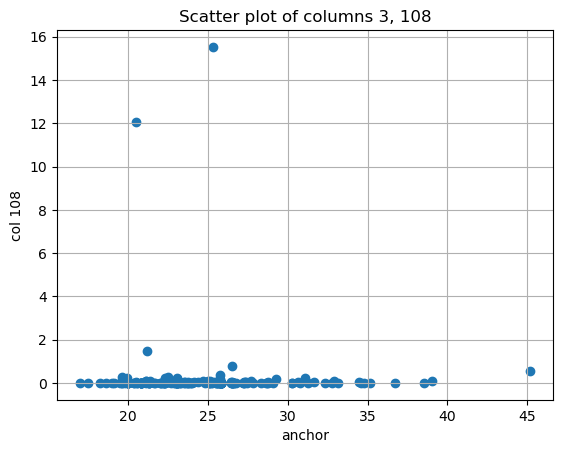

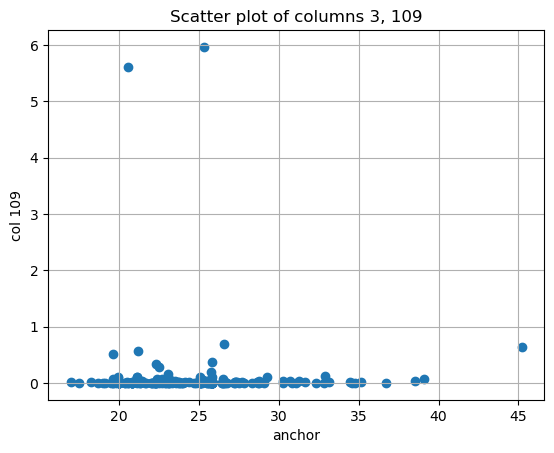

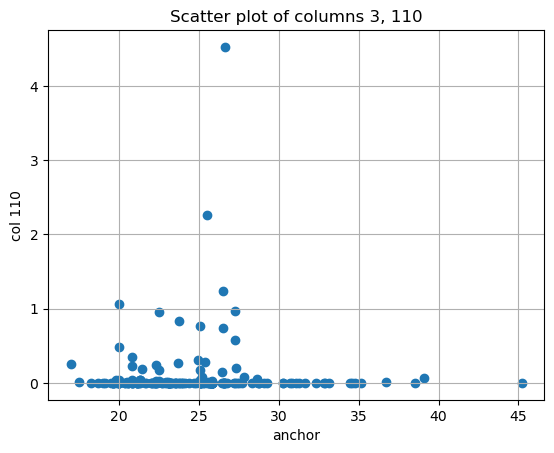

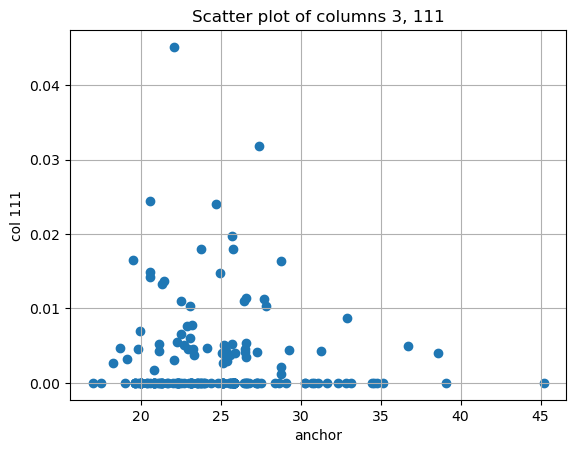

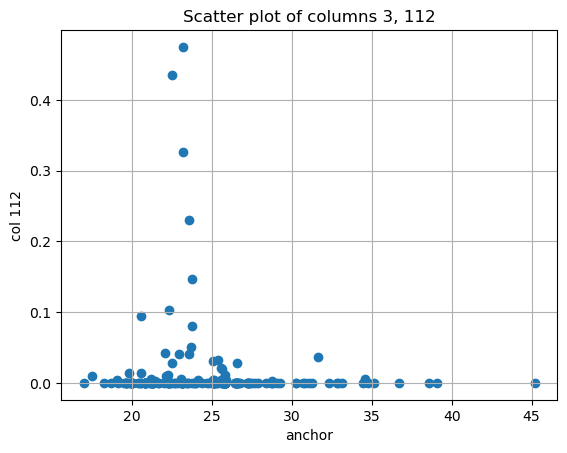

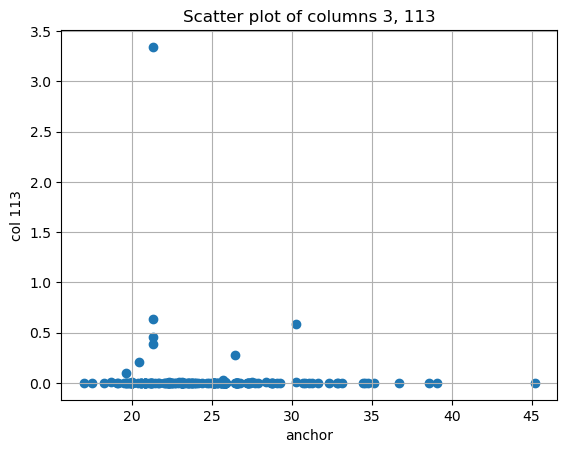

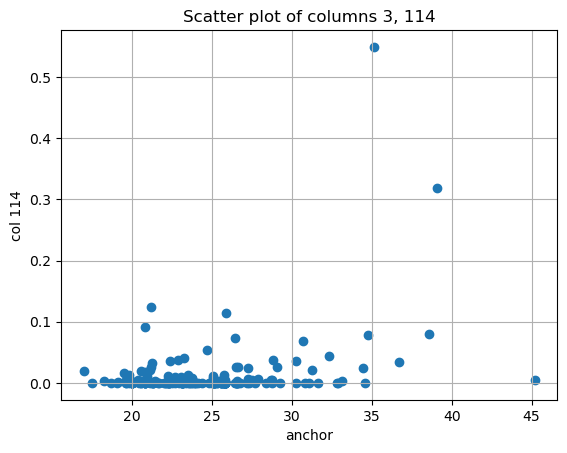

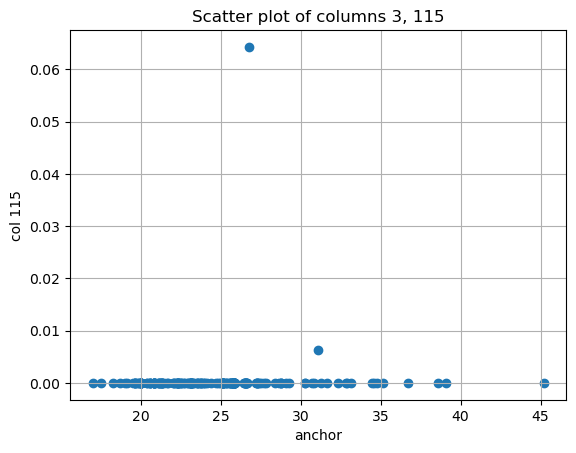

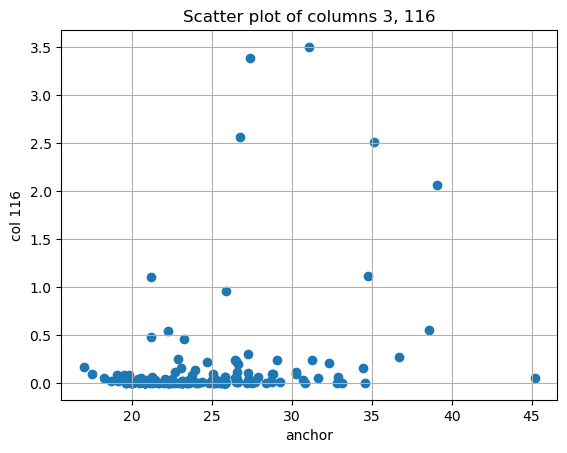

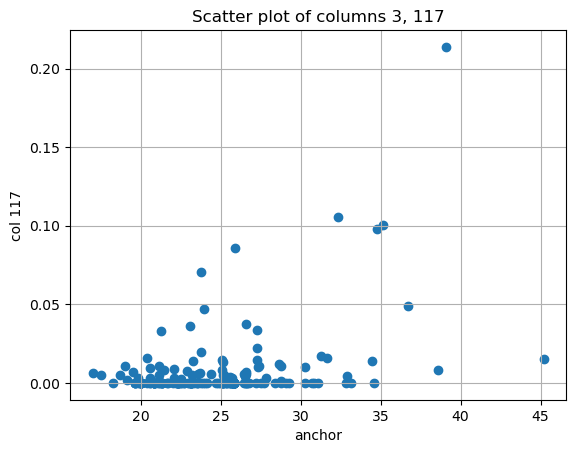

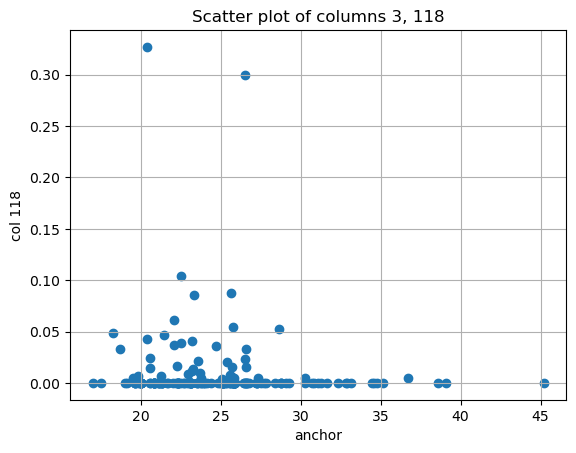

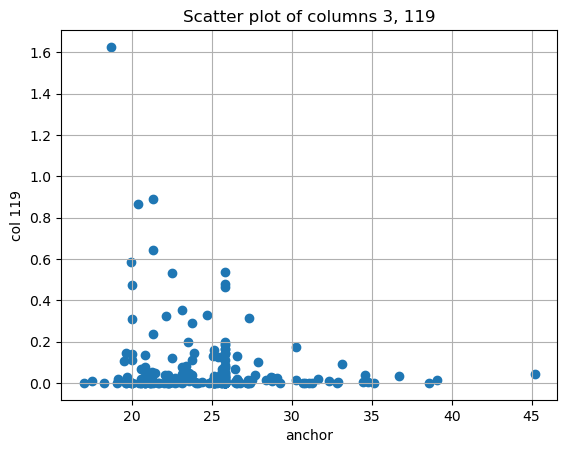

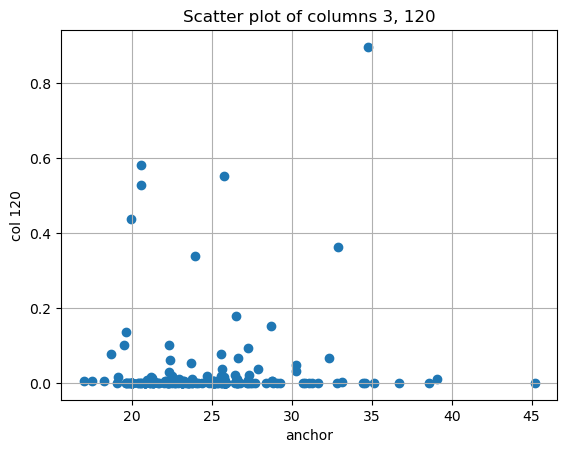

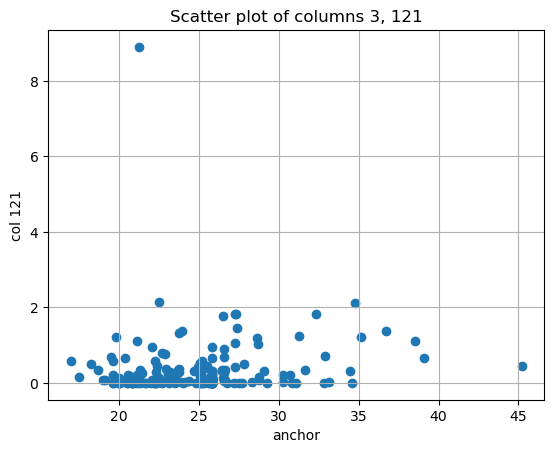

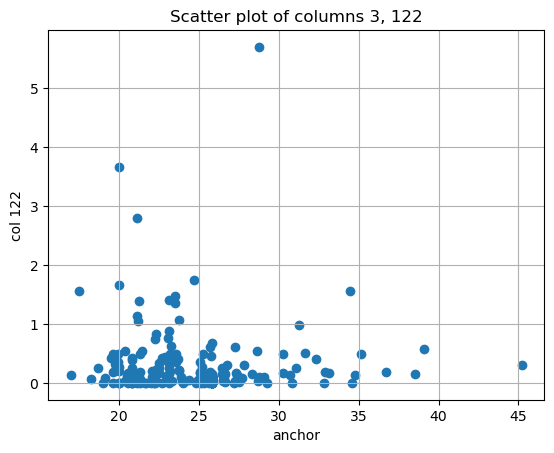

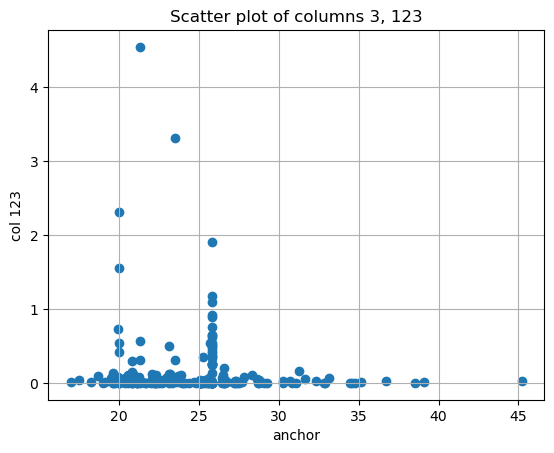

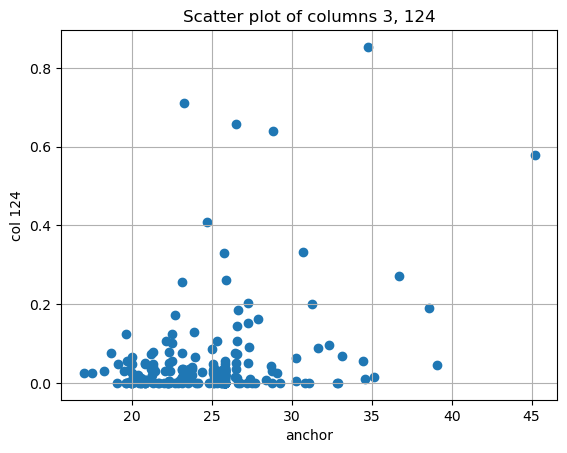

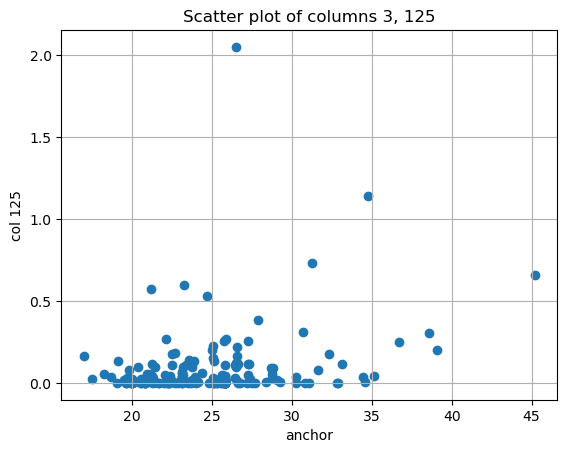

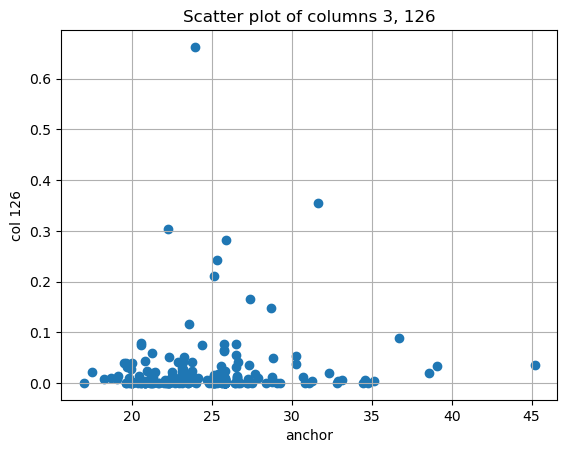

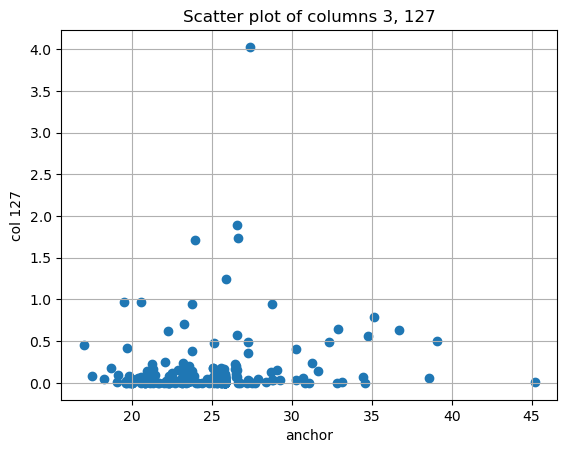

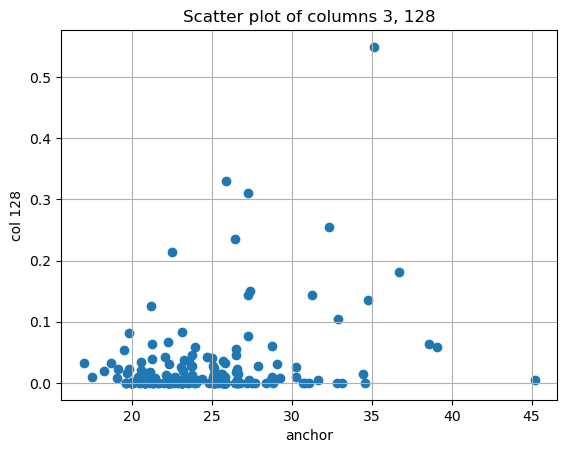

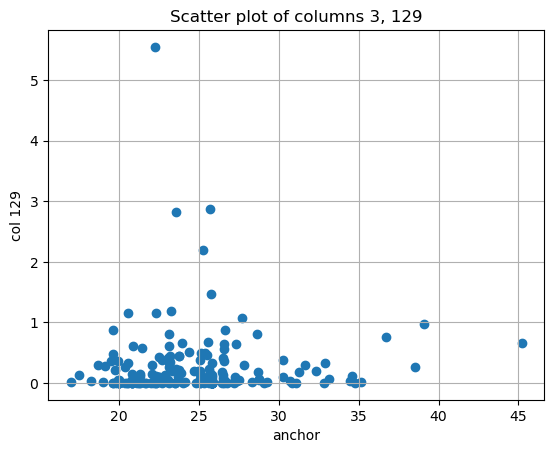

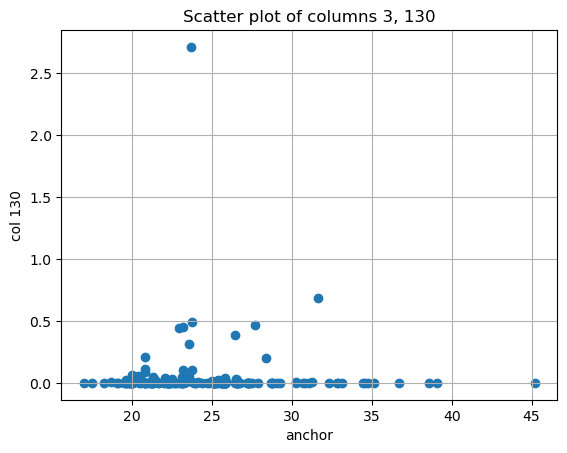

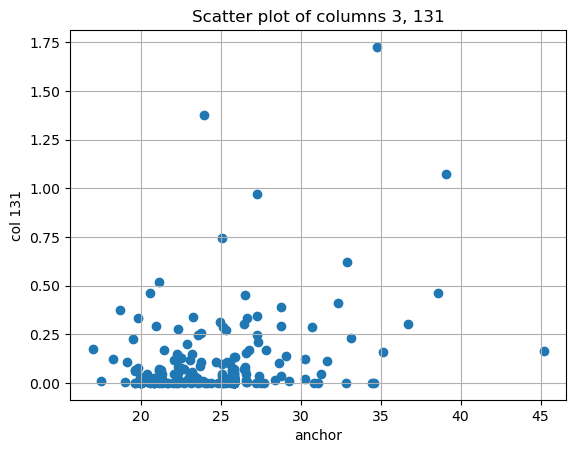

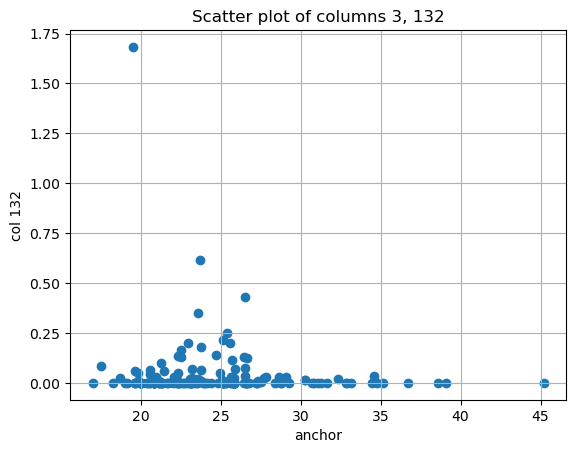

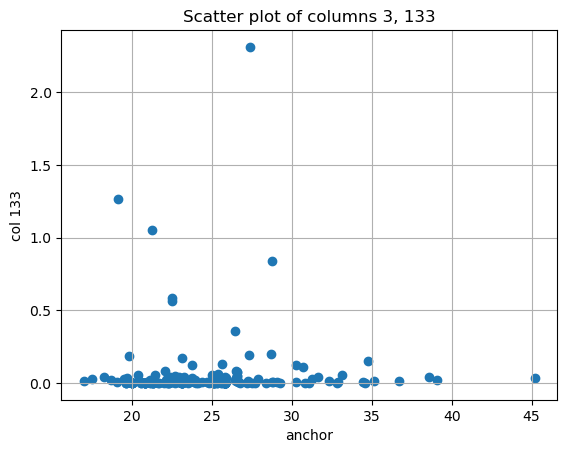

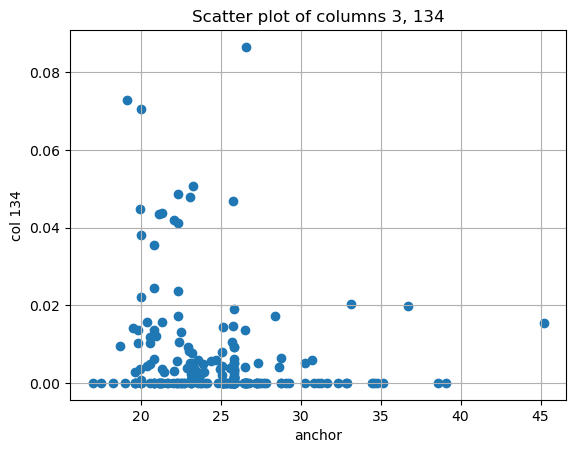

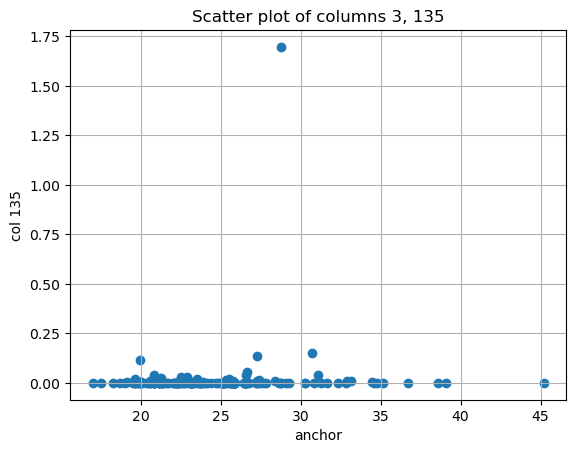

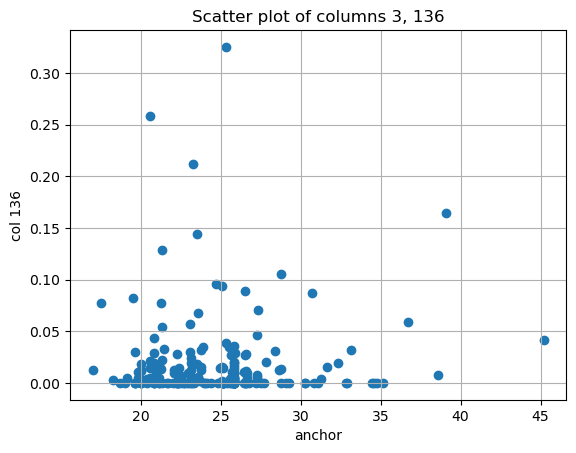

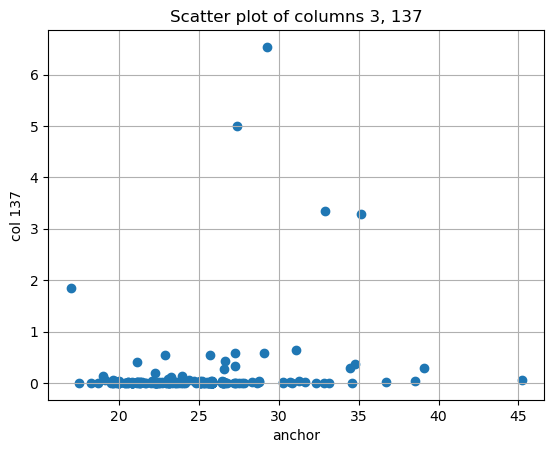

Function 'twoCol' executed in 14.7897 seconds


In [24]:
twoCol(valFinal, 3)


<hr>

We can see that not all bacteria have the same effect on the *BMI*, something interesting and appears to have been good intuition is the the ```Project ID``` seems to split the data into categories other than the ```Sex``` field and thus it's good we kept it. The initial intuition for having removed the other features is that they contain the same entry for all data vectors (individuals or rows). It is worth converting that field to another categorical value field before proceeding as a result and the previous final data should be overwritten with the new integer based categorical values.

<hr>

In [25]:
devFinal = interpolate(devFinal, col = 0, categories = [5, 4, 3, 2, 1, 0])
valFinal = interpolate(valFinal, col = 0, categories = [4, 3, 2, 1, 0])
devFinal.head(10)


Function 'interpolate' executed in 0.0011 seconds
Function 'interpolate' executed in 0.0021 seconds


Project ID Sex  Host age    BMI  Acholeplasma axanthum  \
0          5   0      53.0  19.01               0.000000   
1          3   1      21.0  23.50               0.001028   
2          3   0      52.0  25.80               0.001406   
3          5   1      40.0  23.49               0.000000   
4          5   1      30.0  22.60               0.002878   
5          5   0      21.0  26.25               0.000000   
6          3   0      52.0  25.80               0.000000   
7          3   0      52.0  25.80               0.000000   
8          5   0      42.0  24.75               0.011201   
9          5   0      67.0  28.70               0.000000   

   Acidaminococcus fermentans  Acidaminococcus intestini  Actinomyces lingnae  \
0                    0.000000                   0.000000             0.000000   
1                    0.000000                   0.000000             0.000000   
2                    0.000000                   0.000000             0.001406   
3                    0.008825                   0.273562             0.000000   
4                    0.037419                   7.359970             0.000000   
5                    0.000000                   0.215860             0.000000   
6                    0.000000                   0.000000             0.000000   
7                    0.000000                   0.000000             0.000000   
8                    0.000000                   0.162410             0.000000   
9                    0.000000                   1.256810             0.000000   

   Akkermansia muciniphila  Alistipes finegoldii  ...  Clostridium sphenoides  \
0                 0.017674              0.000000  ...                0.005891   
1                13.015800              0.001542  ...                0.000000   
2                 0.002812              0.201074  ...                0.000000   
3                 0.044123              0.004412  ...                0.017649   
4                 0.872143              0.000000  ...                0.305106   
5                 0.000000              0.045444  ...                0.028403   
6                 0.000000              0.006830  ...                0.000000   
7                 0.021226              0.165262  ...                0.000000   
8                 0.067204              0.212814  ...                0.000000   
9                 0.118669              0.000000  ...                0.010788   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                0.029457                  0.000000               0.000000   
1                0.002569                  0.412652               0.003083   
2                0.005624                  0.002812               0.007031   
3                0.198553                  0.000000               0.158842   
4                0.135283                  0.000000               0.051811   
5                0.664622                  0.000000               0.045444   
6                0.000000                  0.000000               0.000000   
7                0.012129                  0.009097               0.016678   
8                0.498432                  0.095206               0.095206   
9                0.053940                  0.000000               0.032364   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.002946                   0.000000   
1                        0.000000                   0.000000   
2                        0.000000                   0.000000   
3                        0.030886                   0.101483   
4                        0.054689                   0.083473   
5                        0.011361                   0.176096   
6                        0.000000                   0.000000   
7                        0.000000                   0.001516   
8                        0.212814                   0.089606   
9                        0.000000                   0.0377

In [26]:
valFinal.head(10)

Project ID Sex  Host age    BMI  Acholeplasma axanthum  \
0          4   0      60.0  25.71               0.000000   
1          3   0      57.0  27.20               0.000000   
2          4   0      65.0  22.35               0.000000   
3          4   0      55.0  25.52               0.000000   
4          3   1      54.0  21.60               0.000000   
5          2   0      52.0  25.80               0.000000   
6          2   1      31.0  21.30               0.001742   
7          4   0      60.0  26.50               0.000000   
8          4   0      65.0  23.75               0.000000   
9          4   0      66.0  25.75               0.000000   

   Acidaminococcus fermentans  Acidaminococcus intestini  Actinomyces lingnae  \
0                    0.000000                   1.621960             0.000000   
1                    0.000000                   0.000000             0.000000   
2                    0.002095                   0.000000             0.000000   
3                    0.000000                   0.044998             0.000000   
4                    0.000000                   0.000000             0.000000   
5                    0.000000                   0.000000             0.000000   
6                    0.000000                   0.000000             0.001742   
7                    0.000000                   1.780740             0.000000   
8                    0.000000                   0.619555             0.000000   
9                    0.003601                   0.122430             0.007202   

   Akkermansia muciniphila  Alistipes finegoldii  ...  Clostridium sphenoides  \
0                 0.000000              0.068238  ...                0.000000   
1                 0.000000              0.000000  ...                0.000000   
2                 0.002095              0.041895  ...                0.000000   
3                 0.013846              0.010384  ...                0.003461   
4                 0.000000              0.000000  ...                0.000000   
5                 0.000000              0.087590  ...                0.000000   
6                 0.003483              0.094052  ...                0.000000   
7                 0.029538              1.156220  ...                0.046417   
8                 0.580833              0.019361  ...                0.012907   
9                 0.014403              0.000000  ...                0.000000   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                2.871240                  0.000000               0.068238   
1                0.000000                  0.000000               0.000000   
2                0.064936                  0.000000               0.016758   
3                0.089996                  0.000000               0.003461   
4                0.000000                  0.000000               0.000000   
5                0.000000                  0.000000               0.000000   
6                0.149787                  0.020900               0.043543   
7                0.409317                  0.000000               0.451515   
8                0.219426                  0.006454               0.006454   
9                1.472760                  0.010803               0.010803   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.115479                   0.015747   
1                        0.000000                   0.000000   
2                        0.000000                   0.041895   
3                        0.006923                   0.000000   
4                        0.000000                   0.000000   
5                        0.000000                   0.000000   
6                        0.000000                   0.000000   
7                        0.430416                   0.080175   
8                        0.064537                   0.012907   
9                        0.021605                   0.0036

<hr>

Doing this I noticed that one of the ```Project ID```'s is missing from the validation set

<hr>

<hr>

# Final Format

Here we discuss the final format that we have chosen.

Since our search using *PCA* has not lead us to any good transformations (and since we will only do tranformations later) we will only remove those columns that are not usefull to us in the machine learning problem we are trying to solve.

This is to say that the```Unnamed, Experiment type, Disease MESH ID``` columns will not be used since they are not of any use in the framework of our machine learning problem. We will encode the ```sex``` category in a binary format.

- 0 = male
- 1 = female

All transformations like setting bins to cluster the data are to be done after this step for we do not want to lost data now we would rather interprit it later.

We will keep the ```Project Id``` column since it contains different data tha seems to not follow the other features. We will cast the ```Project ID``` (as we already have) to categorical values.

A good thing to keep in mind is that the targets are the *BMI* values that are continous as are the different species of organisms. The issue of keeping one discreet valued field will be one that we will look at when tackling the problem later.

It might be a good idea to normalize the data (minmax) somehow before proceeding. a z-score normalization of the data for the features of mocroorganism species would be ideal.

We will first get data into the form and then save outputs.

<hr>

In [34]:
# z-score scaling
from sklearn.preprocessing import StandardScaler as Scale

def devScaler(dataframe: pd.DataFrame, index: int) -> pd.DataFrame:
    """Scales the columns from index to the end of the dataframe using z-score scaling"""
    target = dataframe.iloc[:, index:]
    transform = Scale()
    transform.fit(target)
    holder = transform.transform(target)
    output = dataframe.copy()
    output.iloc[:, index:] = holder
    return output, transform

# We want this seperate from the last function so that we can use only the training set scale
def applyScale(dataframe: pd.DataFrame, index: int, scaler: Scale) -> pd.DataFrame:
    """Applies a scaler to columns from index to the end of the dataframe"""
    target = dataframe.iloc[:, index:]
    holder = scaler.transform(target)
    output = dataframe.copy()
    output.iloc[:, index:] = holder
    return output

reDev, zScale = devScaler(devFinal, 4)
reVal = applyScale(valFinal, 4, zScale)
reDev.head(10)


Project ID Sex  Host age    BMI  Acholeplasma axanthum  \
0          5   0      53.0  19.01              -0.116074   
1          3   1      21.0  23.50              -0.108980   
2          3   0      52.0  25.80              -0.106369   
3          5   1      40.0  23.49              -0.116074   
4          5   1      30.0  22.60              -0.096208   
5          5   0      21.0  26.25              -0.116074   
6          3   0      52.0  25.80              -0.116074   
7          3   0      52.0  25.80              -0.116074   
8          5   0      42.0  24.75              -0.038767   
9          5   0      67.0  28.70              -0.116074   

   Acidaminococcus fermentans  Acidaminococcus intestini  Actinomyces lingnae  \
0                   -0.151651                  -0.366867            -0.154353   
1                   -0.151651                  -0.366867            -0.154353   
2                   -0.151651                  -0.366867            -0.019414   
3                   -0.106995                  -0.026565            -0.154353   
4                    0.037702                   8.788685            -0.154353   
5                   -0.151651                  -0.098344            -0.154353   
6                   -0.151651                  -0.366867            -0.154353   
7                   -0.151651                  -0.366867            -0.154353   
8                   -0.151651                  -0.164834            -0.154353   
9                   -0.151651                   1.196562            -0.154353   

   Akkermansia muciniphila  Alistipes finegoldii  ...  Clostridium sphenoides  \
0                -0.357553             -0.396184  ...               -0.264395   
1                 2.663768             -0.393737  ...               -0.329484   
2                -0.361007             -0.077031  ...               -0.329484   
3                -0.351405             -0.389180  ...               -0.134492   
4                -0.158938             -0.396184  ...                3.041408   
5                -0.361661             -0.324053  ...               -0.015685   
6                -0.361661             -0.385343  ...               -0.329484   
7                -0.356727             -0.133873  ...               -0.329484   
8                -0.346040             -0.058397  ...               -0.329484   
9                -0.334077             -0.396184  ...               -0.210294   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0               -0.445361                 -0.178185              -0.497202   
1               -0.500254                  2.108974              -0.481538   
2               -0.494017                 -0.162598              -0.461486   
3               -0.100140                 -0.178185               0.309746   
4               -0.229310                 -0.178185              -0.233995   
5                0.851373                 -0.178185              -0.266337   
6               -0.505499                 -0.178185              -0.497202   
7               -0.480737                 -0.127764              -0.412476   
8                0.512084                  0.349503              -0.013537   
9               -0.395377                 -0.178185              -0.332786   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                       -0.161263                  -0.315570   
1                       -0.170765                  -0.315570   
2                       -0.170765                  -0.315570   
3                       -0.071131                   0.515577   
4                        0.005653                   0.368071   
5                       -0.134116                   1.126658   
6                       -0.170765                  -0.315570   
7                       -0.170765                  -0.303152   
8                        0.515742                   0.418302   
9                       -0.170765                  -0.0063

In [37]:
reVal.head(10)


Project ID Sex  Host age    BMI  Acholeplasma axanthum  \
0          4   0      60.0  25.71              -0.116074   
1          3   0      57.0  27.20              -0.116074   
2          4   0      65.0  22.35              -0.116074   
3          4   0      55.0  25.52              -0.116074   
4          3   1      54.0  21.60              -0.116074   
5          2   0      52.0  25.80              -0.116074   
6          2   1      31.0  21.30              -0.104053   
7          4   0      60.0  26.50              -0.116074   
8          4   0      65.0  23.75              -0.116074   
9          4   0      66.0  25.75              -0.116074   

   Acidaminococcus fermentans  Acidaminococcus intestini  Actinomyces lingnae  \
0                   -0.151651                   1.650796            -0.154353   
1                   -0.151651                  -0.366867            -0.154353   
2                   -0.141051                  -0.366867            -0.154353   
3                   -0.151651                  -0.310890            -0.154353   
4                   -0.151651                  -0.366867            -0.154353   
5                   -0.151651                  -0.366867            -0.154353   
6                   -0.151651                  -0.366867             0.012793   
7                   -0.151651                   1.848313            -0.154353   
8                   -0.151651                   0.403839            -0.154353   
9                   -0.133429                  -0.214568             0.536775   

   Akkermansia muciniphila  Alistipes finegoldii  ...  Clostridium sphenoides  \
0                -0.361661             -0.287874  ...               -0.329484   
1                -0.361661             -0.396184  ...               -0.329484   
2                -0.361174             -0.329687  ...               -0.329484   
3                -0.358443             -0.379702  ...               -0.291242   
4                -0.361661             -0.396184  ...               -0.329484   
5                -0.361661             -0.257157  ...               -0.329484   
6                -0.360851             -0.246901  ...               -0.329484   
7                -0.354795              1.439014  ...                0.183348   
8                -0.226651             -0.365453  ...               -0.186880   
9                -0.358313             -0.396184  ...               -0.329484   

   Clostridium spiroforme  Clostridium stercorarium  Clostridium symbiosum  \
0                5.356338                 -0.178185              -0.150540   
1               -0.505499                 -0.178185              -0.497202   
2               -0.372927                 -0.178185              -0.412069   
3               -0.321765                 -0.178185              -0.479618   
4               -0.505499                 -0.178185              -0.497202   
5               -0.505499                 -0.178185              -0.497202   
6               -0.199699                 -0.062342              -0.275997   
7                0.330150                 -0.178185               1.796583   
8               -0.057526                 -0.142415              -0.464416   
9                2.501243                 -0.118310              -0.442323   

   Clostridium thermosuccinogenes  Clostridium xylanolyticum  \
0                        0.201753                  -0.186600   
1                       -0.170765                  -0.315570   
2                       -0.170765                   0.027547   
3                       -0.148433                  -0.315570   
4                       -0.170765                  -0.315570   
5                       -0.170765                  -0.315570   
6                       -0.170765                  -0.315570   
7                        1.217694                   0.341069   
8                        0.037422                  -0.209858   
9                       -0.101069                  -0.2860

In [38]:
# Exporting cleaned datasets, overwrite
reDev.to_csv(root + 'development_final_data.csv')
reVal.to_csv(root + 'evaluation_final_data.csv')


<hr>

# Final note

Let us attempt to summarize what this notebook does with a brief bullet board and table

it:

* Imports two dataframes from csv data files
* Searches for missing data fields and reports them
* Computes the number of principal components that explains 50% of the data
* Encodes all categorical fields to numerical binary representations
* Removes specific fields that do not contribute to the data we will find useful for our analysis
* Computes all the correlations (Pearson) for all pairs of fields in the files
* Scales the fields with z-score scaling
* Saves to files

There is alot of functionality that we might reuse in the later parts of the assignment. The goal was not to "apply" all the transformations now it was to look at the data and get a understanding for our problem (refer to as feeling the data).

<hr>